# Project 3 | ENPM 661 | Planning for Autonomous Robots |



Dijkstra Algorithm for Rigid Robot with Obstacles | Govind Ajith Kumar & Rajeshwar NS

In [1]:
#Importing all the libraries
import numpy as np
import copy
import math
import heapq
import time
import matplotlib.pyplot as plt
import cv2
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
#Getting the start time to measure the time taken for solving
start_time = time.time()

In [3]:
def Round2Point5(num):
    return (round(num * 2) / 2)

In [4]:
def EucledianDistance(a,b):  
    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return dist  

In [5]:
step_count=1
def ActionMove(curr_node,degree,step_size=1.0):
    x = curr_node[0]
    y = curr_node[1]
    x_new = (step_size)*np.cos(np.deg2rad(degree)) + x# - (y-0)*np.sin(np.deg2rad(degree)) + length
    y_new = (step_size)*np.sin(np.deg2rad(degree)) + y# + (y-0)*np.cos(np.deg2rad(degree)) + length
    new_node = (round(x_new,2),round(y_new,2))
    if new_node[0]>=0.00 and new_node[0]<=300.00 and new_node[1]>=0.00 and new_node[1]<=200.00:
        return(new_node,True)
    else:
        return(curr_node,False)

In [16]:
#calculating all the points within the entire canvas
all_possible_points = []
for i in range(0,601): #300 width
    for j in range(0,401): #200 width
        all_possible_points.append((Round2Point5(i/2),Round2Point5(j/2))) #appending
radius = 1
clearence = 1
list_of_obstacle_points=[]
for pt in all_possible_points:
    x = pt[0]
    y = pt[1]

#circle shaped obstacle
    #for path traversal
    if((x-225)**2 + (y-150)**2 <= (25+radius+clearence)**2):
        list_of_obstacle_points.append((x,y))

#ellipse shaped obstacle
    #for path traversal
    if(((x-150)**2)/(40+radius+clearence)**2 +((y-100)**2)/(20+radius+clearence)**2 <= 1):
        list_of_obstacle_points.append((x,y))

#complex polygon shaped obstacle
    #for path traversal
    if y>=120+radius+clearence and y<=185+radius+clearence and x>=20+radius+clearence and x<=100+radius+clearence:
        if y-(13*x)<=-140+radius+clearence:
            if y-x>=100-(radius+clearence) or y+(6/5)*x>=210-(radius+clearence):
                if y-(6/5)*x>=30-(radius+clearence):
                    if y+(7/5)*x<=290+(radius+clearence):
                        list_of_obstacle_points.append((x,y))

#rectangle slanted shaped obstacle
    #for path traversal
    if y-(8/5)*x>=-122-(radius+clearence) and y+(38/65)*x<=(1254/13)+(radius+clearence) and y-(9/5)*x<=13+(radius+clearence) and y+(37/65)*x>=(1093/13)-(radius+clearence):
        list_of_obstacle_points.append((x,y))

#rhombus shaped obstacle
    #for path traversal
    if y-(3/5)*x<=-95+(radius+clearence) and y+(3/5)*x<=175+(radius+clearence) and y-(3/5)*x>=-125-(radius+clearence) and y+(3/5)*x>=145-(radius+clearence):
        list_of_obstacle_points.append((x,y))

In [17]:
list_of_obstacle_points = list(set(list_of_obstacle_points))

In [18]:
len(list_of_obstacle_points)

43550

In [7]:
#showing what all child nodes each parent nodes are connected to
list_of_points_for_graph = []
def generateGraph(point,orientation,size_x,size_y): #remember that this size_x and size_y are the sizes of the matrix, so not the end coordinates
    global step_count
    global list_of_points_for_graph
    i = point[0] #x coordinate
    j = point[1] #y coordinate
    if i <=size_x and j<=size_y and i>=0 and j>=0:
        
        cost_values = {}
        
        pos0 = ActionMove(point,orientation+0)[0]#0
        if pos0[0]>=0 and pos0[1]>=0 and pos0[0]<=size_x and pos0[1]<=size_y: 
            list_of_points_for_graph.append(pos0)
            cost_values[pos0] = step_count
            
        pos30 = ActionMove(point,orientation+30)[0]#30
        if pos30[0]>=0 and pos30[1]>=0 and pos30[0]<=size_x and pos30[1]<=size_y: 
            list_of_points_for_graph.append(pos30)
            cost_values[pos30] = step_count
            
        pos60 = ActionMove(point,orientation+60)[0]#60
        if pos60[0]>=0 and pos60[1]>=0 and pos60[0]<=size_x and pos60[1]<=size_y: 
            list_of_points_for_graph.append(pos60)
            cost_values[pos60] = step_count
            
        pos_minus60 = ActionMove(point,orientation-60)[0]#-60
        if pos_minus60[0]>=0 and pos_minus60[1]>=0 and pos_minus60[0]<=size_x and pos_minus60[1]<=size_y: 
            list_of_points_for_graph.append(pos_minus60)
            cost_values[pos_minus60] = step_count
            
        pos_minus30 = ActionMove(point,orientation-30)[0]#-30
        if pos_minus30[0]>=0 and pos_minus30[1]>=0 and pos_minus30[0]<=size_x and pos_minus30[1]<=size_y: 
            list_of_points_for_graph.append(pos_minus30)
            cost_values[pos_minus30] = step_count
            
        cost_values_copy = cost_values.copy()
        for k,v in cost_values_copy.items():
            if k==point:
                del cost_values[k]
        return(cost_values)
    else:
        pass

In [8]:
generateGraph((0,0),60,300,200)

{(0.5, 0.87): 1, (0.0, 1.0): 1, (1.0, 0.0): 1, (0.87, 0.5): 1}

In [9]:
#for finding the manhattan distance using a star algorithm
def find_manhattan_distance(curr_position,goal):
    manhattan_distance = (abs(curr_position[1] - goal[1]) + abs(curr_position[0] - goal[0]))
    return (manhattan_distance)

In [10]:
#empty dictionary with all the distances
all_distance = {}
#empty dictionary with all the distances
open_list = {}
#empty dictionary for backtracking from child to parent upto the start
backtracking = {}
#list of all the visited nodes
#creating a 200rows, by 300 column by 12 layers
# rows = 400
# columns = 600
# visited=np.zeros((rows,columns))
visited = []
#if visualization is a problem, stack the layers and work from there
#variable to exit out of the while loop in the dijkstraAlgorithm function
check=0
rounded_check = []
def a_star_Algorithm(start,goal,orientation):
    global step_count
    #adding the global variables
    global check
    global visited
    #when the function starts
    all_distance[start]=0
    #appending the start node to the list of visited nodes
#     visited.append(start)
    #setting all nodes as infinity distance away
    #starting the priority queue with the start node
    priority_queue = [(0,start)]
    #checking the length of the priority queue
    #and, inserting the while loop exit condition
    while len(priority_queue)>0 and check!=[]:
        #popping the current distance and the currenyt vertex 
        #from the priority queue
        #priority_queue.sort()
        curr_dist,curr_vert = heapq.heappop(priority_queue)
#         print('                     smallest distance as per heapop is ',curr_dist)
        print('                                     parent ',curr_vert)
#         print('curr_dist,curr_vert >> ',curr_dist,curr_vert)
        graph = generateGraph(curr_vert,orientation,301,201)
        for vertex,edge in graph.items():
            all_distance[vertex]=math.inf
        graph_list = []
        for key,cost_value in graph.items():
            graph_list.append((key,cost_value))
#         print('graph_list is',graph_list)
        #checking the value of the current distance and 
        if curr_dist>all_distance[curr_vert]:
            continue
        for neighbour,cost in graph_list:
            distance = curr_dist + step_count + find_manhattan_distance(neighbour,goal)
#             print('neighbour is ',neighbour,'distance',distance)
            #checking when the variable <distance> that was calculated is lesse
            #than the neighbouring cost
            if distance < all_distance[neighbour]:
#                 print('neighbour selected is ',neighbour)
                rounded_neighbour = (Round2Point5(neighbour[0]),Round2Point5(neighbour[1]))
                if rounded_neighbour not in rounded_check:
                    rounded_check.append(rounded_neighbour)
                    backtracking[rounded_neighbour]={}
                    #adding to the backtracking dictionary
                    backtracking[rounded_neighbour][distance]=curr_vert
                    all_distance[rounded_neighbour]=distance
                    #pushing from the priority queue
                    #rounded neighbour
#                     print('rounded neighbour is : ')
#                     print(rounded_neighbour)
#                     print(priority_queue)
    #                 for i in priority_queue:
    #                     if rounded_neighbour not in i:
                    heapq.heappush(priority_queue, (distance, rounded_neighbour))
                    #checking of the neighbour is not added to the visited
                    #checks what node to go to next
                    if rounded_neighbour not in visited:
#                         print('saving for this parent ..........')
    #                     print('ROUNDED OFF VALUES')
    #                     print(int(2*Round2Point5(curr_vert[0])),int(2*Round2Point5(curr_vert[1])))
                        #appending to the visited list
                        visited.append(rounded_neighbour)
                        #checking if the neighbour is the goal
                        if ((rounded_neighbour[0]-goal[0])**2 + (rounded_neighbour[1]-goal[1])**2 <= (1.5)**2):
                            print('^^^^^^^^^^^^^^^')
                            print('GOAL REACHED')
                            print('^^^^^^^^^^^^^^^')
                            print(rounded_neighbour)
                            #changing check variable for the exit condition
                            check=[]
                            #breaking out of the loop
                            break
                        else:
                            pass
#         print('------------------------------')
    #returning all_distance, visited list and backtracked dictionary
    return(all_distance,backtracking,rounded_neighbour)     

In [11]:
start = (50,30)
all_distances,backtracking,new_goal_rounded= a_star_Algorithm(start,(150,150),60)

                                     parent  (50, 30)
                                     parent  (50.5, 31.0)
                                     parent  (51.0, 30.5)
                                     parent  (50.0, 31.0)
                                     parent  (51.0, 30.0)
                                     parent  (49.5, 31.0)
                                     parent  (51.0, 32.0)
                                     parent  (51.5, 31.5)
                                     parent  (52.0, 31.0)
                                     parent  (50.5, 32.0)
                                     parent  (51.0, 31.5)
                                     parent  (51.5, 31.0)
                                     parent  (52.0, 30.5)
                                     parent  (50.0, 32.0)
                                     parent  (50.5, 31.5)
                                     parent  (51.0, 31.0)
                                     parent  (52.0, 30.0)
                  

                                     parent  (48.5, 40.0)
                                     parent  (49.0, 39.5)
                                     parent  (60.0, 30.0)
                                     parent  (48.0, 40.0)
                                     parent  (48.5, 39.5)
                                     parent  (47.5, 40.0)
                                     parent  (48.0, 39.5)
                                     parent  (47.0, 40.0)
                                     parent  (47.5, 39.5)
                                     parent  (46.5, 40.0)
                                     parent  (47.0, 39.5)
                                     parent  (46.0, 40.0)
                                     parent  (46.5, 39.5)
                                     parent  (45.5, 40.0)
                                     parent  (45.0, 40.0)
                                     parent  (55.5, 41.0)
                                     parent  (56.0, 40.5)
              

                                     parent  (56.0, 46.5)
                                     parent  (66.5, 36.5)
                                     parent  (67.0, 36.0)
                                     parent  (55.0, 47.0)
                                     parent  (55.5, 46.5)
                                     parent  (66.5, 36.0)
                                     parent  (67.0, 35.5)
                                     parent  (54.5, 47.0)
                                     parent  (55.0, 46.5)
                                     parent  (54.0, 47.0)
                                     parent  (54.5, 46.5)
                                     parent  (66.5, 35.5)
                                     parent  (67.0, 35.0)
                                     parent  (53.5, 47.0)
                                     parent  (54.0, 46.5)
                                     parent  (66.5, 35.0)
                                     parent  (67.0, 34.5)
              

                                     parent  (61.0, 50.0)
                                     parent  (61.5, 49.5)
                                     parent  (62.0, 49.0)
                                     parent  (62.5, 48.5)
                                     parent  (63.0, 48.0)
                                     parent  (63.5, 47.5)
                                     parent  (64.0, 47.0)
                                     parent  (64.5, 46.5)
                                     parent  (65.0, 46.0)
                                     parent  (65.5, 45.5)
                                     parent  (66.0, 45.0)
                                     parent  (66.5, 44.5)
                                     parent  (67.0, 44.0)
                                     parent  (67.5, 43.5)
                                     parent  (68.0, 43.0)
                                     parent  (68.5, 42.5)
                                     parent  (69.0, 42.0)
              

                                     parent  (61.5, 53.0)
                                     parent  (62.0, 52.5)
                                     parent  (62.5, 52.0)
                                     parent  (63.0, 51.5)
                                     parent  (63.5, 51.0)
                                     parent  (64.0, 50.5)
                                     parent  (64.5, 50.0)
                                     parent  (65.0, 49.5)
                                     parent  (65.5, 49.0)
                                     parent  (66.0, 48.5)
                                     parent  (66.5, 48.0)
                                     parent  (67.0, 47.5)
                                     parent  (67.5, 47.0)
                                     parent  (68.0, 46.5)
                                     parent  (68.5, 46.0)
                                     parent  (69.0, 45.5)
                                     parent  (69.5, 45.0)
              

                                     parent  (69.5, 48.0)
                                     parent  (70.0, 47.5)
                                     parent  (70.5, 47.0)
                                     parent  (71.0, 46.5)
                                     parent  (71.5, 46.0)
                                     parent  (72.0, 45.5)
                                     parent  (72.5, 45.0)
                                     parent  (73.0, 44.5)
                                     parent  (73.5, 44.0)
                                     parent  (74.0, 43.5)
                                     parent  (74.5, 43.0)
                                     parent  (75.0, 42.5)
                                     parent  (62.0, 55.0)
                                     parent  (62.5, 54.5)
                                     parent  (63.0, 54.0)
                                     parent  (63.5, 53.5)
                                     parent  (64.0, 53.0)
              

                                     parent  (50.0, 55.5)
                                     parent  (75.5, 33.5)
                                     parent  (76.0, 33.0)
                                     parent  (49.0, 56.0)
                                     parent  (49.5, 55.5)
                                     parent  (39.0, 55.0)
                                     parent  (39.5, 54.5)
                                     parent  (48.5, 56.0)
                                     parent  (49.0, 55.5)
                                     parent  (75.5, 33.0)
                                     parent  (76.0, 32.5)
                                     parent  (38.5, 55.0)
                                     parent  (39.0, 54.5)
                                     parent  (48.0, 56.0)
                                     parent  (48.5, 55.5)
                                     parent  (75.5, 32.5)
                                     parent  (76.0, 32.0)
              

                                     parent  (38.5, 56.5)
                                     parent  (77.5, 32.0)
                                     parent  (78.0, 31.5)
                                     parent  (46.5, 58.0)
                                     parent  (47.0, 57.5)
                                     parent  (46.0, 58.0)
                                     parent  (46.5, 57.5)
                                     parent  (37.5, 57.0)
                                     parent  (38.0, 56.5)
                                     parent  (77.5, 31.5)
                                     parent  (78.0, 31.0)
                                     parent  (64.5, 59.0)
                                     parent  (65.0, 58.5)
                                     parent  (65.5, 58.0)
                                     parent  (66.0, 57.5)
                                     parent  (66.5, 57.0)
                                     parent  (67.0, 56.5)
              

                                     parent  (75.0, 53.0)
                                     parent  (75.5, 52.5)
                                     parent  (76.0, 52.0)
                                     parent  (76.5, 51.5)
                                     parent  (77.0, 51.0)
                                     parent  (77.5, 50.5)
                                     parent  (78.0, 50.0)
                                     parent  (78.5, 49.5)
                                     parent  (79.0, 49.0)
                                     parent  (79.5, 48.5)
                                     parent  (80.0, 48.0)
                                     parent  (80.5, 47.5)
                                     parent  (81.0, 47.0)
                                     parent  (81.5, 46.5)
                                     parent  (82.0, 46.0)
                                     parent  (65.5, 62.0)
                                     parent  (66.0, 61.5)
              

                                     parent  (78.0, 52.5)
                                     parent  (78.5, 52.0)
                                     parent  (79.0, 51.5)
                                     parent  (79.5, 51.0)
                                     parent  (80.0, 50.5)
                                     parent  (80.5, 50.0)
                                     parent  (81.0, 49.5)
                                     parent  (81.5, 49.0)
                                     parent  (82.0, 48.5)
                                     parent  (82.5, 48.0)
                                     parent  (83.0, 47.5)
                                     parent  (83.5, 47.0)
                                     parent  (84.0, 46.5)
                                     parent  (48.5, 63.0)
                                     parent  (49.0, 62.5)
                                     parent  (66.0, 64.0)
                                     parent  (66.5, 63.5)
              

                                     parent  (48.5, 64.0)
                                     parent  (49.0, 63.5)
                                     parent  (40.5, 63.0)
                                     parent  (41.0, 62.5)
                                     parent  (63.0, 65.0)
                                     parent  (63.5, 64.5)
                                     parent  (84.5, 44.5)
                                     parent  (85.0, 44.0)
                                     parent  (62.5, 65.0)
                                     parent  (63.0, 64.5)
                                     parent  (83.5, 34.0)
                                     parent  (84.0, 33.5)
                                     parent  (84.5, 44.0)
                                     parent  (85.0, 43.5)
                                     parent  (34.0, 62.0)
                                     parent  (62.0, 65.0)
                                     parent  (62.5, 64.5)
              

                                     parent  (80.0, 54.0)
                                     parent  (80.5, 53.5)
                                     parent  (81.0, 53.0)
                                     parent  (81.5, 52.5)
                                     parent  (82.0, 52.0)
                                     parent  (82.5, 51.5)
                                     parent  (83.0, 51.0)
                                     parent  (83.5, 50.5)
                                     parent  (84.0, 50.0)
                                     parent  (84.5, 49.5)
                                     parent  (85.0, 49.0)
                                     parent  (85.5, 48.5)
                                     parent  (86.0, 48.0)
                                     parent  (67.5, 66.0)
                                     parent  (68.0, 65.5)
                                     parent  (68.5, 65.0)
                                     parent  (69.0, 64.5)
              

                                     parent  (85.5, 40.0)
                                     parent  (86.0, 39.5)
                                     parent  (46.0, 65.0)
                                     parent  (46.5, 64.5)
                                     parent  (84.5, 32.5)
                                     parent  (85.0, 32.0)
                                     parent  (56.0, 66.0)
                                     parent  (56.5, 65.5)
                                     parent  (85.5, 39.5)
                                     parent  (86.0, 39.0)
                                     parent  (55.5, 66.0)
                                     parent  (56.0, 65.5)
                                     parent  (38.5, 64.0)
                                     parent  (39.0, 63.5)
                                     parent  (45.5, 65.0)
                                     parent  (46.0, 64.5)
                                     parent  (55.0, 66.0)
              

                                     parent  (48.5, 65.5)
                                     parent  (59.5, 67.0)
                                     parent  (60.0, 66.5)
                                     parent  (40.5, 65.0)
                                     parent  (41.0, 64.5)
                                     parent  (85.5, 34.0)
                                     parent  (86.0, 33.5)
                                     parent  (59.0, 67.0)
                                     parent  (59.5, 66.5)
                                     parent  (86.5, 42.0)
                                     parent  (87.0, 41.5)
                                     parent  (47.5, 66.0)
                                     parent  (48.0, 65.5)
                                     parent  (58.5, 67.0)
                                     parent  (59.0, 66.5)
                                     parent  (86.5, 41.5)
                                     parent  (87.0, 41.0)
              

                                     parent  (81.5, 55.5)
                                     parent  (82.0, 55.0)
                                     parent  (82.5, 54.5)
                                     parent  (83.0, 54.0)
                                     parent  (83.5, 53.5)
                                     parent  (84.0, 53.0)
                                     parent  (84.5, 52.5)
                                     parent  (85.0, 52.0)
                                     parent  (85.5, 51.5)
                                     parent  (86.0, 51.0)
                                     parent  (86.5, 50.5)
                                     parent  (87.0, 50.0)
                                     parent  (87.5, 49.5)
                                     parent  (88.0, 49.0)
                                     parent  (68.5, 68.0)
                                     parent  (69.0, 67.5)
                                     parent  (69.5, 67.0)
              

                                     parent  (35.0, 64.5)
                                     parent  (86.5, 34.0)
                                     parent  (87.0, 33.5)
                                     parent  (87.5, 41.5)
                                     parent  (88.0, 41.0)
                                     parent  (58.0, 68.0)
                                     parent  (58.5, 67.5)
                                     parent  (47.5, 67.0)
                                     parent  (48.0, 66.5)
                                     parent  (57.5, 68.0)
                                     parent  (58.0, 67.5)
                                     parent  (87.5, 41.0)
                                     parent  (88.0, 40.5)
                                     parent  (40.0, 66.0)
                                     parent  (40.5, 65.5)
                                     parent  (47.0, 67.0)
                                     parent  (47.5, 66.5)
              

                                     parent  (58.5, 68.5)
                                     parent  (88.5, 41.5)
                                     parent  (89.0, 41.0)
                                     parent  (57.5, 69.0)
                                     parent  (58.0, 68.5)
                                     parent  (40.5, 67.0)
                                     parent  (41.0, 66.5)
                                     parent  (47.5, 68.0)
                                     parent  (48.0, 67.5)
                                     parent  (87.5, 34.0)
                                     parent  (88.0, 33.5)
                                     parent  (88.5, 41.0)
                                     parent  (89.0, 40.5)
                                     parent  (57.0, 69.0)
                                     parent  (57.5, 68.5)
                                     parent  (34.5, 66.0)
                                     parent  (35.0, 65.5)
              

                                     parent  (69.0, 69.5)
                                     parent  (89.5, 49.0)
                                     parent  (90.0, 48.5)
                                     parent  (68.0, 70.0)
                                     parent  (68.5, 69.5)
                                     parent  (67.5, 70.0)
                                     parent  (68.0, 69.5)
                                     parent  (89.5, 48.5)
                                     parent  (90.0, 48.0)
                                     parent  (87.5, 31.5)
                                     parent  (88.0, 31.0)
                                     parent  (67.0, 70.0)
                                     parent  (67.5, 69.5)
                                     parent  (89.5, 48.0)
                                     parent  (90.0, 47.5)
                                     parent  (66.5, 70.0)
                                     parent  (67.0, 69.5)
              

                                     parent  (82.5, 58.5)
                                     parent  (83.0, 58.0)
                                     parent  (83.5, 57.5)
                                     parent  (84.0, 57.0)
                                     parent  (84.5, 56.5)
                                     parent  (85.0, 56.0)
                                     parent  (85.5, 55.5)
                                     parent  (86.0, 55.0)
                                     parent  (86.5, 54.5)
                                     parent  (87.0, 54.0)
                                     parent  (87.5, 53.5)
                                     parent  (88.0, 53.0)
                                     parent  (88.5, 52.5)
                                     parent  (89.0, 52.0)
                                     parent  (89.5, 51.5)
                                     parent  (90.0, 51.0)
                                     parent  (90.5, 50.5)
              

                                     parent  (42.5, 68.5)
                                     parent  (49.0, 70.0)
                                     parent  (49.5, 69.5)
                                     parent  (59.0, 71.0)
                                     parent  (59.5, 70.5)
                                     parent  (90.5, 42.5)
                                     parent  (91.0, 42.0)
                                     parent  (36.0, 68.0)
                                     parent  (36.5, 67.5)
                                     parent  (58.5, 71.0)
                                     parent  (59.0, 70.5)
                                     parent  (48.5, 70.0)
                                     parent  (49.0, 69.5)
                                     parent  (90.5, 42.0)
                                     parent  (91.0, 41.5)
                                     parent  (89.5, 35.0)
                                     parent  (90.0, 34.5)
              

                                     parent  (78.5, 63.5)
                                     parent  (79.0, 63.0)
                                     parent  (79.5, 62.5)
                                     parent  (80.0, 62.0)
                                     parent  (80.5, 61.5)
                                     parent  (81.0, 61.0)
                                     parent  (81.5, 60.5)
                                     parent  (82.0, 60.0)
                                     parent  (82.5, 59.5)
                                     parent  (83.0, 59.0)
                                     parent  (83.5, 58.5)
                                     parent  (84.0, 58.0)
                                     parent  (84.5, 57.5)
                                     parent  (85.0, 57.0)
                                     parent  (85.5, 56.5)
                                     parent  (86.0, 56.0)
                                     parent  (86.5, 55.5)
              

                                     parent  (57.0, 71.5)
                                     parent  (91.5, 41.0)
                                     parent  (92.0, 40.5)
                                     parent  (35.5, 69.0)
                                     parent  (36.0, 68.5)
                                     parent  (41.0, 70.0)
                                     parent  (41.5, 69.5)
                                     parent  (47.5, 71.0)
                                     parent  (48.0, 70.5)
                                     parent  (90.5, 34.5)
                                     parent  (91.0, 34.0)
                                     parent  (56.0, 72.0)
                                     parent  (56.5, 71.5)
                                     parent  (91.5, 40.5)
                                     parent  (92.0, 40.0)
                                     parent  (55.5, 72.0)
                                     parent  (56.0, 71.5)
              

                                     parent  (67.5, 73.0)
                                     parent  (68.0, 72.5)
                                     parent  (45.5, 71.0)
                                     parent  (46.0, 70.5)
                                     parent  (34.0, 69.0)
                                     parent  (34.5, 68.5)
                                     parent  (67.0, 73.0)
                                     parent  (67.5, 72.5)
                                     parent  (92.5, 48.5)
                                     parent  (93.0, 48.0)
                                     parent  (90.5, 33.0)
                                     parent  (91.0, 32.5)
                                     parent  (53.0, 72.0)
                                     parent  (53.5, 71.5)
                                     parent  (66.5, 73.0)
                                     parent  (67.0, 72.5)
                                     parent  (91.5, 38.5)
              

                                     parent  (56.0, 72.5)
                                     parent  (91.5, 34.5)
                                     parent  (92.0, 34.0)
                                     parent  (35.5, 70.0)
                                     parent  (36.0, 69.5)
                                     parent  (47.0, 72.0)
                                     parent  (47.5, 71.5)
                                     parent  (55.0, 73.0)
                                     parent  (55.5, 72.5)
                                     parent  (30.5, 69.0)
                                     parent  (92.5, 40.0)
                                     parent  (93.0, 39.5)
                                     parent  (40.5, 71.0)
                                     parent  (41.0, 70.5)
                                     parent  (54.5, 73.0)
                                     parent  (55.0, 72.5)
                                     parent  (91.5, 34.0)
              

                                     parent  (94.0, 47.5)
                                     parent  (65.5, 74.0)
                                     parent  (66.0, 73.5)
                                     parent  (53.0, 73.0)
                                     parent  (53.5, 72.5)
                                     parent  (39.5, 71.0)
                                     parent  (40.0, 70.5)
                                     parent  (45.5, 72.0)
                                     parent  (46.0, 71.5)
                                     parent  (93.5, 47.5)
                                     parent  (94.0, 47.0)
                                     parent  (65.0, 74.0)
                                     parent  (65.5, 73.5)
                                     parent  (92.5, 38.5)
                                     parent  (93.0, 38.0)
                                     parent  (93.5, 47.0)
                                     parent  (94.0, 46.5)
              

                                     parent  (86.0, 61.0)
                                     parent  (86.5, 60.5)
                                     parent  (87.0, 60.0)
                                     parent  (87.5, 59.5)
                                     parent  (88.0, 59.0)
                                     parent  (88.5, 58.5)
                                     parent  (89.0, 58.0)
                                     parent  (89.5, 57.5)
                                     parent  (90.0, 57.0)
                                     parent  (90.5, 56.5)
                                     parent  (91.0, 56.0)
                                     parent  (91.5, 55.5)
                                     parent  (92.0, 55.0)
                                     parent  (92.5, 54.5)
                                     parent  (93.0, 54.0)
                                     parent  (93.5, 53.5)
                                     parent  (94.0, 53.0)
              

                                     parent  (58.5, 74.5)
                                     parent  (37.5, 72.0)
                                     parent  (38.0, 71.5)
                                     parent  (94.5, 42.5)
                                     parent  (95.0, 42.0)
                                     parent  (92.5, 31.5)
                                     parent  (93.0, 31.0)
                                     parent  (32.5, 71.0)
                                     parent  (33.0, 70.5)
                                     parent  (57.5, 75.0)
                                     parent  (58.0, 74.5)
                                     parent  (49.0, 74.0)
                                     parent  (49.5, 73.5)
                                     parent  (93.5, 36.0)
                                     parent  (94.0, 35.5)
                                     parent  (94.5, 42.0)
                                     parent  (95.0, 41.5)
              

                                     parent  (69.0, 75.5)
                                     parent  (36.0, 72.0)
                                     parent  (36.5, 71.5)
                                     parent  (95.5, 50.0)
                                     parent  (96.0, 49.5)
                                     parent  (68.0, 76.0)
                                     parent  (68.5, 75.5)
                                     parent  (95.5, 49.5)
                                     parent  (96.0, 49.0)
                                     parent  (67.5, 76.0)
                                     parent  (68.0, 75.5)
                                     parent  (54.5, 75.0)
                                     parent  (55.0, 74.5)
                                     parent  (47.0, 74.0)
                                     parent  (47.5, 73.5)
                                     parent  (41.0, 73.0)
                                     parent  (41.5, 72.5)
              

                                     parent  (47.0, 74.5)
                                     parent  (95.5, 39.5)
                                     parent  (96.0, 39.0)
                                     parent  (53.5, 76.0)
                                     parent  (54.0, 75.5)
                                     parent  (64.0, 77.0)
                                     parent  (64.5, 76.5)
                                     parent  (96.5, 47.0)
                                     parent  (97.0, 46.5)
                                     parent  (31.0, 72.0)
                                     parent  (31.5, 71.5)
                                     parent  (35.5, 73.0)
                                     parent  (36.0, 72.5)
                                     parent  (63.5, 77.0)
                                     parent  (64.0, 76.5)
                                     parent  (40.5, 74.0)
                                     parent  (41.0, 73.5)
              

                                     parent  (53.5, 77.0)
                                     parent  (54.0, 76.5)
                                     parent  (96.5, 39.5)
                                     parent  (97.0, 39.0)
                                     parent  (46.5, 76.0)
                                     parent  (47.0, 75.5)
                                     parent  (95.5, 34.5)
                                     parent  (96.0, 34.0)
                                     parent  (97.5, 46.5)
                                     parent  (98.0, 46.0)
                                     parent  (63.0, 78.0)
                                     parent  (63.5, 77.5)
                                     parent  (53.0, 77.0)
                                     parent  (53.5, 76.5)
                                     parent  (62.5, 78.0)
                                     parent  (63.0, 77.5)
                                     parent  (97.5, 46.0)
              

                                     parent  (63.5, 79.0)
                                     parent  (64.0, 78.5)
                                     parent  (97.5, 40.0)
                                     parent  (98.0, 39.5)
                                     parent  (36.5, 75.0)
                                     parent  (37.0, 74.5)
                                     parent  (32.0, 74.0)
                                     parent  (32.5, 73.5)
                                     parent  (47.0, 77.0)
                                     parent  (47.5, 76.5)
                                     parent  (96.5, 35.0)
                                     parent  (97.0, 34.5)
                                     parent  (63.0, 79.0)
                                     parent  (63.5, 78.5)
                                     parent  (53.5, 78.0)
                                     parent  (54.0, 77.5)
                                     parent  (98.5, 46.5)
              

                                     parent  (85.0, 69.5)
                                     parent  (85.5, 69.0)
                                     parent  (86.0, 68.5)
                                     parent  (86.5, 68.0)
                                     parent  (87.0, 67.5)
                                     parent  (87.5, 67.0)
                                     parent  (88.0, 66.5)
                                     parent  (88.5, 66.0)
                                     parent  (89.0, 65.5)
                                     parent  (89.5, 65.0)
                                     parent  (90.0, 64.5)
                                     parent  (90.5, 64.0)
                                     parent  (91.0, 63.5)
                                     parent  (91.5, 63.0)
                                     parent  (92.0, 62.5)
                                     parent  (92.5, 62.0)
                                     parent  (93.0, 61.5)
              

                                     parent  (67.0, 80.0)
                                     parent  (67.5, 79.5)
                                     parent  (38.0, 76.0)
                                     parent  (38.5, 75.5)
                                     parent  (99.5, 49.5)
                                     parent  (100.0, 49.0)
                                     parent  (43.0, 77.0)
                                     parent  (43.5, 76.5)
                                     parent  (98.5, 41.5)
                                     parent  (99.0, 41.0)
                                     parent  (66.5, 80.0)
                                     parent  (67.0, 79.5)
                                     parent  (99.5, 49.0)
                                     parent  (100.0, 48.5)
                                     parent  (55.5, 79.0)
                                     parent  (56.0, 78.5)
                                     parent  (48.5, 78.0)
            

                                     parent  (99.5, 41.0)
                                     parent  (100.0, 40.5)
                                     parent  (64.0, 81.0)
                                     parent  (64.5, 80.5)
                                     parent  (97.5, 32.0)
                                     parent  (98.0, 31.5)
                                     parent  (42.5, 78.0)
                                     parent  (43.0, 77.5)
                                     parent  (48.0, 79.0)
                                     parent  (48.5, 78.5)
                                     parent  (100.5, 47.5)
                                     parent  (101.0, 47.0)
                                     parent  (98.5, 36.0)
                                     parent  (99.0, 35.5)
                                     parent  (54.5, 80.0)
                                     parent  (55.0, 79.5)
                                     parent  (29.0, 75.0)
           

                                     parent  (79.0, 78.5)
                                     parent  (79.5, 78.0)
                                     parent  (80.0, 77.5)
                                     parent  (80.5, 77.0)
                                     parent  (81.0, 76.5)
                                     parent  (81.5, 76.0)
                                     parent  (82.0, 75.5)
                                     parent  (82.5, 75.0)
                                     parent  (83.0, 74.5)
                                     parent  (83.5, 74.0)
                                     parent  (84.0, 73.5)
                                     parent  (84.5, 73.0)
                                     parent  (85.0, 72.5)
                                     parent  (85.5, 72.0)
                                     parent  (86.0, 71.5)
                                     parent  (86.5, 71.0)
                                     parent  (87.0, 70.5)
              

                                     parent  (72.0, 81.5)
                                     parent  (101.5, 53.0)
                                     parent  (102.0, 52.5)
                                     parent  (40.0, 78.0)
                                     parent  (40.5, 77.5)
                                     parent  (71.0, 82.0)
                                     parent  (71.5, 81.5)
                                     parent  (45.0, 79.0)
                                     parent  (45.5, 78.5)
                                     parent  (100.5, 43.5)
                                     parent  (101.0, 43.0)
                                     parent  (101.5, 52.5)
                                     parent  (102.0, 52.0)
                                     parent  (70.5, 82.0)
                                     parent  (71.0, 81.5)
                                     parent  (58.0, 81.0)
                                     parent  (58.5, 80.5)
        

                                     parent  (85.0, 74.0)
                                     parent  (85.5, 73.5)
                                     parent  (86.0, 73.0)
                                     parent  (86.5, 72.5)
                                     parent  (87.0, 72.0)
                                     parent  (87.5, 71.5)
                                     parent  (88.0, 71.0)
                                     parent  (88.5, 70.5)
                                     parent  (89.0, 70.0)
                                     parent  (89.5, 69.5)
                                     parent  (90.0, 69.0)
                                     parent  (90.5, 68.5)
                                     parent  (91.0, 68.0)
                                     parent  (91.5, 67.5)
                                     parent  (92.0, 67.0)
                                     parent  (92.5, 66.5)
                                     parent  (93.0, 66.0)
              

                                     parent  (54.0, 82.0)
                                     parent  (54.5, 81.5)
                                     parent  (62.0, 83.0)
                                     parent  (62.5, 82.5)
                                     parent  (102.5, 46.5)
                                     parent  (103.0, 46.0)
                                     parent  (42.5, 80.0)
                                     parent  (43.0, 79.5)
                                     parent  (33.5, 78.0)
                                     parent  (34.0, 77.5)
                                     parent  (29.5, 77.0)
                                     parent  (30.0, 76.5)
                                     parent  (101.5, 40.5)
                                     parent  (102.0, 40.0)
                                     parent  (61.5, 83.0)
                                     parent  (62.0, 82.5)
                                     parent  (100.5, 36.0)
         

                                     parent  (57.5, 83.0)
                                     parent  (58.0, 82.5)
                                     parent  (67.5, 84.0)
                                     parent  (68.0, 83.5)
                                     parent  (103.5, 50.5)
                                     parent  (104.0, 50.0)
                                     parent  (67.0, 84.0)
                                     parent  (67.5, 83.5)
                                     parent  (45.0, 81.0)
                                     parent  (45.5, 80.5)
                                     parent  (50.5, 82.0)
                                     parent  (51.0, 81.5)
                                     parent  (103.5, 50.0)
                                     parent  (104.0, 49.5)
                                     parent  (102.5, 43.0)
                                     parent  (103.0, 42.5)
                                     parent  (57.0, 83.0)
        

                                     parent  (83.5, 79.0)
                                     parent  (84.0, 78.5)
                                     parent  (84.5, 78.0)
                                     parent  (85.0, 77.5)
                                     parent  (85.5, 77.0)
                                     parent  (86.0, 76.5)
                                     parent  (86.5, 76.0)
                                     parent  (87.0, 75.5)
                                     parent  (87.5, 75.0)
                                     parent  (88.0, 74.5)
                                     parent  (88.5, 74.0)
                                     parent  (89.0, 73.5)
                                     parent  (89.5, 73.0)
                                     parent  (90.0, 72.5)
                                     parent  (90.5, 72.0)
                                     parent  (91.0, 71.5)
                                     parent  (91.5, 71.0)
              

                                     parent  (102.0, 33.0)
                                     parent  (55.0, 84.0)
                                     parent  (55.5, 83.5)
                                     parent  (62.5, 85.0)
                                     parent  (63.0, 84.5)
                                     parent  (39.0, 81.0)
                                     parent  (39.5, 80.5)
                                     parent  (103.5, 41.5)
                                     parent  (104.0, 41.0)
                                     parent  (104.5, 47.0)
                                     parent  (105.0, 46.5)
                                     parent  (43.5, 82.0)
                                     parent  (44.0, 81.5)
                                     parent  (54.5, 84.0)
                                     parent  (55.0, 83.5)
                                     parent  (102.5, 37.0)
                                     parent  (103.0, 36.5)
       

                                     parent  (38.5, 80.5)
                                     parent  (105.5, 54.0)
                                     parent  (106.0, 53.5)
                                     parent  (104.5, 45.5)
                                     parent  (105.0, 45.0)
                                     parent  (53.0, 84.0)
                                     parent  (53.5, 83.5)
                                     parent  (101.5, 32.5)
                                     parent  (102.0, 32.0)
                                     parent  (71.5, 86.0)
                                     parent  (72.0, 85.5)
                                     parent  (60.0, 85.0)
                                     parent  (60.5, 84.5)
                                     parent  (105.5, 53.5)
                                     parent  (106.0, 53.0)
                                     parent  (71.0, 86.0)
                                     parent  (71.5, 85.5)
      

                                     parent  (28.0, 78.5)
                                     parent  (77.5, 87.0)
                                     parent  (78.0, 86.5)
                                     parent  (78.5, 86.0)
                                     parent  (79.0, 85.5)
                                     parent  (79.5, 85.0)
                                     parent  (80.0, 84.5)
                                     parent  (80.5, 84.0)
                                     parent  (81.0, 83.5)
                                     parent  (81.5, 83.0)
                                     parent  (82.0, 82.5)
                                     parent  (82.5, 82.0)
                                     parent  (83.0, 81.5)
                                     parent  (83.5, 81.0)
                                     parent  (84.0, 80.5)
                                     parent  (84.5, 80.0)
                                     parent  (85.0, 79.5)
              

                                     parent  (42.0, 83.0)
                                     parent  (42.5, 82.5)
                                     parent  (105.5, 44.5)
                                     parent  (106.0, 44.0)
                                     parent  (58.5, 86.0)
                                     parent  (59.0, 85.5)
                                     parent  (52.0, 85.0)
                                     parent  (52.5, 84.5)
                                     parent  (106.5, 51.0)
                                     parent  (107.0, 50.5)
                                     parent  (67.5, 87.0)
                                     parent  (68.0, 86.5)
                                     parent  (33.5, 81.0)
                                     parent  (34.0, 80.5)
                                     parent  (37.5, 82.0)
                                     parent  (38.0, 81.5)
                                     parent  (46.5, 84.0)
          

                                     parent  (95.0, 71.0)
                                     parent  (95.5, 70.5)
                                     parent  (96.0, 70.0)
                                     parent  (96.5, 69.5)
                                     parent  (97.0, 69.0)
                                     parent  (97.5, 68.5)
                                     parent  (98.0, 68.0)
                                     parent  (98.5, 67.5)
                                     parent  (99.0, 67.0)
                                     parent  (99.5, 66.5)
                                     parent  (100.0, 66.0)
                                     parent  (100.5, 65.5)
                                     parent  (101.0, 65.0)
                                     parent  (101.5, 64.5)
                                     parent  (102.0, 64.0)
                                     parent  (102.5, 63.5)
                                     parent  (103.0, 63.0)
       

                                     parent  (67.0, 87.5)
                                     parent  (42.0, 84.0)
                                     parent  (42.5, 83.5)
                                     parent  (26.5, 80.0)
                                     parent  (27.0, 79.5)
                                     parent  (103.5, 32.5)
                                     parent  (104.0, 32.0)
                                     parent  (58.0, 87.0)
                                     parent  (58.5, 86.5)
                                     parent  (30.0, 81.0)
                                     parent  (30.5, 80.5)
                                     parent  (46.5, 85.0)
                                     parent  (47.0, 84.5)
                                     parent  (66.0, 88.0)
                                     parent  (66.5, 87.5)
                                     parent  (107.5, 50.0)
                                     parent  (108.0, 49.5)
          

                                     parent  (109.0, 49.0)
                                     parent  (104.5, 32.5)
                                     parent  (105.0, 32.0)
                                     parent  (106.5, 39.5)
                                     parent  (107.0, 39.0)
                                     parent  (64.5, 89.0)
                                     parent  (65.0, 88.5)
                                     parent  (57.0, 88.0)
                                     parent  (57.5, 87.5)
                                     parent  (30.0, 82.0)
                                     parent  (30.5, 81.5)
                                     parent  (37.5, 84.0)
                                     parent  (38.0, 83.5)
                                     parent  (26.5, 81.0)
                                     parent  (27.0, 80.5)
                                     parent  (108.5, 49.0)
                                     parent  (109.0, 48.5)
       

                                     parent  (85.0, 84.0)
                                     parent  (85.5, 83.5)
                                     parent  (86.0, 83.0)
                                     parent  (86.5, 82.5)
                                     parent  (87.0, 82.0)
                                     parent  (87.5, 81.5)
                                     parent  (88.0, 81.0)
                                     parent  (88.5, 80.5)
                                     parent  (89.0, 80.0)
                                     parent  (89.5, 79.5)
                                     parent  (90.0, 79.0)
                                     parent  (90.5, 78.5)
                                     parent  (91.0, 78.0)
                                     parent  (91.5, 77.5)
                                     parent  (92.0, 77.0)
                                     parent  (92.5, 76.5)
                                     parent  (93.0, 76.0)
              

                                     parent  (57.5, 89.0)
                                     parent  (58.0, 88.5)
                                     parent  (105.5, 33.0)
                                     parent  (106.0, 32.5)
                                     parent  (109.5, 49.5)
                                     parent  (110.0, 49.0)
                                     parent  (64.5, 90.0)
                                     parent  (65.0, 89.5)
                                     parent  (51.5, 88.0)
                                     parent  (52.0, 87.5)
                                     parent  (108.5, 44.0)
                                     parent  (109.0, 43.5)
                                     parent  (38.0, 85.0)
                                     parent  (38.5, 84.5)
                                     parent  (80.5, 91.0)
                                     parent  (81.0, 90.5)
                                     parent  (81.5, 90.0)
        

                                     parent  (37.5, 85.0)
                                     parent  (38.0, 84.5)
                                     parent  (74.5, 91.0)
                                     parent  (75.0, 90.5)
                                     parent  (41.5, 86.0)
                                     parent  (42.0, 85.5)
                                     parent  (110.5, 56.5)
                                     parent  (111.0, 56.0)
                                     parent  (63.0, 90.0)
                                     parent  (63.5, 89.5)
                                     parent  (74.0, 91.0)
                                     parent  (74.5, 90.5)
                                     parent  (30.0, 83.0)
                                     parent  (30.5, 82.5)
                                     parent  (110.5, 56.0)
                                     parent  (111.0, 55.5)
                                     parent  (50.5, 88.0)
          

                                     parent  (107.5, 65.5)
                                     parent  (108.0, 65.0)
                                     parent  (108.5, 64.5)
                                     parent  (109.0, 64.0)
                                     parent  (109.5, 63.5)
                                     parent  (110.0, 63.0)
                                     parent  (110.5, 62.5)
                                     parent  (111.0, 62.0)
                                     parent  (111.5, 61.5)
                                     parent  (112.0, 61.0)
                                     parent  (80.5, 92.0)
                                     parent  (81.0, 91.5)
                                     parent  (81.5, 91.0)
                                     parent  (82.0, 90.5)
                                     parent  (82.5, 90.0)
                                     parent  (83.0, 89.5)
                                     parent  (83.5, 89.0)
    

                                     parent  (86.0, 88.0)
                                     parent  (86.5, 87.5)
                                     parent  (87.0, 87.0)
                                     parent  (87.5, 86.5)
                                     parent  (88.0, 86.0)
                                     parent  (88.5, 85.5)
                                     parent  (89.0, 85.0)
                                     parent  (89.5, 84.5)
                                     parent  (90.0, 84.0)
                                     parent  (90.5, 83.5)
                                     parent  (91.0, 83.0)
                                     parent  (91.5, 82.5)
                                     parent  (92.0, 82.0)
                                     parent  (92.5, 81.5)
                                     parent  (93.0, 81.0)
                                     parent  (93.5, 80.5)
                                     parent  (94.0, 80.0)
              

                                     parent  (105.0, 71.0)
                                     parent  (105.5, 70.5)
                                     parent  (106.0, 70.0)
                                     parent  (106.5, 69.5)
                                     parent  (107.0, 69.0)
                                     parent  (107.5, 68.5)
                                     parent  (108.0, 68.0)
                                     parent  (108.5, 67.5)
                                     parent  (109.0, 67.0)
                                     parent  (109.5, 66.5)
                                     parent  (110.0, 66.0)
                                     parent  (110.5, 65.5)
                                     parent  (111.0, 65.0)
                                     parent  (111.5, 64.5)
                                     parent  (112.0, 64.0)
                                     parent  (112.5, 63.5)
                                     parent  (113.0, 63.

                                     parent  (114.0, 55.5)
                                     parent  (28.5, 85.0)
                                     parent  (29.0, 84.5)
                                     parent  (73.0, 94.0)
                                     parent  (73.5, 93.5)
                                     parent  (110.5, 40.5)
                                     parent  (111.0, 40.0)
                                     parent  (107.5, 31.0)
                                     parent  (108.0, 30.5)
                                     parent  (63.5, 93.0)
                                     parent  (64.0, 92.5)
                                     parent  (39.0, 88.0)
                                     parent  (39.5, 87.5)
                                     parent  (112.5, 49.0)
                                     parent  (113.0, 48.5)
                                     parent  (57.0, 92.0)
                                     parent  (57.5, 91.5)
       

                                     parent  (89.0, 88.5)
                                     parent  (89.5, 88.0)
                                     parent  (90.0, 87.5)
                                     parent  (90.5, 87.0)
                                     parent  (91.0, 86.5)
                                     parent  (91.5, 86.0)
                                     parent  (92.0, 85.5)
                                     parent  (92.5, 85.0)
                                     parent  (93.0, 84.5)
                                     parent  (93.5, 84.0)
                                     parent  (94.0, 83.5)
                                     parent  (94.5, 83.0)
                                     parent  (95.0, 82.5)
                                     parent  (95.5, 82.0)
                                     parent  (96.0, 81.5)
                                     parent  (96.5, 81.0)
                                     parent  (97.0, 80.5)
              

                                     parent  (40.5, 88.5)
                                     parent  (113.5, 50.0)
                                     parent  (114.0, 49.5)
                                     parent  (74.5, 95.0)
                                     parent  (75.0, 94.5)
                                     parent  (114.5, 57.0)
                                     parent  (115.0, 56.5)
                                     parent  (64.5, 94.0)
                                     parent  (65.0, 93.5)
                                     parent  (58.0, 93.0)
                                     parent  (58.5, 92.5)
                                     parent  (74.0, 95.0)
                                     parent  (74.5, 94.5)
                                     parent  (48.0, 91.0)
                                     parent  (48.5, 90.5)
                                     parent  (23.0, 84.0)
                                     parent  (114.5, 56.5)
         

                                     parent  (68.0, 94.5)
                                     parent  (113.5, 47.0)
                                     parent  (114.0, 46.5)
                                     parent  (50.0, 92.0)
                                     parent  (50.5, 91.5)
                                     parent  (31.0, 87.0)
                                     parent  (31.5, 86.5)
                                     parent  (83.0, 96.0)
                                     parent  (83.5, 95.5)
                                     parent  (84.0, 95.0)
                                     parent  (84.5, 94.5)
                                     parent  (85.0, 94.0)
                                     parent  (85.5, 93.5)
                                     parent  (86.0, 93.0)
                                     parent  (86.5, 92.5)
                                     parent  (87.0, 92.0)
                                     parent  (87.5, 91.5)
            

                                     parent  (74.5, 95.5)
                                     parent  (48.5, 92.0)
                                     parent  (49.0, 91.5)
                                     parent  (30.0, 87.0)
                                     parent  (30.5, 86.5)
                                     parent  (113.5, 45.5)
                                     parent  (114.0, 45.0)
                                     parent  (64.5, 95.0)
                                     parent  (65.0, 94.5)
                                     parent  (53.0, 93.0)
                                     parent  (53.5, 92.5)
                                     parent  (73.5, 96.0)
                                     parent  (74.0, 95.5)
                                     parent  (114.5, 50.0)
                                     parent  (115.0, 49.5)
                                     parent  (115.5, 56.5)
                                     parent  (116.0, 56.0)
        

                                     parent  (89.5, 91.0)
                                     parent  (90.0, 90.5)
                                     parent  (90.5, 90.0)
                                     parent  (91.0, 89.5)
                                     parent  (91.5, 89.0)
                                     parent  (92.0, 88.5)
                                     parent  (92.5, 88.0)
                                     parent  (93.0, 87.5)
                                     parent  (93.5, 87.0)
                                     parent  (94.0, 86.5)
                                     parent  (94.5, 86.0)
                                     parent  (95.0, 85.5)
                                     parent  (95.5, 85.0)
                                     parent  (96.0, 84.5)
                                     parent  (96.5, 84.0)
                                     parent  (97.0, 83.5)
                                     parent  (97.5, 83.0)
              

                                     parent  (112.5, 39.5)
                                     parent  (113.0, 39.0)
                                     parent  (50.0, 93.0)
                                     parent  (50.5, 92.5)
                                     parent  (77.5, 97.0)
                                     parent  (78.0, 96.5)
                                     parent  (116.5, 59.5)
                                     parent  (117.0, 59.0)
                                     parent  (25.0, 86.0)
                                     parent  (25.5, 85.5)
                                     parent  (60.0, 95.0)
                                     parent  (60.5, 94.5)
                                     parent  (66.5, 96.0)
                                     parent  (67.0, 95.5)
                                     parent  (77.0, 97.0)
                                     parent  (77.5, 96.5)
                                     parent  (54.5, 94.0)
          

                                     parent  (115.5, 49.5)
                                     parent  (116.0, 49.0)
                                     parent  (63.5, 96.0)
                                     parent  (64.0, 95.5)
                                     parent  (113.5, 41.5)
                                     parent  (114.0, 41.0)
                                     parent  (57.5, 95.0)
                                     parent  (58.0, 94.5)
                                     parent  (116.5, 55.0)
                                     parent  (117.0, 54.5)
                                     parent  (52.5, 94.0)
                                     parent  (53.0, 93.5)
                                     parent  (71.0, 97.0)
                                     parent  (71.5, 96.5)
                                     parent  (44.0, 92.0)
                                     parent  (44.5, 91.5)
                                     parent  (30.0, 88.0)
        

                                     parent  (116.0, 66.0)
                                     parent  (116.5, 65.5)
                                     parent  (117.0, 65.0)
                                     parent  (117.5, 64.5)
                                     parent  (118.0, 64.0)
                                     parent  (83.5, 98.0)
                                     parent  (84.0, 97.5)
                                     parent  (84.5, 97.0)
                                     parent  (85.0, 96.5)
                                     parent  (85.5, 96.0)
                                     parent  (86.0, 95.5)
                                     parent  (86.5, 95.0)
                                     parent  (87.0, 94.5)
                                     parent  (87.5, 94.0)
                                     parent  (88.0, 93.5)
                                     parent  (88.5, 93.0)
                                     parent  (89.0, 92.5)
         

                                     parent  (41.5, 91.5)
                                     parent  (117.5, 55.5)
                                     parent  (118.0, 55.0)
                                     parent  (114.5, 42.0)
                                     parent  (115.0, 41.5)
                                     parent  (71.5, 98.0)
                                     parent  (72.0, 97.5)
                                     parent  (58.0, 96.0)
                                     parent  (58.5, 95.5)
                                     parent  (34.0, 90.0)
                                     parent  (34.5, 89.5)
                                     parent  (53.0, 95.0)
                                     parent  (53.5, 94.5)
                                     parent  (115.5, 45.5)
                                     parent  (116.0, 45.0)
                                     parent  (63.5, 97.0)
                                     parent  (64.0, 96.5)
        

                                     parent  (99.0, 83.5)
                                     parent  (99.5, 83.0)
                                     parent  (100.0, 82.5)
                                     parent  (100.5, 82.0)
                                     parent  (101.0, 81.5)
                                     parent  (101.5, 81.0)
                                     parent  (102.0, 80.5)
                                     parent  (102.5, 80.0)
                                     parent  (103.0, 79.5)
                                     parent  (103.5, 79.0)
                                     parent  (104.0, 78.5)
                                     parent  (104.5, 78.0)
                                     parent  (105.0, 77.5)
                                     parent  (105.5, 77.0)
                                     parent  (106.0, 76.5)
                                     parent  (106.5, 76.0)
                                     parent  (107.0, 75.5)

                                     parent  (32.5, 90.0)
                                     parent  (33.0, 89.5)
                                     parent  (60.5, 97.0)
                                     parent  (61.0, 96.5)
                                     parent  (116.5, 47.5)
                                     parent  (117.0, 47.0)
                                     parent  (76.0, 99.0)
                                     parent  (76.5, 98.5)
                                     parent  (117.5, 52.0)
                                     parent  (118.0, 51.5)
                                     parent  (118.5, 58.5)
                                     parent  (119.0, 58.0)
                                     parent  (66.5, 98.0)
                                     parent  (67.0, 97.5)
                                     parent  (46.5, 94.0)
                                     parent  (47.0, 93.5)
                                     parent  (75.5, 99.0)
        

                                     parent  (85.5, 99.5)
                                     parent  (86.0, 99.0)
                                     parent  (86.5, 98.5)
                                     parent  (87.0, 98.0)
                                     parent  (87.5, 97.5)
                                     parent  (88.0, 97.0)
                                     parent  (88.5, 96.5)
                                     parent  (89.0, 96.0)
                                     parent  (89.5, 95.5)
                                     parent  (90.0, 95.0)
                                     parent  (90.5, 94.5)
                                     parent  (91.0, 94.0)
                                     parent  (91.5, 93.5)
                                     parent  (92.0, 93.0)
                                     parent  (92.5, 92.5)
                                     parent  (93.0, 92.0)
                                     parent  (93.5, 91.5)
              

                                     parent  (81.5, 99.5)
                                     parent  (117.5, 49.0)
                                     parent  (118.0, 48.5)
                                     parent  (114.5, 38.5)
                                     parent  (115.0, 38.0)
                                     parent  (57.0, 97.0)
                                     parent  (57.5, 96.5)
                                     parent  (69.0, 99.0)
                                     parent  (69.5, 98.5)
                                     parent  (80.5, 100.0)
                                     parent  (81.0, 99.5)
                                     parent  (116.5, 45.0)
                                     parent  (117.0, 44.5)
                                     parent  (119.5, 62.0)
                                     parent  (120.0, 61.5)
                                     parent  (80.0, 100.0)
                                     parent  (80.5, 99.5)
    

                                     parent  (55.0, 96.5)
                                     parent  (119.5, 56.5)
                                     parent  (120.0, 56.0)
                                     parent  (118.5, 51.0)
                                     parent  (119.0, 50.5)
                                     parent  (65.0, 99.0)
                                     parent  (65.5, 98.5)
                                     parent  (72.5, 100.0)
                                     parent  (73.0, 99.5)
                                     parent  (115.5, 40.0)
                                     parent  (116.0, 39.5)
                                     parent  (114.5, 37.0)
                                     parent  (115.0, 36.5)
                                     parent  (35.5, 92.0)
                                     parent  (36.0, 91.5)
                                     parent  (50.0, 96.0)
                                     parent  (50.5, 95.5)
     

                                     parent  (120.0, 66.5)
                                     parent  (120.5, 66.0)
                                     parent  (121.0, 65.5)
                                     parent  (63.5, 99.0)
                                     parent  (64.0, 98.5)
                                     parent  (85.0, 101.0)
                                     parent  (85.5, 100.5)
                                     parent  (86.0, 100.0)
                                     parent  (86.5, 99.5)
                                     parent  (87.0, 99.0)
                                     parent  (87.5, 98.5)
                                     parent  (88.0, 98.0)
                                     parent  (88.5, 97.5)
                                     parent  (89.0, 97.0)
                                     parent  (89.5, 96.5)
                                     parent  (90.0, 96.0)
                                     parent  (90.5, 95.5)
        

                                     parent  (41.5, 94.0)
                                     parent  (42.0, 93.5)
                                     parent  (49.0, 96.0)
                                     parent  (49.5, 95.5)
                                     parent  (120.5, 63.5)
                                     parent  (121.0, 63.0)
                                     parent  (82.0, 101.0)
                                     parent  (82.5, 100.5)
                                     parent  (28.5, 90.0)
                                     parent  (29.0, 89.5)
                                     parent  (38.0, 93.0)
                                     parent  (38.5, 92.5)
                                     parent  (119.5, 54.5)
                                     parent  (120.0, 54.0)
                                     parent  (112.5, 31.0)
                                     parent  (113.0, 30.5)
                                     parent  (120.5, 63.0)
     

                                     parent  (51.5, 96.5)
                                     parent  (47.0, 96.0)
                                     parent  (47.5, 95.5)
                                     parent  (73.5, 101.0)
                                     parent  (74.0, 100.5)
                                     parent  (118.5, 47.5)
                                     parent  (119.0, 47.0)
                                     parent  (114.5, 35.0)
                                     parent  (115.0, 34.5)
                                     parent  (60.0, 99.0)
                                     parent  (60.5, 98.5)
                                     parent  (120.5, 57.0)
                                     parent  (121.0, 56.5)
                                     parent  (73.0, 101.0)
                                     parent  (73.5, 100.5)
                                     parent  (119.5, 51.5)
                                     parent  (120.0, 51.0)
  

                                     parent  (121.5, 66.5)
                                     parent  (122.0, 66.0)
                                     parent  (85.5, 102.0)
                                     parent  (86.0, 101.5)
                                     parent  (86.5, 101.0)
                                     parent  (87.0, 100.5)
                                     parent  (87.5, 100.0)
                                     parent  (88.0, 99.5)
                                     parent  (88.5, 99.0)
                                     parent  (89.0, 98.5)
                                     parent  (89.5, 98.0)
                                     parent  (90.0, 97.5)
                                     parent  (90.5, 97.0)
                                     parent  (91.0, 96.5)
                                     parent  (91.5, 96.0)
                                     parent  (92.0, 95.5)
                                     parent  (92.5, 95.0)
       

                                     parent  (49.0, 97.0)
                                     parent  (49.5, 96.5)
                                     parent  (78.5, 102.0)
                                     parent  (79.0, 101.5)
                                     parent  (119.5, 49.5)
                                     parent  (120.0, 49.0)
                                     parent  (35.0, 93.0)
                                     parent  (35.5, 92.5)
                                     parent  (120.5, 54.0)
                                     parent  (121.0, 53.5)
                                     parent  (57.5, 99.0)
                                     parent  (58.0, 98.5)
                                     parent  (115.5, 36.5)
                                     parent  (116.0, 36.0)
                                     parent  (53.0, 98.0)
                                     parent  (53.5, 97.5)
                                     parent  (78.0, 102.0)
     

                                     parent  (33.5, 93.0)
                                     parent  (34.0, 92.5)
                                     parent  (27.5, 91.0)
                                     parent  (28.0, 90.5)
                                     parent  (72.0, 102.0)
                                     parent  (72.5, 101.5)
                                     parent  (55.0, 99.0)
                                     parent  (55.5, 98.5)
                                     parent  (65.0, 101.0)
                                     parent  (65.5, 100.5)
                                     parent  (59.5, 100.0)
                                     parent  (60.0, 99.5)
                                     parent  (36.5, 94.0)
                                     parent  (37.0, 93.5)
                                     parent  (24.5, 90.0)
                                     parent  (25.0, 89.5)
                                     parent  (86.5, 103.0)
        

                                     parent  (117.0, 72.0)
                                     parent  (117.5, 71.5)
                                     parent  (118.0, 71.0)
                                     parent  (118.5, 70.5)
                                     parent  (119.0, 70.0)
                                     parent  (119.5, 69.5)
                                     parent  (120.0, 69.0)
                                     parent  (120.5, 68.5)
                                     parent  (121.0, 68.0)
                                     parent  (121.5, 67.5)
                                     parent  (122.0, 67.0)
                                     parent  (122.5, 66.5)
                                     parent  (123.0, 66.0)
                                     parent  (71.5, 102.0)
                                     parent  (72.0, 101.5)
                                     parent  (85.5, 103.0)
                                     parent  (86.0, 102.

                                     parent  (79.0, 103.0)
                                     parent  (79.5, 102.5)
                                     parent  (69.5, 102.0)
                                     parent  (70.0, 101.5)
                                     parent  (39.0, 95.0)
                                     parent  (39.5, 94.5)
                                     parent  (117.5, 40.0)
                                     parent  (118.0, 39.5)
                                     parent  (114.5, 32.0)
                                     parent  (115.0, 31.5)
                                     parent  (118.5, 43.0)
                                     parent  (119.0, 42.5)
                                     parent  (115.5, 34.5)
                                     parent  (116.0, 34.0)
                                     parent  (120.5, 50.0)
                                     parent  (121.0, 49.5)
                                     parent  (121.5, 54.5)

                                     parent  (114.5, 31.0)
                                     parent  (115.0, 30.5)
                                     parent  (73.0, 103.0)
                                     parent  (73.5, 102.5)
                                     parent  (66.0, 102.0)
                                     parent  (66.5, 101.5)
                                     parent  (116.5, 36.0)
                                     parent  (117.0, 35.5)
                                     parent  (37.5, 95.0)
                                     parent  (38.0, 94.5)
                                     parent  (60.5, 101.0)
                                     parent  (61.0, 100.5)
                                     parent  (25.5, 91.0)
                                     parent  (26.0, 90.5)
                                     parent  (121.5, 52.0)
                                     parent  (122.0, 51.5)
                                     parent  (118.5, 41.5)
 

                                     parent  (108.0, 82.5)
                                     parent  (108.5, 82.0)
                                     parent  (109.0, 81.5)
                                     parent  (109.5, 81.0)
                                     parent  (110.0, 80.5)
                                     parent  (110.5, 80.0)
                                     parent  (111.0, 79.5)
                                     parent  (111.5, 79.0)
                                     parent  (112.0, 78.5)
                                     parent  (112.5, 78.0)
                                     parent  (113.0, 77.5)
                                     parent  (113.5, 77.0)
                                     parent  (114.0, 76.5)
                                     parent  (114.5, 76.0)
                                     parent  (115.0, 75.5)
                                     parent  (115.5, 75.0)
                                     parent  (116.0, 74.

                                     parent  (118.5, 41.0)
                                     parent  (119.0, 40.5)
                                     parent  (116.5, 35.5)
                                     parent  (117.0, 35.0)
                                     parent  (123.5, 63.5)
                                     parent  (124.0, 63.0)
                                     parent  (43.5, 97.0)
                                     parent  (44.0, 96.5)
                                     parent  (71.0, 103.0)
                                     parent  (71.5, 102.5)
                                     parent  (81.5, 104.0)
                                     parent  (82.0, 103.5)
                                     parent  (119.5, 44.0)
                                     parent  (120.0, 43.5)
                                     parent  (115.0, 30.0)
                                     parent  (25.0, 91.0)
                                     parent  (25.5, 90.5)
 

                                     parent  (69.0, 102.5)
                                     parent  (122.5, 54.0)
                                     parent  (123.0, 53.5)
                                     parent  (21.5, 90.0)
                                     parent  (22.0, 89.5)
                                     parent  (119.5, 43.0)
                                     parent  (120.0, 42.5)
                                     parent  (53.5, 100.0)
                                     parent  (54.0, 99.5)
                                     parent  (49.5, 99.0)
                                     parent  (50.0, 98.5)
                                     parent  (27.0, 92.0)
                                     parent  (27.5, 91.5)
                                     parent  (118.5, 40.0)
                                     parent  (119.0, 39.5)
                                     parent  (123.5, 59.5)
                                     parent  (124.0, 59.0)
    

                                     parent  (103.0, 89.5)
                                     parent  (103.5, 89.0)
                                     parent  (104.0, 88.5)
                                     parent  (104.5, 88.0)
                                     parent  (105.0, 87.5)
                                     parent  (105.5, 87.0)
                                     parent  (106.0, 86.5)
                                     parent  (106.5, 86.0)
                                     parent  (107.0, 85.5)
                                     parent  (107.5, 85.0)
                                     parent  (108.0, 84.5)
                                     parent  (108.5, 84.0)
                                     parent  (109.0, 83.5)
                                     parent  (109.5, 83.0)
                                     parent  (110.0, 82.5)
                                     parent  (110.5, 82.0)
                                     parent  (111.0, 81.

                                     parent  (115.0, 76.5)
                                     parent  (115.5, 76.0)
                                     parent  (116.0, 75.5)
                                     parent  (116.5, 75.0)
                                     parent  (117.0, 74.5)
                                     parent  (117.5, 74.0)
                                     parent  (118.0, 73.5)
                                     parent  (118.5, 73.0)
                                     parent  (119.0, 72.5)
                                     parent  (119.5, 72.0)
                                     parent  (120.0, 71.5)
                                     parent  (120.5, 71.0)
                                     parent  (121.0, 70.5)
                                     parent  (121.5, 70.0)
                                     parent  (122.0, 69.5)
                                     parent  (122.5, 69.0)
                                     parent  (123.0, 68.

                                     parent  (25.5, 92.0)
                                     parent  (26.0, 91.5)
                                     parent  (79.0, 105.0)
                                     parent  (79.5, 104.5)
                                     parent  (122.5, 51.0)
                                     parent  (123.0, 50.5)
                                     parent  (20.0, 90.0)
                                     parent  (124.5, 61.5)
                                     parent  (125.0, 61.0)
                                     parent  (70.0, 104.0)
                                     parent  (70.5, 103.5)
                                     parent  (78.5, 105.0)
                                     parent  (79.0, 104.5)
                                     parent  (64.0, 103.0)
                                     parent  (64.5, 102.5)
                                     parent  (120.5, 44.0)
                                     parent  (121.0, 43.5)


                                     parent  (57.0, 102.0)
                                     parent  (57.5, 101.5)
                                     parent  (73.5, 105.0)
                                     parent  (74.0, 104.5)
                                     parent  (123.5, 53.0)
                                     parent  (124.0, 52.5)
                                     parent  (45.5, 99.0)
                                     parent  (46.0, 98.5)
                                     parent  (61.5, 103.0)
                                     parent  (62.0, 102.5)
                                     parent  (88.0, 106.0)
                                     parent  (88.5, 105.5)
                                     parent  (89.0, 105.0)
                                     parent  (89.5, 104.5)
                                     parent  (90.0, 104.0)
                                     parent  (90.5, 103.5)
                                     parent  (91.0, 103.0)

                                     parent  (124.0, 69.5)
                                     parent  (124.5, 69.0)
                                     parent  (125.0, 68.5)
                                     parent  (125.5, 68.0)
                                     parent  (126.0, 67.5)
                                     parent  (49.0, 100.0)
                                     parent  (49.5, 99.5)
                                     parent  (87.0, 106.0)
                                     parent  (87.5, 105.5)
                                     parent  (88.0, 105.0)
                                     parent  (88.5, 104.5)
                                     parent  (89.0, 104.0)
                                     parent  (89.5, 103.5)
                                     parent  (90.0, 103.0)
                                     parent  (90.5, 102.5)
                                     parent  (91.0, 102.0)
                                     parent  (91.5, 101.5

                                     parent  (65.5, 104.0)
                                     parent  (66.0, 103.5)
                                     parent  (125.5, 63.5)
                                     parent  (126.0, 63.0)
                                     parent  (52.0, 101.0)
                                     parent  (52.5, 100.5)
                                     parent  (56.0, 102.0)
                                     parent  (56.5, 101.5)
                                     parent  (124.5, 56.5)
                                     parent  (125.0, 56.0)
                                     parent  (81.0, 106.0)
                                     parent  (81.5, 105.5)
                                     parent  (123.5, 52.0)
                                     parent  (124.0, 51.5)
                                     parent  (71.5, 105.0)
                                     parent  (72.0, 104.5)
                                     parent  (121.5, 45.

                                     parent  (117.5, 33.5)
                                     parent  (118.0, 33.0)
                                     parent  (119.5, 38.5)
                                     parent  (120.0, 38.0)
                                     parent  (76.5, 106.0)
                                     parent  (77.0, 105.5)
                                     parent  (63.5, 104.0)
                                     parent  (64.0, 103.5)
                                     parent  (69.0, 105.0)
                                     parent  (69.5, 104.5)
                                     parent  (28.5, 94.0)
                                     parent  (29.0, 93.5)
                                     parent  (121.5, 44.0)
                                     parent  (122.0, 43.5)
                                     parent  (125.5, 60.0)
                                     parent  (126.0, 59.5)
                                     parent  (54.5, 102.0)

                                     parent  (116.5, 79.0)
                                     parent  (117.0, 78.5)
                                     parent  (117.5, 78.0)
                                     parent  (118.0, 77.5)
                                     parent  (118.5, 77.0)
                                     parent  (119.0, 76.5)
                                     parent  (119.5, 76.0)
                                     parent  (120.0, 75.5)
                                     parent  (120.5, 75.0)
                                     parent  (121.0, 74.5)
                                     parent  (121.5, 74.0)
                                     parent  (122.0, 73.5)
                                     parent  (122.5, 73.0)
                                     parent  (123.0, 72.5)
                                     parent  (123.5, 72.0)
                                     parent  (124.0, 71.5)
                                     parent  (124.5, 71.

                                     parent  (111.5, 83.0)
                                     parent  (112.0, 82.5)
                                     parent  (112.5, 82.0)
                                     parent  (113.0, 81.5)
                                     parent  (113.5, 81.0)
                                     parent  (114.0, 80.5)
                                     parent  (114.5, 80.0)
                                     parent  (115.0, 79.5)
                                     parent  (115.5, 79.0)
                                     parent  (116.0, 78.5)
                                     parent  (116.5, 78.0)
                                     parent  (117.0, 77.5)
                                     parent  (117.5, 77.0)
                                     parent  (118.0, 76.5)
                                     parent  (118.5, 76.0)
                                     parent  (119.0, 75.5)
                                     parent  (119.5, 75.

                                     parent  (81.5, 106.5)
                                     parent  (56.5, 103.0)
                                     parent  (57.0, 102.5)
                                     parent  (52.5, 102.0)
                                     parent  (53.0, 101.5)
                                     parent  (122.5, 45.5)
                                     parent  (123.0, 45.0)
                                     parent  (80.5, 107.0)
                                     parent  (81.0, 106.5)
                                     parent  (42.0, 99.0)
                                     parent  (42.5, 98.5)
                                     parent  (126.5, 63.0)
                                     parent  (127.0, 62.5)
                                     parent  (24.5, 93.0)
                                     parent  (25.0, 92.5)
                                     parent  (30.0, 95.0)
                                     parent  (30.5, 94.5)
   

                                     parent  (118.5, 34.0)
                                     parent  (119.0, 33.5)
                                     parent  (32.0, 96.0)
                                     parent  (32.5, 95.5)
                                     parent  (126.5, 60.0)
                                     parent  (127.0, 59.5)
                                     parent  (123.5, 47.5)
                                     parent  (124.0, 47.0)
                                     parent  (69.0, 106.0)
                                     parent  (69.5, 105.5)
                                     parent  (76.0, 107.0)
                                     parent  (76.5, 106.5)
                                     parent  (59.0, 104.0)
                                     parent  (59.5, 103.5)
                                     parent  (47.5, 101.0)
                                     parent  (48.0, 100.5)
                                     parent  (51.0, 102.0)

                                     parent  (127.0, 69.5)
                                     parent  (127.5, 69.0)
                                     parent  (128.0, 68.5)
                                     parent  (50.5, 102.0)
                                     parent  (51.0, 101.5)
                                     parent  (74.5, 107.0)
                                     parent  (75.0, 106.5)
                                     parent  (88.0, 108.0)
                                     parent  (88.5, 107.5)
                                     parent  (89.0, 107.0)
                                     parent  (89.5, 106.5)
                                     parent  (90.0, 106.0)
                                     parent  (90.5, 105.5)
                                     parent  (91.0, 105.0)
                                     parent  (91.5, 104.5)
                                     parent  (92.0, 104.0)
                                     parent  (92.5, 103.

                                     parent  (128.0, 64.5)
                                     parent  (117.5, 31.0)
                                     parent  (118.0, 30.5)
                                     parent  (34.0, 97.0)
                                     parent  (34.5, 96.5)
                                     parent  (122.5, 43.5)
                                     parent  (123.0, 43.0)
                                     parent  (73.0, 107.0)
                                     parent  (73.5, 106.5)
                                     parent  (57.5, 104.0)
                                     parent  (58.0, 103.5)
                                     parent  (82.5, 108.0)
                                     parent  (83.0, 107.5)
                                     parent  (53.5, 103.0)
                                     parent  (54.0, 102.5)
                                     parent  (127.5, 64.5)
                                     parent  (128.0, 64.0)

                                     parent  (78.0, 108.0)
                                     parent  (78.5, 107.5)
                                     parent  (65.0, 106.0)
                                     parent  (65.5, 105.5)
                                     parent  (125.5, 52.0)
                                     parent  (126.0, 51.5)
                                     parent  (39.0, 99.0)
                                     parent  (39.5, 98.5)
                                     parent  (70.5, 107.0)
                                     parent  (71.0, 106.5)
                                     parent  (36.0, 98.0)
                                     parent  (36.5, 97.5)
                                     parent  (126.5, 56.0)
                                     parent  (127.0, 55.5)
                                     parent  (124.5, 48.5)
                                     parent  (125.0, 48.0)
                                     parent  (27.5, 95.0)
  

                                     parent  (104.0, 94.5)
                                     parent  (104.5, 94.0)
                                     parent  (105.0, 93.5)
                                     parent  (105.5, 93.0)
                                     parent  (106.0, 92.5)
                                     parent  (106.5, 92.0)
                                     parent  (107.0, 91.5)
                                     parent  (107.5, 91.0)
                                     parent  (108.0, 90.5)
                                     parent  (108.5, 90.0)
                                     parent  (109.0, 89.5)
                                     parent  (109.5, 89.0)
                                     parent  (110.0, 88.5)
                                     parent  (110.5, 88.0)
                                     parent  (111.0, 87.5)
                                     parent  (111.5, 87.0)
                                     parent  (112.0, 86.

                                     parent  (113.0, 84.5)
                                     parent  (113.5, 84.0)
                                     parent  (114.0, 83.5)
                                     parent  (114.5, 83.0)
                                     parent  (115.0, 82.5)
                                     parent  (115.5, 82.0)
                                     parent  (116.0, 81.5)
                                     parent  (116.5, 81.0)
                                     parent  (117.0, 80.5)
                                     parent  (117.5, 80.0)
                                     parent  (118.0, 79.5)
                                     parent  (118.5, 79.0)
                                     parent  (119.0, 78.5)
                                     parent  (119.5, 78.0)
                                     parent  (120.0, 77.5)
                                     parent  (120.5, 77.0)
                                     parent  (121.0, 76.

                                     parent  (29.5, 95.5)
                                     parent  (37.5, 99.0)
                                     parent  (38.0, 98.5)
                                     parent  (125.5, 50.0)
                                     parent  (126.0, 49.5)
                                     parent  (40.5, 100.0)
                                     parent  (41.0, 99.5)
                                     parent  (67.0, 107.0)
                                     parent  (67.5, 106.5)
                                     parent  (81.5, 109.0)
                                     parent  (82.0, 108.5)
                                     parent  (118.5, 31.5)
                                     parent  (119.0, 31.0)
                                     parent  (126.5, 53.5)
                                     parent  (127.0, 53.0)
                                     parent  (128.5, 64.0)
                                     parent  (129.0, 63.5)
 

                                     parent  (40.0, 99.5)
                                     parent  (65.0, 107.0)
                                     parent  (65.5, 106.5)
                                     parent  (36.5, 99.0)
                                     parent  (37.0, 98.5)
                                     parent  (127.5, 56.0)
                                     parent  (128.0, 55.5)
                                     parent  (42.5, 101.0)
                                     parent  (43.0, 100.5)
                                     parent  (128.5, 61.0)
                                     parent  (129.0, 60.5)
                                     parent  (49.0, 103.0)
                                     parent  (49.5, 102.5)
                                     parent  (52.5, 104.0)
                                     parent  (53.0, 103.5)
                                     parent  (77.0, 109.0)
                                     parent  (77.5, 108.5)


                                     parent  (108.5, 91.0)
                                     parent  (109.0, 90.5)
                                     parent  (109.5, 90.0)
                                     parent  (110.0, 89.5)
                                     parent  (110.5, 89.0)
                                     parent  (111.0, 88.5)
                                     parent  (111.5, 88.0)
                                     parent  (112.0, 87.5)
                                     parent  (112.5, 87.0)
                                     parent  (113.0, 86.5)
                                     parent  (113.5, 86.0)
                                     parent  (114.0, 85.5)
                                     parent  (114.5, 85.0)
                                     parent  (115.0, 84.5)
                                     parent  (115.5, 84.0)
                                     parent  (116.0, 83.5)
                                     parent  (116.5, 83.

                                     parent  (42.0, 101.0)
                                     parent  (42.5, 100.5)
                                     parent  (75.5, 109.0)
                                     parent  (76.0, 108.5)
                                     parent  (120.5, 35.0)
                                     parent  (121.0, 34.5)
                                     parent  (87.5, 110.0)
                                     parent  (88.0, 109.5)
                                     parent  (64.0, 107.0)
                                     parent  (64.5, 106.5)
                                     parent  (129.5, 68.5)
                                     parent  (130.0, 68.0)
                                     parent  (36.0, 99.0)
                                     parent  (36.5, 98.5)
                                     parent  (87.0, 110.0)
                                     parent  (87.5, 109.5)
                                     parent  (69.0, 108.0)

                                     parent  (27.5, 95.5)
                                     parent  (129.5, 64.0)
                                     parent  (130.0, 63.5)
                                     parent  (81.0, 110.0)
                                     parent  (81.5, 109.5)
                                     parent  (128.5, 58.0)
                                     parent  (129.0, 57.5)
                                     parent  (41.0, 101.0)
                                     parent  (41.5, 100.5)
                                     parent  (38.0, 100.0)
                                     parent  (38.5, 99.5)
                                     parent  (67.0, 108.0)
                                     parent  (67.5, 107.5)
                                     parent  (80.5, 110.0)
                                     parent  (81.0, 109.5)
                                     parent  (129.5, 63.5)
                                     parent  (130.0, 63.0)

                                     parent  (18.5, 93.0)
                                     parent  (21.0, 94.0)
                                     parent  (21.5, 93.5)
                                     parent  (40.0, 101.0)
                                     parent  (40.5, 100.5)
                                     parent  (43.0, 102.0)
                                     parent  (43.5, 101.5)
                                     parent  (23.5, 95.0)
                                     parent  (24.0, 94.5)
                                     parent  (65.0, 108.0)
                                     parent  (65.5, 107.5)
                                     parent  (126.5, 49.0)
                                     parent  (127.0, 48.5)
                                     parent  (37.0, 100.0)
                                     parent  (37.5, 99.5)
                                     parent  (76.5, 110.0)
                                     parent  (77.0, 109.5)
   

                                     parent  (99.5, 101.0)
                                     parent  (100.0, 100.5)
                                     parent  (100.5, 100.0)
                                     parent  (101.0, 99.5)
                                     parent  (101.5, 99.0)
                                     parent  (102.0, 98.5)
                                     parent  (102.5, 98.0)
                                     parent  (103.0, 97.5)
                                     parent  (103.5, 97.0)
                                     parent  (104.0, 96.5)
                                     parent  (104.5, 96.0)
                                     parent  (105.0, 95.5)
                                     parent  (105.5, 95.0)
                                     parent  (106.0, 94.5)
                                     parent  (106.5, 94.0)
                                     parent  (107.0, 93.5)
                                     parent  (107.5, 9

                                     parent  (131.0, 66.0)
                                     parent  (125.5, 45.5)
                                     parent  (126.0, 45.0)
                                     parent  (64.0, 108.0)
                                     parent  (64.5, 107.5)
                                     parent  (36.5, 100.0)
                                     parent  (37.0, 99.5)
                                     parent  (45.5, 103.0)
                                     parent  (46.0, 102.5)
                                     parent  (129.5, 59.5)
                                     parent  (130.0, 59.0)
                                     parent  (20.5, 94.0)
                                     parent  (21.0, 93.5)
                                     parent  (84.0, 111.0)
                                     parent  (84.5, 110.5)
                                     parent  (127.5, 51.5)
                                     parent  (128.0, 51.0)


                                     parent  (42.0, 101.5)
                                     parent  (123.5, 39.5)
                                     parent  (124.0, 39.0)
                                     parent  (124.5, 42.0)
                                     parent  (125.0, 41.5)
                                     parent  (127.5, 50.5)
                                     parent  (128.0, 50.0)
                                     parent  (72.5, 110.0)
                                     parent  (73.0, 109.5)
                                     parent  (67.0, 109.0)
                                     parent  (67.5, 108.5)
                                     parent  (44.5, 103.0)
                                     parent  (45.0, 102.5)
                                     parent  (51.0, 105.0)
                                     parent  (51.5, 104.5)
                                     parent  (38.5, 101.0)
                                     parent  (39.0, 100.

                                     parent  (106.5, 96.5)
                                     parent  (107.0, 96.0)
                                     parent  (107.5, 95.5)
                                     parent  (108.0, 95.0)
                                     parent  (108.5, 94.5)
                                     parent  (109.0, 94.0)
                                     parent  (109.5, 93.5)
                                     parent  (110.0, 93.0)
                                     parent  (110.5, 92.5)
                                     parent  (111.0, 92.0)
                                     parent  (111.5, 91.5)
                                     parent  (112.0, 91.0)
                                     parent  (112.5, 90.5)
                                     parent  (113.0, 90.0)
                                     parent  (113.5, 89.5)
                                     parent  (114.0, 89.0)
                                     parent  (114.5, 88.

                                     parent  (91.0, 111.0)
                                     parent  (91.5, 110.5)
                                     parent  (92.0, 110.0)
                                     parent  (92.5, 109.5)
                                     parent  (93.0, 109.0)
                                     parent  (93.5, 108.5)
                                     parent  (94.0, 108.0)
                                     parent  (94.5, 107.5)
                                     parent  (95.0, 107.0)
                                     parent  (95.5, 106.5)
                                     parent  (96.0, 106.0)
                                     parent  (96.5, 105.5)
                                     parent  (97.0, 105.0)
                                     parent  (97.5, 104.5)
                                     parent  (98.0, 104.0)
                                     parent  (98.5, 103.5)
                                     parent  (99.0, 103.

                                     parent  (47.0, 103.5)
                                     parent  (65.0, 109.0)
                                     parent  (65.5, 108.5)
                                     parent  (37.5, 101.0)
                                     parent  (38.0, 100.5)
                                     parent  (76.0, 111.0)
                                     parent  (76.5, 110.5)
                                     parent  (130.5, 60.5)
                                     parent  (131.0, 60.0)
                                     parent  (86.0, 112.0)
                                     parent  (86.5, 111.5)
                                     parent  (121.5, 34.0)
                                     parent  (122.0, 33.5)
                                     parent  (129.5, 56.0)
                                     parent  (130.0, 55.5)
                                     parent  (131.5, 67.5)
                                     parent  (132.0, 67.

                                     parent  (46.0, 103.5)
                                     parent  (73.5, 111.0)
                                     parent  (74.0, 110.5)
                                     parent  (81.0, 112.0)
                                     parent  (81.5, 111.5)
                                     parent  (68.0, 110.0)
                                     parent  (68.5, 109.5)
                                     parent  (55.5, 107.0)
                                     parent  (56.0, 106.5)
                                     parent  (39.5, 102.0)
                                     parent  (40.0, 101.5)
                                     parent  (28.5, 98.0)
                                     parent  (29.0, 97.5)
                                     parent  (131.5, 64.0)
                                     parent  (132.0, 63.5)
                                     parent  (80.5, 112.0)
                                     parent  (81.0, 111.5)

                                     parent  (98.0, 106.5)
                                     parent  (98.5, 106.0)
                                     parent  (99.0, 105.5)
                                     parent  (99.5, 105.0)
                                     parent  (100.0, 104.5)
                                     parent  (100.5, 104.0)
                                     parent  (101.0, 103.5)
                                     parent  (101.5, 103.0)
                                     parent  (102.0, 102.5)
                                     parent  (102.5, 102.0)
                                     parent  (103.0, 101.5)
                                     parent  (103.5, 101.0)
                                     parent  (104.0, 100.5)
                                     parent  (104.5, 100.0)
                                     parent  (105.0, 99.5)
                                     parent  (105.5, 99.0)
                                     parent  (

                                     parent  (91.5, 112.0)
                                     parent  (92.0, 111.5)
                                     parent  (92.5, 111.0)
                                     parent  (93.0, 110.5)
                                     parent  (93.5, 110.0)
                                     parent  (94.0, 109.5)
                                     parent  (94.5, 109.0)
                                     parent  (95.0, 108.5)
                                     parent  (95.5, 108.0)
                                     parent  (96.0, 107.5)
                                     parent  (96.5, 107.0)
                                     parent  (97.0, 106.5)
                                     parent  (97.5, 106.0)
                                     parent  (98.0, 105.5)
                                     parent  (98.5, 105.0)
                                     parent  (99.0, 104.5)
                                     parent  (99.5, 104.

                                     parent  (22.5, 96.0)
                                     parent  (23.0, 95.5)
                                     parent  (57.5, 108.0)
                                     parent  (58.0, 107.5)
                                     parent  (123.5, 37.0)
                                     parent  (124.0, 36.5)
                                     parent  (50.5, 106.0)
                                     parent  (51.0, 105.5)
                                     parent  (25.0, 97.0)
                                     parent  (25.5, 96.5)
                                     parent  (86.5, 113.0)
                                     parent  (87.0, 112.5)
                                     parent  (70.5, 111.0)
                                     parent  (71.0, 110.5)
                                     parent  (20.0, 95.0)
                                     parent  (20.5, 94.5)
                                     parent  (76.5, 112.0)
   

                                     parent  (132.0, 59.0)
                                     parent  (128.5, 49.0)
                                     parent  (129.0, 48.5)
                                     parent  (29.5, 99.0)
                                     parent  (30.0, 98.5)
                                     parent  (132.5, 65.0)
                                     parent  (133.0, 64.5)
                                     parent  (129.5, 52.0)
                                     parent  (130.0, 51.5)
                                     parent  (49.5, 106.0)
                                     parent  (50.0, 105.5)
                                     parent  (121.5, 32.0)
                                     parent  (122.0, 31.5)
                                     parent  (126.5, 43.5)
                                     parent  (127.0, 43.0)
                                     parent  (60.0, 109.0)
                                     parent  (60.5, 108.5)

                                     parent  (67.0, 111.0)
                                     parent  (67.5, 110.5)
                                     parent  (34.0, 101.0)
                                     parent  (34.5, 100.5)
                                     parent  (72.0, 112.0)
                                     parent  (72.5, 111.5)
                                     parent  (128.5, 48.0)
                                     parent  (129.0, 47.5)
                                     parent  (39.5, 103.0)
                                     parent  (40.0, 102.5)
                                     parent  (92.0, 114.0)
                                     parent  (92.5, 113.5)
                                     parent  (93.0, 113.0)
                                     parent  (93.5, 112.5)
                                     parent  (94.0, 112.0)
                                     parent  (94.5, 111.5)
                                     parent  (95.0, 111.

                                     parent  (114.5, 91.0)
                                     parent  (115.0, 90.5)
                                     parent  (115.5, 90.0)
                                     parent  (116.0, 89.5)
                                     parent  (116.5, 89.0)
                                     parent  (117.0, 88.5)
                                     parent  (117.5, 88.0)
                                     parent  (118.0, 87.5)
                                     parent  (118.5, 87.0)
                                     parent  (119.0, 86.5)
                                     parent  (119.5, 86.0)
                                     parent  (120.0, 85.5)
                                     parent  (120.5, 85.0)
                                     parent  (121.0, 84.5)
                                     parent  (121.5, 84.0)
                                     parent  (122.0, 83.5)
                                     parent  (122.5, 83.

                                     parent  (90.0, 113.5)
                                     parent  (133.5, 70.5)
                                     parent  (134.0, 70.0)
                                     parent  (58.5, 109.0)
                                     parent  (59.0, 108.5)
                                     parent  (51.5, 107.0)
                                     parent  (52.0, 106.5)
                                     parent  (89.0, 114.0)
                                     parent  (89.5, 113.5)
                                     parent  (133.5, 70.0)
                                     parent  (134.0, 69.5)
                                     parent  (132.5, 62.0)
                                     parent  (133.0, 61.5)
                                     parent  (131.5, 57.5)
                                     parent  (132.0, 57.0)
                                     parent  (88.5, 114.0)
                                     parent  (89.0, 113.

                                     parent  (126.5, 42.0)
                                     parent  (127.0, 41.5)
                                     parent  (25.5, 98.0)
                                     parent  (26.0, 97.5)
                                     parent  (130.5, 53.0)
                                     parent  (131.0, 52.5)
                                     parent  (41.5, 104.0)
                                     parent  (42.0, 103.5)
                                     parent  (23.0, 97.0)
                                     parent  (23.5, 96.5)
                                     parent  (70.0, 112.0)
                                     parent  (70.5, 111.5)
                                     parent  (132.5, 60.5)
                                     parent  (133.0, 60.0)
                                     parent  (28.0, 99.0)
                                     parent  (28.5, 98.5)
                                     parent  (83.5, 114.0)
   

                                     parent  (124.0, 34.0)
                                     parent  (46.5, 106.0)
                                     parent  (47.0, 105.5)
                                     parent  (43.5, 105.0)
                                     parent  (44.0, 104.5)
                                     parent  (17.5, 95.0)
                                     parent  (49.5, 107.0)
                                     parent  (50.0, 106.5)
                                     parent  (133.5, 63.5)
                                     parent  (134.0, 63.0)
                                     parent  (68.0, 112.0)
                                     parent  (68.5, 111.5)
                                     parent  (79.5, 114.0)
                                     parent  (80.0, 113.5)
                                     parent  (131.5, 55.0)
                                     parent  (132.0, 54.5)
                                     parent  (73.0, 113.0

                                     parent  (97.0, 110.0)
                                     parent  (97.5, 109.5)
                                     parent  (98.0, 109.0)
                                     parent  (98.5, 108.5)
                                     parent  (99.0, 108.0)
                                     parent  (99.5, 107.5)
                                     parent  (100.0, 107.0)
                                     parent  (100.5, 106.5)
                                     parent  (101.0, 106.0)
                                     parent  (101.5, 105.5)
                                     parent  (102.0, 105.0)
                                     parent  (102.5, 104.5)
                                     parent  (103.0, 104.0)
                                     parent  (103.5, 103.5)
                                     parent  (104.0, 103.0)
                                     parent  (104.5, 102.5)
                                     parent  (

                                     parent  (130.0, 76.5)
                                     parent  (130.5, 76.0)
                                     parent  (131.0, 75.5)
                                     parent  (131.5, 75.0)
                                     parent  (132.0, 74.5)
                                     parent  (132.5, 74.0)
                                     parent  (133.0, 73.5)
                                     parent  (133.5, 73.0)
                                     parent  (72.5, 113.0)
                                     parent  (73.0, 112.5)
                                     parent  (134.0, 72.5)
                                     parent  (134.5, 72.0)
                                     parent  (135.0, 71.5)
                                     parent  (130.5, 51.5)
                                     parent  (131.0, 51.0)
                                     parent  (91.0, 115.0)
                                     parent  (91.5, 114.

                                     parent  (85.0, 115.0)
                                     parent  (85.5, 114.5)
                                     parent  (26.5, 99.0)
                                     parent  (27.0, 98.5)
                                     parent  (29.0, 100.0)
                                     parent  (29.5, 99.5)
                                     parent  (76.5, 114.0)
                                     parent  (77.0, 113.5)
                                     parent  (24.0, 98.0)
                                     parent  (24.5, 97.5)
                                     parent  (51.5, 108.0)
                                     parent  (52.0, 107.5)
                                     parent  (84.5, 115.0)
                                     parent  (85.0, 114.5)
                                     parent  (62.0, 111.0)
                                     parent  (62.5, 110.5)
                                     parent  (134.5, 67.0)
  

                                     parent  (42.0, 104.5)
                                     parent  (74.0, 114.0)
                                     parent  (74.5, 113.5)
                                     parent  (36.0, 103.0)
                                     parent  (36.5, 102.5)
                                     parent  (57.0, 110.0)
                                     parent  (57.5, 109.5)
                                     parent  (80.5, 115.0)
                                     parent  (81.0, 114.5)
                                     parent  (133.5, 59.5)
                                     parent  (134.0, 59.0)
                                     parent  (64.5, 112.0)
                                     parent  (65.0, 111.5)
                                     parent  (131.5, 52.5)
                                     parent  (132.0, 52.0)
                                     parent  (60.5, 111.0)
                                     parent  (61.0, 110.

                                     parent  (111.5, 97.0)
                                     parent  (112.0, 96.5)
                                     parent  (112.5, 96.0)
                                     parent  (113.0, 95.5)
                                     parent  (113.5, 95.0)
                                     parent  (114.0, 94.5)
                                     parent  (114.5, 94.0)
                                     parent  (115.0, 93.5)
                                     parent  (115.5, 93.0)
                                     parent  (116.0, 92.5)
                                     parent  (116.5, 92.0)
                                     parent  (117.0, 91.5)
                                     parent  (117.5, 91.0)
                                     parent  (118.0, 90.5)
                                     parent  (118.5, 90.0)
                                     parent  (119.0, 89.5)
                                     parent  (119.5, 89.

                                     parent  (79.5, 114.5)
                                     parent  (128.5, 44.0)
                                     parent  (129.0, 43.5)
                                     parent  (90.0, 116.0)
                                     parent  (90.5, 115.5)
                                     parent  (129.5, 46.5)
                                     parent  (130.0, 46.0)
                                     parent  (135.5, 71.0)
                                     parent  (136.0, 70.5)
                                     parent  (68.0, 113.0)
                                     parent  (68.5, 112.5)
                                     parent  (131.5, 52.0)
                                     parent  (132.0, 51.5)
                                     parent  (89.5, 116.0)
                                     parent  (90.0, 115.5)
                                     parent  (53.0, 109.0)
                                     parent  (53.5, 108.

                                     parent  (135.5, 67.0)
                                     parent  (136.0, 66.5)
                                     parent  (76.5, 115.0)
                                     parent  (77.0, 114.5)
                                     parent  (66.5, 113.0)
                                     parent  (67.0, 112.5)
                                     parent  (84.0, 116.0)
                                     parent  (84.5, 115.5)
                                     parent  (71.0, 114.0)
                                     parent  (71.5, 113.5)
                                     parent  (37.5, 104.0)
                                     parent  (38.0, 103.5)
                                     parent  (52.0, 109.0)
                                     parent  (52.5, 108.5)
                                     parent  (43.0, 106.0)
                                     parent  (43.5, 105.5)
                                     parent  (132.5, 54.

                                     parent  (34.0, 103.0)
                                     parent  (34.5, 102.5)
                                     parent  (131.5, 50.0)
                                     parent  (132.0, 49.5)
                                     parent  (24.0, 99.0)
                                     parent  (24.5, 98.5)
                                     parent  (69.0, 114.0)
                                     parent  (69.5, 113.5)
                                     parent  (133.5, 56.0)
                                     parent  (134.0, 55.5)
                                     parent  (93.5, 117.0)
                                     parent  (94.0, 116.5)
                                     parent  (94.5, 116.0)
                                     parent  (95.0, 115.5)
                                     parent  (95.5, 115.0)
                                     parent  (96.0, 114.5)
                                     parent  (96.5, 114.0)

                                     parent  (127.0, 83.0)
                                     parent  (127.5, 82.5)
                                     parent  (128.0, 82.0)
                                     parent  (128.5, 81.5)
                                     parent  (129.0, 81.0)
                                     parent  (129.5, 80.5)
                                     parent  (130.0, 80.0)
                                     parent  (130.5, 79.5)
                                     parent  (131.0, 79.0)
                                     parent  (131.5, 78.5)
                                     parent  (132.0, 78.0)
                                     parent  (132.5, 77.5)
                                     parent  (133.0, 77.0)
                                     parent  (133.5, 76.5)
                                     parent  (134.0, 76.0)
                                     parent  (134.5, 75.5)
                                     parent  (135.0, 75.

                                     parent  (124.5, 33.5)
                                     parent  (125.0, 33.0)
                                     parent  (47.5, 108.0)
                                     parent  (48.0, 107.5)
                                     parent  (60.5, 112.0)
                                     parent  (61.0, 111.5)
                                     parent  (89.0, 117.0)
                                     parent  (89.5, 116.5)
                                     parent  (50.5, 109.0)
                                     parent  (51.0, 108.5)
                                     parent  (136.5, 70.5)
                                     parent  (137.0, 70.0)
                                     parent  (132.5, 52.5)
                                     parent  (133.0, 52.0)
                                     parent  (39.0, 105.0)
                                     parent  (39.5, 104.5)
                                     parent  (79.0, 116.

                                     parent  (129.0, 41.0)
                                     parent  (33.0, 103.0)
                                     parent  (33.5, 102.5)
                                     parent  (49.5, 109.0)
                                     parent  (50.0, 108.5)
                                     parent  (132.5, 51.5)
                                     parent  (133.0, 51.0)
                                     parent  (76.5, 116.0)
                                     parent  (77.0, 115.5)
                                     parent  (46.5, 108.0)
                                     parent  (47.0, 107.5)
                                     parent  (83.5, 117.0)
                                     parent  (84.0, 116.5)
                                     parent  (25.5, 100.0)
                                     parent  (26.0, 99.5)
                                     parent  (52.5, 110.0)
                                     parent  (53.0, 109.5

                                     parent  (100.5, 111.5)
                                     parent  (101.0, 111.0)
                                     parent  (101.5, 110.5)
                                     parent  (102.0, 110.0)
                                     parent  (102.5, 109.5)
                                     parent  (103.0, 109.0)
                                     parent  (103.5, 108.5)
                                     parent  (104.0, 108.0)
                                     parent  (104.5, 107.5)
                                     parent  (105.0, 107.0)
                                     parent  (105.5, 106.5)
                                     parent  (106.0, 106.0)
                                     parent  (106.5, 105.5)
                                     parent  (107.0, 105.0)
                                     parent  (107.5, 104.5)
                                     parent  (108.0, 104.0)
                                     par

                                     parent  (125.0, 86.5)
                                     parent  (125.5, 86.0)
                                     parent  (126.0, 85.5)
                                     parent  (126.5, 85.0)
                                     parent  (127.0, 84.5)
                                     parent  (127.5, 84.0)
                                     parent  (128.0, 83.5)
                                     parent  (128.5, 83.0)
                                     parent  (129.0, 82.5)
                                     parent  (129.5, 82.0)
                                     parent  (130.0, 81.5)
                                     parent  (130.5, 81.0)
                                     parent  (131.0, 80.5)
                                     parent  (131.5, 80.0)
                                     parent  (132.0, 79.5)
                                     parent  (132.5, 79.0)
                                     parent  (133.0, 78.

                                     parent  (61.5, 113.0)
                                     parent  (62.0, 112.5)
                                     parent  (91.5, 118.0)
                                     parent  (92.0, 117.5)
                                     parent  (137.5, 72.5)
                                     parent  (138.0, 72.0)
                                     parent  (48.5, 109.0)
                                     parent  (49.0, 108.5)
                                     parent  (51.5, 110.0)
                                     parent  (52.0, 109.5)
                                     parent  (135.5, 60.0)
                                     parent  (136.0, 59.5)
                                     parent  (91.0, 118.0)
                                     parent  (91.5, 117.5)
                                     parent  (132.5, 50.5)
                                     parent  (133.0, 50.0)
                                     parent  (137.5, 72.

                                     parent  (135.0, 55.0)
                                     parent  (78.0, 117.0)
                                     parent  (78.5, 116.5)
                                     parent  (133.5, 52.5)
                                     parent  (134.0, 52.0)
                                     parent  (85.5, 118.0)
                                     parent  (86.0, 117.5)
                                     parent  (64.0, 114.0)
                                     parent  (64.5, 113.5)
                                     parent  (68.0, 115.0)
                                     parent  (68.5, 114.5)
                                     parent  (72.5, 116.0)
                                     parent  (73.0, 115.5)
                                     parent  (127.5, 38.0)
                                     parent  (128.0, 37.5)
                                     parent  (42.0, 107.0)
                                     parent  (42.5, 106.

                                     parent  (133.0, 48.5)
                                     parent  (137.5, 66.0)
                                     parent  (138.0, 65.5)
                                     parent  (134.5, 54.5)
                                     parent  (135.0, 54.0)
                                     parent  (28.5, 102.0)
                                     parent  (29.0, 101.5)
                                     parent  (36.0, 105.0)
                                     parent  (36.5, 104.5)
                                     parent  (44.0, 108.0)
                                     parent  (44.5, 107.5)
                                     parent  (19.0, 98.0)
                                     parent  (19.5, 97.5)
                                     parent  (82.0, 118.0)
                                     parent  (82.5, 117.5)
                                     parent  (66.5, 115.0)
                                     parent  (67.0, 114.5)

                                     parent  (102.5, 110.5)
                                     parent  (103.0, 110.0)
                                     parent  (103.5, 109.5)
                                     parent  (104.0, 109.0)
                                     parent  (104.5, 108.5)
                                     parent  (105.0, 108.0)
                                     parent  (105.5, 107.5)
                                     parent  (106.0, 107.0)
                                     parent  (106.5, 106.5)
                                     parent  (107.0, 106.0)
                                     parent  (107.5, 105.5)
                                     parent  (108.0, 105.0)
                                     parent  (108.5, 104.5)
                                     parent  (109.0, 104.0)
                                     parent  (109.5, 103.5)
                                     parent  (110.0, 103.0)
                                     par

                                     parent  (127.0, 85.5)
                                     parent  (127.5, 85.0)
                                     parent  (128.0, 84.5)
                                     parent  (128.5, 84.0)
                                     parent  (129.0, 83.5)
                                     parent  (129.5, 83.0)
                                     parent  (130.0, 82.5)
                                     parent  (130.5, 82.0)
                                     parent  (131.0, 81.5)
                                     parent  (131.5, 81.0)
                                     parent  (132.0, 80.5)
                                     parent  (132.5, 80.0)
                                     parent  (133.0, 79.5)
                                     parent  (133.5, 79.0)
                                     parent  (134.0, 78.5)
                                     parent  (134.5, 78.0)
                                     parent  (135.0, 77.

                                     parent  (19.0, 97.5)
                                     parent  (74.0, 117.0)
                                     parent  (74.5, 116.5)
                                     parent  (25.5, 101.0)
                                     parent  (26.0, 100.5)
                                     parent  (46.0, 109.0)
                                     parent  (46.5, 108.5)
                                     parent  (88.0, 119.0)
                                     parent  (88.5, 118.5)
                                     parent  (128.5, 39.0)
                                     parent  (129.0, 38.5)
                                     parent  (79.5, 118.0)
                                     parent  (80.0, 117.5)
                                     parent  (137.5, 64.0)
                                     parent  (138.0, 63.5)
                                     parent  (134.5, 53.5)
                                     parent  (135.0, 53.0

                                     parent  (54.5, 111.5)
                                     parent  (133.5, 50.0)
                                     parent  (134.0, 49.5)
                                     parent  (60.5, 114.0)
                                     parent  (61.0, 113.5)
                                     parent  (137.5, 62.5)
                                     parent  (138.0, 62.0)
                                     parent  (48.0, 110.0)
                                     parent  (48.5, 109.5)
                                     parent  (84.0, 119.0)
                                     parent  (84.5, 118.5)
                                     parent  (64.0, 115.0)
                                     parent  (64.5, 114.5)
                                     parent  (135.5, 55.5)
                                     parent  (136.0, 55.0)
                                     parent  (22.5, 100.0)
                                     parent  (23.0, 99.5

                                     parent  (116.5, 98.5)
                                     parent  (117.0, 98.0)
                                     parent  (117.5, 97.5)
                                     parent  (118.0, 97.0)
                                     parent  (118.5, 96.5)
                                     parent  (119.0, 96.0)
                                     parent  (119.5, 95.5)
                                     parent  (120.0, 95.0)
                                     parent  (120.5, 94.5)
                                     parent  (121.0, 94.0)
                                     parent  (121.5, 93.5)
                                     parent  (122.0, 93.0)
                                     parent  (122.5, 92.5)
                                     parent  (123.0, 92.0)
                                     parent  (123.5, 91.5)
                                     parent  (124.0, 91.0)
                                     parent  (124.5, 90.

                                     parent  (99.5, 114.5)
                                     parent  (100.0, 114.0)
                                     parent  (100.5, 113.5)
                                     parent  (101.0, 113.0)
                                     parent  (101.5, 112.5)
                                     parent  (102.0, 112.0)
                                     parent  (102.5, 111.5)
                                     parent  (103.0, 111.0)
                                     parent  (103.5, 110.5)
                                     parent  (104.0, 110.0)
                                     parent  (104.5, 109.5)
                                     parent  (105.0, 109.0)
                                     parent  (105.5, 108.5)
                                     parent  (106.0, 108.0)
                                     parent  (106.5, 107.5)
                                     parent  (107.0, 107.0)
                                     pare

                                     parent  (56.0, 113.0)
                                     parent  (56.5, 112.5)
                                     parent  (29.0, 103.0)
                                     parent  (29.5, 102.5)
                                     parent  (90.0, 120.0)
                                     parent  (90.5, 119.5)
                                     parent  (75.0, 118.0)
                                     parent  (75.5, 117.5)
                                     parent  (138.5, 65.0)
                                     parent  (139.0, 64.5)
                                     parent  (139.5, 71.5)
                                     parent  (140.0, 71.0)
                                     parent  (47.0, 110.0)
                                     parent  (47.5, 109.5)
                                     parent  (89.5, 120.0)
                                     parent  (90.0, 119.5)
                                     parent  (133.5, 49.

                                     parent  (79.0, 118.5)
                                     parent  (85.5, 120.0)
                                     parent  (86.0, 119.5)
                                     parent  (55.0, 113.0)
                                     parent  (55.5, 112.5)
                                     parent  (26.0, 102.0)
                                     parent  (26.5, 101.5)
                                     parent  (61.5, 115.0)
                                     parent  (62.0, 114.5)
                                     parent  (139.5, 68.5)
                                     parent  (140.0, 68.0)
                                     parent  (43.5, 109.0)
                                     parent  (44.0, 108.5)
                                     parent  (135.5, 53.5)
                                     parent  (136.0, 53.0)
                                     parent  (65.0, 116.0)
                                     parent  (65.5, 115.

                                     parent  (99.0, 117.5)
                                     parent  (99.5, 117.0)
                                     parent  (100.0, 116.5)
                                     parent  (100.5, 116.0)
                                     parent  (101.0, 115.5)
                                     parent  (101.5, 115.0)
                                     parent  (102.0, 114.5)
                                     parent  (102.5, 114.0)
                                     parent  (103.0, 113.5)
                                     parent  (103.5, 113.0)
                                     parent  (104.0, 112.5)
                                     parent  (104.5, 112.0)
                                     parent  (105.0, 111.5)
                                     parent  (105.5, 111.0)
                                     parent  (106.0, 110.5)
                                     parent  (106.5, 110.0)
                                     paren

                                     parent  (132.5, 83.5)
                                     parent  (133.0, 83.0)
                                     parent  (133.5, 82.5)
                                     parent  (134.0, 82.0)
                                     parent  (134.5, 81.5)
                                     parent  (135.0, 81.0)
                                     parent  (135.5, 80.5)
                                     parent  (136.0, 80.0)
                                     parent  (136.5, 79.5)
                                     parent  (137.0, 79.0)
                                     parent  (137.5, 78.5)
                                     parent  (138.0, 78.0)
                                     parent  (138.5, 77.5)
                                     parent  (139.0, 77.0)
                                     parent  (139.5, 76.5)
                                     parent  (140.0, 76.0)
                                     parent  (140.5, 75.

                                     parent  (57.0, 114.0)
                                     parent  (57.5, 113.5)
                                     parent  (82.0, 120.0)
                                     parent  (82.5, 119.5)
                                     parent  (23.0, 101.0)
                                     parent  (23.5, 100.5)
                                     parent  (140.5, 73.5)
                                     parent  (141.0, 73.0)
                                     parent  (133.5, 47.5)
                                     parent  (134.0, 47.0)
                                     parent  (40.0, 108.0)
                                     parent  (40.5, 107.5)
                                     parent  (92.0, 121.0)
                                     parent  (92.5, 120.5)
                                     parent  (135.5, 52.5)
                                     parent  (136.0, 52.0)
                                     parent  (139.5, 66.

                                     parent  (136.5, 54.5)
                                     parent  (137.0, 54.0)
                                     parent  (140.5, 70.0)
                                     parent  (141.0, 69.5)
                                     parent  (22.5, 101.0)
                                     parent  (23.0, 100.5)
                                     parent  (139.5, 64.5)
                                     parent  (140.0, 64.0)
                                     parent  (29.5, 104.0)
                                     parent  (30.0, 103.5)
                                     parent  (74.5, 119.0)
                                     parent  (75.0, 118.5)
                                     parent  (87.0, 121.0)
                                     parent  (87.5, 120.5)
                                     parent  (53.0, 113.0)
                                     parent  (53.5, 112.5)
                                     parent  (70.0, 118.

                                     parent  (135.5, 51.0)
                                     parent  (136.0, 50.5)
                                     parent  (61.5, 116.0)
                                     parent  (62.0, 115.5)
                                     parent  (140.5, 67.5)
                                     parent  (141.0, 67.0)
                                     parent  (139.5, 63.0)
                                     parent  (140.0, 62.5)
                                     parent  (134.5, 48.5)
                                     parent  (135.0, 48.0)
                                     parent  (46.5, 111.0)
                                     parent  (47.0, 110.5)
                                     parent  (26.5, 103.0)
                                     parent  (27.0, 102.5)
                                     parent  (77.5, 120.0)
                                     parent  (78.0, 119.5)
                                     parent  (136.5, 53.

                                     parent  (104.5, 113.0)
                                     parent  (105.0, 112.5)
                                     parent  (105.5, 112.0)
                                     parent  (106.0, 111.5)
                                     parent  (106.5, 111.0)
                                     parent  (107.0, 110.5)
                                     parent  (107.5, 110.0)
                                     parent  (108.0, 109.5)
                                     parent  (108.5, 109.0)
                                     parent  (109.0, 108.5)
                                     parent  (109.5, 108.0)
                                     parent  (110.0, 107.5)
                                     parent  (110.5, 107.0)
                                     parent  (111.0, 106.5)
                                     parent  (111.5, 106.0)
                                     parent  (112.0, 105.5)
                                     par

                                     parent  (133.0, 84.0)
                                     parent  (133.5, 83.5)
                                     parent  (134.0, 83.0)
                                     parent  (134.5, 82.5)
                                     parent  (135.0, 82.0)
                                     parent  (135.5, 81.5)
                                     parent  (136.0, 81.0)
                                     parent  (136.5, 80.5)
                                     parent  (137.0, 80.0)
                                     parent  (137.5, 79.5)
                                     parent  (138.0, 79.0)
                                     parent  (138.5, 78.5)
                                     parent  (139.0, 78.0)
                                     parent  (139.5, 77.5)
                                     parent  (140.0, 77.0)
                                     parent  (140.5, 76.5)
                                     parent  (83.0, 121.

                                     parent  (68.0, 117.5)
                                     parent  (60.5, 116.0)
                                     parent  (61.0, 115.5)
                                     parent  (137.5, 55.5)
                                     parent  (138.0, 55.0)
                                     parent  (89.5, 122.0)
                                     parent  (90.0, 121.5)
                                     parent  (26.0, 103.0)
                                     parent  (26.5, 102.5)
                                     parent  (48.5, 112.0)
                                     parent  (49.0, 111.5)
                                     parent  (38.0, 108.0)
                                     parent  (38.5, 107.5)
                                     parent  (141.5, 71.5)
                                     parent  (142.0, 71.0)
                                     parent  (35.5, 107.0)
                                     parent  (36.0, 106.

                                     parent  (140.0, 60.0)
                                     parent  (45.0, 111.0)
                                     parent  (45.5, 110.5)
                                     parent  (79.0, 121.0)
                                     parent  (79.5, 120.5)
                                     parent  (74.0, 120.0)
                                     parent  (74.5, 119.5)
                                     parent  (137.5, 54.5)
                                     parent  (138.0, 54.0)
                                     parent  (140.5, 64.0)
                                     parent  (141.0, 63.5)
                                     parent  (66.0, 118.0)
                                     parent  (66.5, 117.5)
                                     parent  (30.0, 105.0)
                                     parent  (30.5, 104.5)
                                     parent  (62.5, 117.0)
                                     parent  (63.0, 116.

                                     parent  (131.0, 88.5)
                                     parent  (131.5, 88.0)
                                     parent  (132.0, 87.5)
                                     parent  (132.5, 87.0)
                                     parent  (133.0, 86.5)
                                     parent  (133.5, 86.0)
                                     parent  (134.0, 85.5)
                                     parent  (134.5, 85.0)
                                     parent  (135.0, 84.5)
                                     parent  (135.5, 84.0)
                                     parent  (136.0, 83.5)
                                     parent  (136.5, 83.0)
                                     parent  (137.0, 82.5)
                                     parent  (137.5, 82.0)
                                     parent  (138.0, 81.5)
                                     parent  (138.5, 81.0)
                                     parent  (139.0, 80.

                                     parent  (107.5, 111.0)
                                     parent  (108.0, 110.5)
                                     parent  (108.5, 110.0)
                                     parent  (109.0, 109.5)
                                     parent  (109.5, 109.0)
                                     parent  (110.0, 108.5)
                                     parent  (110.5, 108.0)
                                     parent  (111.0, 107.5)
                                     parent  (111.5, 107.0)
                                     parent  (112.0, 106.5)
                                     parent  (112.5, 106.0)
                                     parent  (113.0, 105.5)
                                     parent  (113.5, 105.0)
                                     parent  (114.0, 104.5)
                                     parent  (114.5, 104.0)
                                     parent  (115.0, 103.5)
                                     par

                                     parent  (91.0, 123.0)
                                     parent  (91.5, 122.5)
                                     parent  (130.5, 38.0)
                                     parent  (131.0, 37.5)
                                     parent  (22.5, 102.0)
                                     parent  (23.0, 101.5)
                                     parent  (49.5, 113.0)
                                     parent  (50.0, 112.5)
                                     parent  (131.5, 40.0)
                                     parent  (132.0, 39.5)
                                     parent  (129.5, 36.0)
                                     parent  (130.0, 35.5)
                                     parent  (140.5, 62.5)
                                     parent  (141.0, 62.0)
                                     parent  (141.5, 66.5)
                                     parent  (142.0, 66.0)
                                     parent  (90.5, 123.

                                     parent  (139.0, 55.0)
                                     parent  (43.5, 111.0)
                                     parent  (44.0, 110.5)
                                     parent  (87.0, 123.0)
                                     parent  (87.5, 122.5)
                                     parent  (71.0, 120.0)
                                     parent  (71.5, 119.5)
                                     parent  (142.5, 70.0)
                                     parent  (143.0, 69.5)
                                     parent  (22.0, 102.0)
                                     parent  (22.5, 101.5)
                                     parent  (131.5, 39.5)
                                     parent  (132.0, 39.0)
                                     parent  (51.5, 114.0)
                                     parent  (52.0, 113.5)
                                     parent  (130.5, 37.5)
                                     parent  (131.0, 37.

                                     parent  (103.5, 117.5)
                                     parent  (104.0, 117.0)
                                     parent  (104.5, 116.5)
                                     parent  (105.0, 116.0)
                                     parent  (105.5, 115.5)
                                     parent  (106.0, 115.0)
                                     parent  (106.5, 114.5)
                                     parent  (107.0, 114.0)
                                     parent  (107.5, 113.5)
                                     parent  (108.0, 113.0)
                                     parent  (108.5, 112.5)
                                     parent  (109.0, 112.0)
                                     parent  (109.5, 111.5)
                                     parent  (110.0, 111.0)
                                     parent  (110.5, 110.5)
                                     parent  (111.0, 110.0)
                                     par

                                     parent  (134.0, 86.5)
                                     parent  (134.5, 86.0)
                                     parent  (135.0, 85.5)
                                     parent  (135.5, 85.0)
                                     parent  (136.0, 84.5)
                                     parent  (136.5, 84.0)
                                     parent  (137.0, 83.5)
                                     parent  (137.5, 83.0)
                                     parent  (138.0, 82.5)
                                     parent  (138.5, 82.0)
                                     parent  (139.0, 81.5)
                                     parent  (139.5, 81.0)
                                     parent  (140.0, 80.5)
                                     parent  (140.5, 80.0)
                                     parent  (141.0, 79.5)
                                     parent  (141.5, 79.0)
                                     parent  (142.0, 78.

                                     parent  (130.5, 37.0)
                                     parent  (131.0, 36.5)
                                     parent  (94.0, 124.0)
                                     parent  (94.5, 123.5)
                                     parent  (143.5, 75.0)
                                     parent  (144.0, 74.5)
                                     parent  (93.5, 124.0)
                                     parent  (94.0, 123.5)
                                     parent  (73.5, 121.0)
                                     parent  (74.0, 120.5)
                                     parent  (69.5, 120.0)
                                     parent  (70.0, 119.5)
                                     parent  (137.5, 52.0)
                                     parent  (138.0, 51.5)
                                     parent  (133.5, 43.0)
                                     parent  (134.0, 42.5)
                                     parent  (62.5, 118.

                                     parent  (65.5, 118.5)
                                     parent  (25.5, 104.0)
                                     parent  (26.0, 103.5)
                                     parent  (68.5, 120.0)
                                     parent  (69.0, 119.5)
                                     parent  (21.0, 102.0)
                                     parent  (21.5, 101.5)
                                     parent  (132.5, 40.5)
                                     parent  (133.0, 40.0)
                                     parent  (89.0, 124.0)
                                     parent  (89.5, 123.5)
                                     parent  (139.5, 56.5)
                                     parent  (140.0, 56.0)
                                     parent  (131.5, 38.5)
                                     parent  (132.0, 38.0)
                                     parent  (143.5, 71.5)
                                     parent  (144.0, 71.

                                     parent  (142.0, 61.0)
                                     parent  (44.0, 112.0)
                                     parent  (44.5, 111.5)
                                     parent  (71.0, 121.0)
                                     parent  (71.5, 120.5)
                                     parent  (39.0, 110.0)
                                     parent  (39.5, 109.5)
                                     parent  (132.5, 40.0)
                                     parent  (133.0, 39.5)
                                     parent  (128.0, 30.0)
                                     parent  (20.5, 102.0)
                                     parent  (21.0, 101.5)
                                     parent  (29.5, 106.0)
                                     parent  (30.0, 105.5)
                                     parent  (133.5, 42.0)
                                     parent  (134.0, 41.5)
                                     parent  (75.0, 122.

                                     parent  (141.5, 81.0)
                                     parent  (142.0, 80.5)
                                     parent  (142.5, 80.0)
                                     parent  (143.0, 79.5)
                                     parent  (143.5, 79.0)
                                     parent  (144.0, 78.5)
                                     parent  (144.5, 78.0)
                                     parent  (145.0, 77.5)
                                     parent  (97.0, 125.0)
                                     parent  (97.5, 124.5)
                                     parent  (98.0, 124.0)
                                     parent  (98.5, 123.5)
                                     parent  (99.0, 123.0)
                                     parent  (99.5, 122.5)
                                     parent  (100.0, 122.0)
                                     parent  (100.5, 121.5)
                                     parent  (101.0, 1

                                     parent  (116.0, 105.5)
                                     parent  (116.5, 105.0)
                                     parent  (117.0, 104.5)
                                     parent  (117.5, 104.0)
                                     parent  (118.0, 103.5)
                                     parent  (118.5, 103.0)
                                     parent  (119.0, 102.5)
                                     parent  (119.5, 102.0)
                                     parent  (120.0, 101.5)
                                     parent  (120.5, 101.0)
                                     parent  (121.0, 100.5)
                                     parent  (121.5, 100.0)
                                     parent  (122.0, 99.5)
                                     parent  (122.5, 99.0)
                                     parent  (123.0, 98.5)
                                     parent  (123.5, 98.0)
                                     parent 

                                     parent  (144.5, 74.0)
                                     parent  (145.0, 73.5)
                                     parent  (139.5, 55.0)
                                     parent  (140.0, 54.5)
                                     parent  (138.5, 52.5)
                                     parent  (139.0, 52.0)
                                     parent  (63.0, 119.0)
                                     parent  (63.5, 118.5)
                                     parent  (92.0, 125.0)
                                     parent  (92.5, 124.5)
                                     parent  (24.5, 104.0)
                                     parent  (25.0, 103.5)
                                     parent  (54.0, 116.0)
                                     parent  (54.5, 115.5)
                                     parent  (83.5, 124.0)
                                     parent  (84.0, 123.5)
                                     parent  (141.5, 60.

                                     parent  (36.0, 108.5)
                                     parent  (72.5, 122.0)
                                     parent  (73.0, 121.5)
                                     parent  (59.0, 118.0)
                                     parent  (59.5, 117.5)
                                     parent  (137.5, 49.5)
                                     parent  (138.0, 49.0)
                                     parent  (50.5, 115.0)
                                     parent  (51.0, 114.5)
                                     parent  (81.5, 124.0)
                                     parent  (82.0, 123.5)
                                     parent  (28.5, 106.0)
                                     parent  (29.0, 105.5)
                                     parent  (24.0, 104.0)
                                     parent  (24.5, 103.5)
                                     parent  (88.0, 125.0)
                                     parent  (88.5, 124.

                                     parent  (105.0, 119.0)
                                     parent  (105.5, 118.5)
                                     parent  (106.0, 118.0)
                                     parent  (106.5, 117.5)
                                     parent  (107.0, 117.0)
                                     parent  (107.5, 116.5)
                                     parent  (108.0, 116.0)
                                     parent  (108.5, 115.5)
                                     parent  (109.0, 115.0)
                                     parent  (109.5, 114.5)
                                     parent  (110.0, 114.0)
                                     parent  (110.5, 113.5)
                                     parent  (111.0, 113.0)
                                     parent  (111.5, 112.5)
                                     parent  (112.0, 112.0)
                                     parent  (112.5, 111.5)
                                     par

                                     parent  (131.5, 92.0)
                                     parent  (132.0, 91.5)
                                     parent  (132.5, 91.0)
                                     parent  (133.0, 90.5)
                                     parent  (133.5, 90.0)
                                     parent  (134.0, 89.5)
                                     parent  (134.5, 89.0)
                                     parent  (135.0, 88.5)
                                     parent  (135.5, 88.0)
                                     parent  (136.0, 87.5)
                                     parent  (136.5, 87.0)
                                     parent  (137.0, 86.5)
                                     parent  (137.5, 86.0)
                                     parent  (138.0, 85.5)
                                     parent  (138.5, 85.0)
                                     parent  (139.0, 84.5)
                                     parent  (139.5, 84.

                                     parent  (95.5, 125.5)
                                     parent  (144.5, 69.0)
                                     parent  (145.0, 68.5)
                                     parent  (79.5, 124.0)
                                     parent  (80.0, 123.5)
                                     parent  (61.0, 119.0)
                                     parent  (61.5, 118.5)
                                     parent  (32.5, 108.0)
                                     parent  (33.0, 107.5)
                                     parent  (134.5, 42.5)
                                     parent  (135.0, 42.0)
                                     parent  (145.5, 76.0)
                                     parent  (146.0, 75.5)
                                     parent  (58.0, 118.0)
                                     parent  (58.5, 117.5)
                                     parent  (133.5, 40.5)
                                     parent  (134.0, 40.

                                     parent  (67.0, 120.5)
                                     parent  (138.5, 50.5)
                                     parent  (139.0, 50.0)
                                     parent  (32.0, 108.0)
                                     parent  (32.5, 107.5)
                                     parent  (83.0, 125.0)
                                     parent  (83.5, 124.5)
                                     parent  (144.5, 67.5)
                                     parent  (145.0, 67.0)
                                     parent  (90.0, 126.0)
                                     parent  (90.5, 125.5)
                                     parent  (23.0, 104.0)
                                     parent  (23.5, 103.5)
                                     parent  (16.5, 101.0)
                                     parent  (17.0, 100.5)
                                     parent  (49.0, 115.0)
                                     parent  (49.5, 114.

                                     parent  (36.0, 110.0)
                                     parent  (36.5, 109.5)
                                     parent  (136.5, 45.5)
                                     parent  (137.0, 45.0)
                                     parent  (16.0, 101.0)
                                     parent  (16.5, 100.5)
                                     parent  (53.5, 117.0)
                                     parent  (54.0, 116.5)
                                     parent  (86.5, 126.0)
                                     parent  (87.0, 125.5)
                                     parent  (133.5, 39.5)
                                     parent  (134.0, 39.0)
                                     parent  (139.5, 52.0)
                                     parent  (140.0, 51.5)
                                     parent  (143.5, 62.5)
                                     parent  (144.0, 62.0)
                                     parent  (145.5, 70.

                                     parent  (115.5, 109.5)
                                     parent  (116.0, 109.0)
                                     parent  (116.5, 108.5)
                                     parent  (117.0, 108.0)
                                     parent  (117.5, 107.5)
                                     parent  (118.0, 107.0)
                                     parent  (118.5, 106.5)
                                     parent  (119.0, 106.0)
                                     parent  (119.5, 105.5)
                                     parent  (120.0, 105.0)
                                     parent  (120.5, 104.5)
                                     parent  (121.0, 104.0)
                                     parent  (121.5, 103.5)
                                     parent  (122.0, 103.0)
                                     parent  (122.5, 102.5)
                                     parent  (123.0, 102.0)
                                     par

                                     parent  (142.5, 82.0)
                                     parent  (143.0, 81.5)
                                     parent  (143.5, 81.0)
                                     parent  (144.0, 80.5)
                                     parent  (144.5, 80.0)
                                     parent  (145.0, 79.5)
                                     parent  (145.5, 79.0)
                                     parent  (146.0, 78.5)
                                     parent  (146.5, 78.0)
                                     parent  (147.0, 77.5)
                                     parent  (129.5, 32.0)
                                     parent  (130.0, 31.5)
                                     parent  (97.0, 127.0)
                                     parent  (97.5, 126.5)
                                     parent  (29.0, 107.0)
                                     parent  (29.5, 106.5)
                                     parent  (86.0, 126.

                                     parent  (47.5, 115.0)
                                     parent  (48.0, 114.5)
                                     parent  (143.5, 61.5)
                                     parent  (144.0, 61.0)
                                     parent  (84.0, 126.0)
                                     parent  (84.5, 125.5)
                                     parent  (42.5, 113.0)
                                     parent  (43.0, 112.5)
                                     parent  (133.5, 39.0)
                                     parent  (134.0, 38.5)
                                     parent  (15.5, 101.0)
                                     parent  (16.0, 100.5)
                                     parent  (50.0, 116.0)
                                     parent  (50.5, 115.5)
                                     parent  (146.5, 73.5)
                                     parent  (147.0, 73.0)
                                     parent  (91.0, 127.

                                     parent  (82.5, 125.5)
                                     parent  (88.0, 127.0)
                                     parent  (88.5, 126.5)
                                     parent  (144.5, 63.5)
                                     parent  (145.0, 63.0)
                                     parent  (138.5, 48.5)
                                     parent  (139.0, 48.0)
                                     parent  (143.5, 60.5)
                                     parent  (144.0, 60.0)
                                     parent  (32.5, 109.0)
                                     parent  (33.0, 108.5)
                                     parent  (28.0, 107.0)
                                     parent  (28.5, 106.5)
                                     parent  (130.5, 33.0)
                                     parent  (131.0, 32.5)
                                     parent  (133.5, 38.5)
                                     parent  (134.0, 38.

                                     parent  (145.0, 82.0)
                                     parent  (145.5, 81.5)
                                     parent  (146.0, 81.0)
                                     parent  (146.5, 80.5)
                                     parent  (147.0, 80.0)
                                     parent  (147.5, 79.5)
                                     parent  (148.0, 79.0)
                                     parent  (17.0, 102.0)
                                     parent  (17.5, 101.5)
                                     parent  (141.5, 55.0)
                                     parent  (142.0, 54.5)
                                     parent  (146.5, 70.5)
                                     parent  (147.0, 70.0)
                                     parent  (46.5, 115.0)
                                     parent  (47.0, 114.5)
                                     parent  (98.5, 128.0)
                                     parent  (99.0, 127.

                                     parent  (117.0, 109.0)
                                     parent  (117.5, 108.5)
                                     parent  (118.0, 108.0)
                                     parent  (118.5, 107.5)
                                     parent  (119.0, 107.0)
                                     parent  (119.5, 106.5)
                                     parent  (120.0, 106.0)
                                     parent  (120.5, 105.5)
                                     parent  (121.0, 105.0)
                                     parent  (121.5, 104.5)
                                     parent  (122.0, 104.0)
                                     parent  (122.5, 103.5)
                                     parent  (123.0, 103.0)
                                     parent  (123.5, 102.5)
                                     parent  (124.0, 102.0)
                                     parent  (124.5, 101.5)
                                     par

                                     parent  (148.0, 75.5)
                                     parent  (138.5, 48.0)
                                     parent  (139.0, 47.5)
                                     parent  (76.0, 125.0)
                                     parent  (76.5, 124.5)
                                     parent  (94.0, 128.0)
                                     parent  (94.5, 127.5)
                                     parent  (134.5, 40.0)
                                     parent  (135.0, 39.5)
                                     parent  (85.5, 127.0)
                                     parent  (86.0, 126.5)
                                     parent  (32.0, 109.0)
                                     parent  (32.5, 108.5)
                                     parent  (147.5, 75.5)
                                     parent  (148.0, 75.0)
                                     parent  (144.5, 62.5)
                                     parent  (145.0, 62.

                                     parent  (138.5, 47.5)
                                     parent  (139.0, 47.0)
                                     parent  (18.5, 103.0)
                                     parent  (19.0, 102.5)
                                     parent  (135.5, 41.5)
                                     parent  (136.0, 41.0)
                                     parent  (147.5, 73.0)
                                     parent  (148.0, 72.5)
                                     parent  (141.5, 54.0)
                                     parent  (142.0, 53.5)
                                     parent  (61.5, 121.0)
                                     parent  (62.0, 120.5)
                                     parent  (64.5, 122.0)
                                     parent  (65.0, 121.5)
                                     parent  (90.0, 128.0)
                                     parent  (90.5, 127.5)
                                     parent  (71.0, 124.

                                     parent  (102.5, 126.0)
                                     parent  (103.0, 125.5)
                                     parent  (103.5, 125.0)
                                     parent  (104.0, 124.5)
                                     parent  (104.5, 124.0)
                                     parent  (105.0, 123.5)
                                     parent  (105.5, 123.0)
                                     parent  (106.0, 122.5)
                                     parent  (106.5, 122.0)
                                     parent  (107.0, 121.5)
                                     parent  (107.5, 121.0)
                                     parent  (108.0, 120.5)
                                     parent  (108.5, 120.0)
                                     parent  (109.0, 119.5)
                                     parent  (109.5, 119.0)
                                     parent  (110.0, 118.5)
                                     par

                                     parent  (125.5, 102.5)
                                     parent  (126.0, 102.0)
                                     parent  (126.5, 101.5)
                                     parent  (127.0, 101.0)
                                     parent  (127.5, 100.5)
                                     parent  (128.0, 100.0)
                                     parent  (128.5, 99.5)
                                     parent  (129.0, 99.0)
                                     parent  (129.5, 98.5)
                                     parent  (130.0, 98.0)
                                     parent  (130.5, 97.5)
                                     parent  (131.0, 97.0)
                                     parent  (131.5, 96.5)
                                     parent  (132.0, 96.0)
                                     parent  (132.5, 95.5)
                                     parent  (133.0, 95.0)
                                     parent  (133.

                                     parent  (143.5, 84.0)
                                     parent  (144.0, 83.5)
                                     parent  (144.5, 83.0)
                                     parent  (145.0, 82.5)
                                     parent  (145.5, 82.0)
                                     parent  (146.0, 81.5)
                                     parent  (146.5, 81.0)
                                     parent  (147.0, 80.5)
                                     parent  (147.5, 80.0)
                                     parent  (148.0, 79.5)
                                     parent  (148.5, 79.0)
                                     parent  (149.0, 78.5)
                                     parent  (147.5, 71.0)
                                     parent  (148.0, 70.5)
                                     parent  (98.0, 129.0)
                                     parent  (98.5, 128.5)
                                     parent  (148.5, 78.

                                     parent  (60.5, 120.5)
                                     parent  (85.5, 128.0)
                                     parent  (86.0, 127.5)
                                     parent  (138.5, 46.5)
                                     parent  (139.0, 46.0)
                                     parent  (146.5, 66.0)
                                     parent  (147.0, 65.5)
                                     parent  (72.5, 125.0)
                                     parent  (73.0, 124.5)
                                     parent  (137.5, 44.5)
                                     parent  (138.0, 44.0)
                                     parent  (54.5, 119.0)
                                     parent  (55.0, 118.5)
                                     parent  (148.5, 75.0)
                                     parent  (149.0, 74.5)
                                     parent  (143.5, 57.5)
                                     parent  (144.0, 57.

                                     parent  (139.0, 45.5)
                                     parent  (89.5, 129.0)
                                     parent  (90.0, 128.5)
                                     parent  (62.0, 122.0)
                                     parent  (62.5, 121.5)
                                     parent  (139.5, 48.0)
                                     parent  (140.0, 47.5)
                                     parent  (83.5, 128.0)
                                     parent  (84.0, 127.5)
                                     parent  (137.5, 44.0)
                                     parent  (138.0, 43.5)
                                     parent  (68.0, 124.0)
                                     parent  (68.5, 123.5)
                                     parent  (133.5, 36.5)
                                     parent  (134.0, 36.0)
                                     parent  (148.5, 72.5)
                                     parent  (149.0, 72.

                                     parent  (140.5, 89.5)
                                     parent  (141.0, 89.0)
                                     parent  (141.5, 88.5)
                                     parent  (142.0, 88.0)
                                     parent  (142.5, 87.5)
                                     parent  (143.0, 87.0)
                                     parent  (143.5, 86.5)
                                     parent  (144.0, 86.0)
                                     parent  (144.5, 85.5)
                                     parent  (145.0, 85.0)
                                     parent  (145.5, 84.5)
                                     parent  (146.0, 84.0)
                                     parent  (146.5, 83.5)
                                     parent  (147.0, 83.0)
                                     parent  (147.5, 82.5)
                                     parent  (148.0, 82.0)
                                     parent  (148.5, 81.

                                     parent  (108.0, 121.0)
                                     parent  (108.5, 120.5)
                                     parent  (109.0, 120.0)
                                     parent  (109.5, 119.5)
                                     parent  (110.0, 119.0)
                                     parent  (110.5, 118.5)
                                     parent  (111.0, 118.0)
                                     parent  (111.5, 117.5)
                                     parent  (112.0, 117.0)
                                     parent  (112.5, 116.5)
                                     parent  (113.0, 116.0)
                                     parent  (113.5, 115.5)
                                     parent  (114.0, 115.0)
                                     parent  (114.5, 114.5)
                                     parent  (115.0, 114.0)
                                     parent  (115.5, 113.5)
                                     par

                                     parent  (64.5, 122.5)
                                     parent  (95.0, 130.0)
                                     parent  (95.5, 129.5)
                                     parent  (50.5, 118.0)
                                     parent  (51.0, 117.5)
                                     parent  (147.5, 67.0)
                                     parent  (148.0, 66.5)
                                     parent  (67.0, 124.0)
                                     parent  (67.5, 123.5)
                                     parent  (137.5, 43.5)
                                     parent  (138.0, 43.0)
                                     parent  (21.0, 105.0)
                                     parent  (21.5, 104.5)
                                     parent  (48.0, 117.0)
                                     parent  (48.5, 116.5)
                                     parent  (34.0, 111.0)
                                     parent  (34.5, 110.

                                     parent  (92.0, 129.5)
                                     parent  (55.0, 120.0)
                                     parent  (55.5, 119.5)
                                     parent  (85.0, 129.0)
                                     parent  (85.5, 128.5)
                                     parent  (140.5, 49.0)
                                     parent  (141.0, 48.5)
                                     parent  (27.0, 108.0)
                                     parent  (27.5, 107.5)
                                     parent  (148.5, 69.5)
                                     parent  (149.0, 69.0)
                                     parent  (147.5, 66.0)
                                     parent  (148.0, 65.5)
                                     parent  (146.5, 63.0)
                                     parent  (147.0, 62.5)
                                     parent  (131.0, 30.0)
                                     parent  (138.5, 45.

                                     parent  (101.5, 130.0)
                                     parent  (102.0, 129.5)
                                     parent  (102.5, 129.0)
                                     parent  (103.0, 128.5)
                                     parent  (103.5, 128.0)
                                     parent  (104.0, 127.5)
                                     parent  (104.5, 127.0)
                                     parent  (105.0, 126.5)
                                     parent  (105.5, 126.0)
                                     parent  (106.0, 125.5)
                                     parent  (106.5, 125.0)
                                     parent  (107.0, 124.5)
                                     parent  (107.5, 124.0)
                                     parent  (108.0, 123.5)
                                     parent  (108.5, 123.0)
                                     parent  (109.0, 122.5)
                                     par

                                     parent  (122.0, 109.0)
                                     parent  (122.5, 108.5)
                                     parent  (123.0, 108.0)
                                     parent  (123.5, 107.5)
                                     parent  (124.0, 107.0)
                                     parent  (124.5, 106.5)
                                     parent  (125.0, 106.0)
                                     parent  (125.5, 105.5)
                                     parent  (126.0, 105.0)
                                     parent  (126.5, 104.5)
                                     parent  (127.0, 104.0)
                                     parent  (127.5, 103.5)
                                     parent  (128.0, 103.0)
                                     parent  (128.5, 102.5)
                                     parent  (129.0, 102.0)
                                     parent  (129.5, 101.5)
                                     par

                                     parent  (72.0, 125.5)
                                     parent  (150.0, 80.5)
                                     parent  (150.5, 80.5)
                                     parent  (141.5, 50.5)
                                     parent  (142.0, 50.0)
                                     parent  (151.0, 80.5)
                                     parent  (99.0, 131.0)
                                     parent  (99.5, 130.5)
                                     parent  (37.5, 113.0)
                                     parent  (38.0, 112.5)
                                     parent  (88.5, 130.0)
                                     parent  (89.0, 129.5)
                                     parent  (150.5, 80.0)
                                     parent  (151.0, 80.0)
                                     parent  (145.5, 59.5)
                                     parent  (146.0, 59.0)
                                     parent  (98.5, 131.

                                     parent  (134.0, 34.5)
                                     parent  (141.5, 50.0)
                                     parent  (142.0, 49.5)
                                     parent  (93.5, 131.0)
                                     parent  (94.0, 130.5)
                                     parent  (151.0, 75.5)
                                     parent  (86.5, 130.0)
                                     parent  (87.0, 129.5)
                                     parent  (77.5, 128.0)
                                     parent  (78.0, 127.5)
                                     parent  (70.5, 126.0)
                                     parent  (71.0, 125.5)
                                     parent  (139.5, 46.0)
                                     parent  (140.0, 45.5)
                                     parent  (37.0, 113.0)
                                     parent  (37.5, 112.5)
                                     parent  (131.5, 31.

                                     parent  (142.5, 51.5)
                                     parent  (143.0, 51.0)
                                     parent  (41.0, 115.0)
                                     parent  (41.5, 114.5)
                                     parent  (84.5, 130.0)
                                     parent  (85.0, 129.5)
                                     parent  (148.5, 66.0)
                                     parent  (149.0, 65.5)
                                     parent  (139.5, 45.5)
                                     parent  (140.0, 45.0)
                                     parent  (48.0, 118.0)
                                     parent  (48.5, 117.5)
                                     parent  (63.5, 124.0)
                                     parent  (64.0, 123.5)
                                     parent  (150.5, 73.5)
                                     parent  (80.0, 129.0)
                                     parent  (80.5, 128.

                                     parent  (142.0, 91.0)
                                     parent  (142.5, 90.5)
                                     parent  (143.0, 90.0)
                                     parent  (143.5, 89.5)
                                     parent  (144.0, 89.0)
                                     parent  (144.5, 88.5)
                                     parent  (145.0, 88.0)
                                     parent  (145.5, 87.5)
                                     parent  (146.0, 87.0)
                                     parent  (146.5, 86.5)
                                     parent  (147.0, 86.0)
                                     parent  (147.5, 85.5)
                                     parent  (148.0, 85.0)
                                     parent  (148.5, 84.5)
                                     parent  (149.0, 84.0)
                                     parent  (149.5, 83.5)
                                     parent  (150.0, 83.

                                     parent  (115.0, 117.0)
                                     parent  (115.5, 116.5)
                                     parent  (116.0, 116.0)
                                     parent  (116.5, 115.5)
                                     parent  (117.0, 115.0)
                                     parent  (117.5, 114.5)
                                     parent  (118.0, 114.0)
                                     parent  (118.5, 113.5)
                                     parent  (119.0, 113.0)
                                     parent  (119.5, 112.5)
                                     parent  (120.0, 112.0)
                                     parent  (120.5, 111.5)
                                     parent  (121.0, 111.0)
                                     parent  (121.5, 110.5)
                                     parent  (122.0, 110.0)
                                     parent  (122.5, 109.5)
                                     par

                                     parent  (97.5, 131.5)
                                     parent  (17.0, 104.0)
                                     parent  (17.5, 103.5)
                                     parent  (152.0, 79.0)
                                     parent  (151.5, 79.0)
                                     parent  (79.0, 129.0)
                                     parent  (79.5, 128.5)
                                     parent  (147.5, 62.5)
                                     parent  (148.0, 62.0)
                                     parent  (57.5, 122.0)
                                     parent  (58.0, 121.5)
                                     parent  (96.5, 132.0)
                                     parent  (97.0, 131.5)
                                     parent  (152.0, 78.5)
                                     parent  (151.5, 78.5)
                                     parent  (47.5, 118.0)
                                     parent  (48.0, 117.

                                     parent  (145.5, 57.0)
                                     parent  (146.0, 56.5)
                                     parent  (71.0, 127.0)
                                     parent  (71.5, 126.5)
                                     parent  (151.0, 70.5)
                                     parent  (86.5, 131.0)
                                     parent  (87.0, 130.5)
                                     parent  (152.0, 75.5)
                                     parent  (47.0, 118.0)
                                     parent  (47.5, 117.5)
                                     parent  (27.0, 109.0)
                                     parent  (27.5, 108.5)
                                     parent  (137.5, 41.0)
                                     parent  (138.0, 40.5)
                                     parent  (92.5, 132.0)
                                     parent  (93.0, 131.5)
                                     parent  (151.5, 75.

                                     parent  (90.0, 132.0)
                                     parent  (90.5, 131.5)
                                     parent  (101.5, 133.0)
                                     parent  (102.0, 132.5)
                                     parent  (102.5, 132.0)
                                     parent  (103.0, 131.5)
                                     parent  (103.5, 131.0)
                                     parent  (104.0, 130.5)
                                     parent  (104.5, 130.0)
                                     parent  (105.0, 129.5)
                                     parent  (105.5, 129.0)
                                     parent  (106.0, 128.5)
                                     parent  (106.5, 128.0)
                                     parent  (107.0, 127.5)
                                     parent  (107.5, 127.0)
                                     parent  (108.0, 126.5)
                                     paren

                                     parent  (123.5, 110.5)
                                     parent  (124.0, 110.0)
                                     parent  (124.5, 109.5)
                                     parent  (125.0, 109.0)
                                     parent  (125.5, 108.5)
                                     parent  (126.0, 108.0)
                                     parent  (126.5, 107.5)
                                     parent  (127.0, 107.0)
                                     parent  (127.5, 106.5)
                                     parent  (128.0, 106.0)
                                     parent  (128.5, 105.5)
                                     parent  (129.0, 105.0)
                                     parent  (129.5, 104.5)
                                     parent  (130.0, 104.0)
                                     parent  (130.5, 103.5)
                                     parent  (131.0, 103.0)
                                     par

                                     parent  (144.0, 89.5)
                                     parent  (144.5, 89.0)
                                     parent  (145.0, 88.5)
                                     parent  (145.5, 88.0)
                                     parent  (146.0, 87.5)
                                     parent  (146.5, 87.0)
                                     parent  (147.0, 86.5)
                                     parent  (147.5, 86.0)
                                     parent  (148.0, 85.5)
                                     parent  (148.5, 85.0)
                                     parent  (149.0, 84.5)
                                     parent  (149.5, 84.0)
                                     parent  (84.5, 131.0)
                                     parent  (85.0, 130.5)
                                     parent  (150.0, 83.5)
                                     parent  (150.5, 69.5)
                                     parent  (150.5, 83.

                                     parent  (30.5, 111.0)
                                     parent  (31.0, 110.5)
                                     parent  (88.5, 132.0)
                                     parent  (89.0, 131.5)
                                     parent  (96.0, 133.0)
                                     parent  (96.5, 132.5)
                                     parent  (83.5, 131.0)
                                     parent  (84.0, 130.5)
                                     parent  (152.5, 79.0)
                                     parent  (153.0, 79.0)
                                     parent  (46.0, 118.0)
                                     parent  (46.5, 117.5)
                                     parent  (63.5, 125.0)
                                     parent  (64.0, 124.5)
                                     parent  (20.0, 106.0)
                                     parent  (20.5, 105.5)
                                     parent  (151.5, 72.

                                     parent  (71.5, 128.0)
                                     parent  (72.0, 127.5)
                                     parent  (92.5, 133.0)
                                     parent  (93.0, 132.5)
                                     parent  (146.5, 57.5)
                                     parent  (147.0, 57.0)
                                     parent  (36.5, 114.0)
                                     parent  (37.0, 113.5)
                                     parent  (55.0, 122.0)
                                     parent  (55.5, 121.5)
                                     parent  (82.0, 131.0)
                                     parent  (82.5, 130.5)
                                     parent  (86.5, 132.0)
                                     parent  (87.0, 131.5)
                                     parent  (57.5, 123.0)
                                     parent  (58.0, 122.5)
                                     parent  (152.5, 76.

                                     parent  (117.5, 118.5)
                                     parent  (118.0, 118.0)
                                     parent  (118.5, 117.5)
                                     parent  (119.0, 117.0)
                                     parent  (119.5, 116.5)
                                     parent  (120.0, 116.0)
                                     parent  (120.5, 115.5)
                                     parent  (121.0, 115.0)
                                     parent  (121.5, 114.5)
                                     parent  (122.0, 114.0)
                                     parent  (122.5, 113.5)
                                     parent  (123.0, 113.0)
                                     parent  (123.5, 112.5)
                                     parent  (124.0, 112.0)
                                     parent  (124.5, 111.5)
                                     parent  (125.0, 111.0)
                                     par

                                     parent  (144.0, 91.5)
                                     parent  (144.5, 91.0)
                                     parent  (145.0, 90.5)
                                     parent  (145.5, 90.0)
                                     parent  (146.0, 89.5)
                                     parent  (146.5, 89.0)
                                     parent  (147.0, 88.5)
                                     parent  (147.5, 88.0)
                                     parent  (148.0, 87.5)
                                     parent  (148.5, 87.0)
                                     parent  (149.0, 86.5)
                                     parent  (149.5, 86.0)
                                     parent  (150.0, 85.5)
                                     parent  (150.5, 67.0)
                                     parent  (150.5, 85.5)
                                     parent  (90.5, 133.0)
                                     parent  (91.0, 132.

                                     parent  (52.0, 121.0)
                                     parent  (52.5, 120.5)
                                     parent  (85.0, 132.0)
                                     parent  (85.5, 131.5)
                                     parent  (99.5, 134.0)
                                     parent  (100.0, 133.5)
                                     parent  (140.5, 45.0)
                                     parent  (141.0, 44.5)
                                     parent  (153.0, 74.0)
                                     parent  (151.5, 83.5)
                                     parent  (152.0, 84.0)
                                     parent  (99.0, 134.0)
                                     parent  (99.5, 133.5)
                                     parent  (148.5, 61.5)
                                     parent  (149.0, 61.0)
                                     parent  (152.0, 83.5)
                                     parent  (77.0, 130

                                     parent  (153.5, 79.5)
                                     parent  (61.5, 125.0)
                                     parent  (62.0, 124.5)
                                     parent  (88.5, 133.0)
                                     parent  (89.0, 132.5)
                                     parent  (51.5, 121.0)
                                     parent  (52.0, 120.5)
                                     parent  (141.5, 46.5)
                                     parent  (142.0, 46.0)
                                     parent  (154.0, 79.5)
                                     parent  (21.0, 107.0)
                                     parent  (21.5, 106.5)
                                     parent  (152.5, 73.0)
                                     parent  (44.5, 118.0)
                                     parent  (45.0, 117.5)
                                     parent  (95.0, 134.0)
                                     parent  (95.5, 133.

                                     parent  (69.0, 128.0)
                                     parent  (69.5, 127.5)
                                     parent  (44.0, 118.0)
                                     parent  (44.5, 117.5)
                                     parent  (78.5, 131.0)
                                     parent  (79.0, 130.5)
                                     parent  (153.5, 76.5)
                                     parent  (147.5, 58.0)
                                     parent  (148.0, 57.5)
                                     parent  (86.5, 133.0)
                                     parent  (87.0, 132.5)
                                     parent  (92.0, 134.0)
                                     parent  (92.5, 133.5)
                                     parent  (75.0, 130.0)
                                     parent  (75.5, 129.5)
                                     parent  (39.5, 116.0)
                                     parent  (40.0, 115.

                                     parent  (143.0, 94.5)
                                     parent  (143.5, 94.0)
                                     parent  (144.0, 93.5)
                                     parent  (144.5, 93.0)
                                     parent  (145.0, 92.5)
                                     parent  (145.5, 92.0)
                                     parent  (146.0, 91.5)
                                     parent  (146.5, 91.0)
                                     parent  (147.0, 90.5)
                                     parent  (147.5, 90.0)
                                     parent  (148.0, 89.5)
                                     parent  (148.5, 89.0)
                                     parent  (149.0, 88.5)
                                     parent  (149.5, 88.0)
                                     parent  (150.0, 87.5)
                                     parent  (154.0, 75.5)
                                     parent  (102.0, 135

                                     parent  (122.5, 114.0)
                                     parent  (123.0, 113.5)
                                     parent  (123.5, 113.0)
                                     parent  (124.0, 112.5)
                                     parent  (124.5, 112.0)
                                     parent  (125.0, 111.5)
                                     parent  (125.5, 111.0)
                                     parent  (126.0, 110.5)
                                     parent  (126.5, 110.0)
                                     parent  (127.0, 109.5)
                                     parent  (127.5, 109.0)
                                     parent  (128.0, 108.5)
                                     parent  (128.5, 108.0)
                                     parent  (129.0, 107.5)
                                     parent  (129.5, 107.0)
                                     parent  (130.0, 106.5)
                                     par

                                     parent  (90.5, 133.5)
                                     parent  (154.0, 74.5)
                                     parent  (81.0, 132.0)
                                     parent  (81.5, 131.5)
                                     parent  (43.5, 118.0)
                                     parent  (44.0, 117.5)
                                     parent  (151.0, 64.0)
                                     parent  (142.5, 47.5)
                                     parent  (143.0, 47.0)
                                     parent  (153.5, 84.0)
                                     parent  (97.5, 135.0)
                                     parent  (98.0, 134.5)
                                     parent  (152.5, 70.5)
                                     parent  (153.5, 83.5)
                                     parent  (85.0, 133.0)
                                     parent  (85.5, 132.5)
                                     parent  (48.0, 120.

                                     parent  (94.5, 135.0)
                                     parent  (95.0, 134.5)
                                     parent  (76.5, 131.0)
                                     parent  (77.0, 130.5)
                                     parent  (143.5, 49.0)
                                     parent  (144.0, 48.5)
                                     parent  (140.5, 43.5)
                                     parent  (141.0, 43.0)
                                     parent  (155.0, 80.0)
                                     parent  (59.5, 125.0)
                                     parent  (60.0, 124.5)
                                     parent  (151.5, 66.5)
                                     parent  (57.0, 124.0)
                                     parent  (57.5, 123.5)
                                     parent  (154.5, 79.5)
                                     parent  (36.5, 115.0)
                                     parent  (37.0, 114.

                                     parent  (104.0, 135.0)
                                     parent  (104.5, 134.5)
                                     parent  (105.0, 134.0)
                                     parent  (105.5, 133.5)
                                     parent  (106.0, 133.0)
                                     parent  (106.5, 132.5)
                                     parent  (107.0, 132.0)
                                     parent  (107.5, 131.5)
                                     parent  (108.0, 131.0)
                                     parent  (108.5, 130.5)
                                     parent  (109.0, 130.0)
                                     parent  (109.5, 129.5)
                                     parent  (110.0, 129.0)
                                     parent  (110.5, 128.5)
                                     parent  (111.0, 128.0)
                                     parent  (111.5, 127.5)
                                     par

                                     parent  (134.0, 104.5)
                                     parent  (134.5, 104.0)
                                     parent  (135.0, 103.5)
                                     parent  (135.5, 103.0)
                                     parent  (136.0, 102.5)
                                     parent  (136.5, 102.0)
                                     parent  (137.0, 101.5)
                                     parent  (137.5, 101.0)
                                     parent  (138.0, 100.5)
                                     parent  (138.5, 100.0)
                                     parent  (139.0, 99.5)
                                     parent  (139.5, 99.0)
                                     parent  (140.0, 98.5)
                                     parent  (140.5, 98.0)
                                     parent  (141.0, 97.5)
                                     parent  (141.5, 97.0)
                                     parent  (

                                     parent  (151.0, 87.0)
                                     parent  (143.5, 48.5)
                                     parent  (144.0, 48.0)
                                     parent  (151.5, 87.5)
                                     parent  (152.5, 68.5)
                                     parent  (150.5, 63.0)
                                     parent  (91.5, 135.0)
                                     parent  (92.0, 134.5)
                                     parent  (17.5, 106.0)
                                     parent  (18.0, 105.5)
                                     parent  (42.5, 118.0)
                                     parent  (43.0, 117.5)
                                     parent  (151.5, 87.0)
                                     parent  (19.5, 107.0)
                                     parent  (20.0, 106.5)
                                     parent  (100.5, 136.0)
                                     parent  (101.0, 13

                                     parent  (97.0, 135.5)
                                     parent  (139.5, 41.0)
                                     parent  (140.0, 40.5)
                                     parent  (152.0, 64.5)
                                     parent  (144.5, 50.0)
                                     parent  (145.0, 49.5)
                                     parent  (71.5, 130.0)
                                     parent  (72.0, 129.5)
                                     parent  (153.5, 71.0)
                                     parent  (74.5, 131.0)
                                     parent  (75.0, 130.5)
                                     parent  (141.5, 44.5)
                                     parent  (142.0, 44.0)
                                     parent  (154.5, 83.5)
                                     parent  (155.0, 75.0)
                                     parent  (46.5, 120.0)
                                     parent  (47.0, 119.

                                     parent  (156.0, 81.0)
                                     parent  (154.5, 74.0)
                                     parent  (145.5, 51.5)
                                     parent  (146.0, 51.0)
                                     parent  (152.5, 67.0)
                                     parent  (29.0, 112.0)
                                     parent  (29.5, 111.5)
                                     parent  (39.5, 117.0)
                                     parent  (40.0, 116.5)
                                     parent  (156.0, 80.5)
                                     parent  (155.5, 80.0)
                                     parent  (153.5, 70.0)
                                     parent  (153.0, 66.5)
                                     parent  (93.5, 136.0)
                                     parent  (94.0, 135.5)
                                     parent  (88.0, 135.0)
                                     parent  (88.5, 134.

                                     parent  (140.0, 100.5)
                                     parent  (140.5, 100.0)
                                     parent  (141.0, 99.5)
                                     parent  (141.5, 99.0)
                                     parent  (142.0, 98.5)
                                     parent  (142.5, 98.0)
                                     parent  (143.0, 97.5)
                                     parent  (143.5, 97.0)
                                     parent  (144.0, 96.5)
                                     parent  (144.5, 96.0)
                                     parent  (145.0, 95.5)
                                     parent  (145.5, 95.0)
                                     parent  (146.0, 94.5)
                                     parent  (146.5, 94.0)
                                     parent  (147.0, 93.5)
                                     parent  (147.5, 93.0)
                                     parent  (148.0, 9

                                     parent  (115.5, 124.0)
                                     parent  (116.0, 123.5)
                                     parent  (116.5, 123.0)
                                     parent  (117.0, 122.5)
                                     parent  (117.5, 122.0)
                                     parent  (118.0, 121.5)
                                     parent  (118.5, 121.0)
                                     parent  (119.0, 120.5)
                                     parent  (119.5, 120.0)
                                     parent  (120.0, 119.5)
                                     parent  (120.5, 119.0)
                                     parent  (121.0, 118.5)
                                     parent  (121.5, 118.0)
                                     parent  (122.0, 117.5)
                                     parent  (122.5, 117.0)
                                     parent  (123.0, 116.5)
                                     par

                                     parent  (134.5, 32.0)
                                     parent  (135.0, 31.5)
                                     parent  (62.0, 127.0)
                                     parent  (62.5, 126.5)
                                     parent  (59.5, 126.0)
                                     parent  (60.0, 125.5)
                                     parent  (153.0, 87.5)
                                     parent  (91.5, 136.0)
                                     parent  (92.0, 135.5)
                                     parent  (149.5, 59.0)
                                     parent  (150.0, 58.5)
                                     parent  (153.0, 87.0)
                                     parent  (99.0, 137.0)
                                     parent  (99.5, 136.5)
                                     parent  (64.5, 128.0)
                                     parent  (65.0, 127.5)
                                     parent  (155.5, 77.

                                     parent  (59.5, 125.5)
                                     parent  (34.5, 115.0)
                                     parent  (35.0, 114.5)
                                     parent  (148.5, 56.5)
                                     parent  (149.0, 56.0)
                                     parent  (155.0, 71.5)
                                     parent  (43.0, 119.0)
                                     parent  (43.5, 118.5)
                                     parent  (147.5, 54.5)
                                     parent  (148.0, 54.0)
                                     parent  (96.0, 137.0)
                                     parent  (96.5, 136.5)
                                     parent  (156.0, 76.0)
                                     parent  (143.5, 47.0)
                                     parent  (144.0, 46.5)
                                     parent  (151.5, 63.0)
                                     parent  (136.5, 35.

                                     parent  (156.5, 81.5)
                                     parent  (80.5, 134.0)
                                     parent  (81.0, 133.5)
                                     parent  (156.0, 74.5)
                                     parent  (149.5, 58.0)
                                     parent  (150.0, 57.5)
                                     parent  (157.0, 82.5)
                                     parent  (68.5, 130.0)
                                     parent  (69.0, 129.5)
                                     parent  (32.0, 114.0)
                                     parent  (32.5, 113.5)
                                     parent  (147.5, 54.0)
                                     parent  (148.0, 53.5)
                                     parent  (138.5, 38.0)
                                     parent  (139.0, 37.5)
                                     parent  (42.5, 119.0)
                                     parent  (43.0, 118.

                                     parent  (122.5, 119.0)
                                     parent  (123.0, 118.5)
                                     parent  (123.5, 118.0)
                                     parent  (124.0, 117.5)
                                     parent  (124.5, 117.0)
                                     parent  (125.0, 116.5)
                                     parent  (125.5, 116.0)
                                     parent  (126.0, 115.5)
                                     parent  (126.5, 115.0)
                                     parent  (127.0, 114.5)
                                     parent  (127.5, 114.0)
                                     parent  (128.0, 113.5)
                                     parent  (128.5, 113.0)
                                     parent  (129.0, 112.5)
                                     parent  (129.5, 112.0)
                                     parent  (130.0, 111.5)
                                     par

                                     parent  (149.5, 91.5)
                                     parent  (93.0, 137.0)
                                     parent  (93.5, 136.5)
                                     parent  (150.0, 91.0)
                                     parent  (150.5, 91.0)
                                     parent  (150.5, 60.0)
                                     parent  (77.0, 133.0)
                                     parent  (77.5, 132.5)
                                     parent  (151.0, 91.0)
                                     parent  (102.5, 138.0)
                                     parent  (103.0, 137.5)
                                     parent  (49.0, 122.0)
                                     parent  (49.5, 121.5)
                                     parent  (150.5, 90.5)
                                     parent  (154.5, 70.5)
                                     parent  (151.0, 90.5)
                                     parent  (146.5, 5

                                     parent  (154.0, 87.5)
                                     parent  (142.5, 44.5)
                                     parent  (143.0, 44.0)
                                     parent  (148.5, 55.5)
                                     parent  (149.0, 55.0)
                                     parent  (155.0, 69.5)
                                     parent  (154.0, 87.0)
                                     parent  (98.0, 138.0)
                                     parent  (98.5, 137.5)
                                     parent  (156.5, 78.5)
                                     parent  (144.5, 48.0)
                                     parent  (145.0, 47.5)
                                     parent  (23.5, 110.0)
                                     parent  (24.0, 109.5)
                                     parent  (25.5, 111.0)
                                     parent  (26.0, 110.5)
                                     parent  (21.5, 109.

                                     parent  (154.5, 69.0)
                                     parent  (149.5, 57.0)
                                     parent  (150.0, 56.5)
                                     parent  (72.5, 132.0)
                                     parent  (73.0, 131.5)
                                     parent  (135.5, 32.5)
                                     parent  (136.0, 32.0)
                                     parent  (64.5, 129.0)
                                     parent  (65.0, 128.5)
                                     parent  (62.0, 128.0)
                                     parent  (62.5, 127.5)
                                     parent  (39.5, 118.0)
                                     parent  (40.0, 117.5)
                                     parent  (148.5, 55.0)
                                     parent  (149.0, 54.5)
                                     parent  (150.5, 59.0)
                                     parent  (95.0, 138.

                                     parent  (130.5, 113.0)
                                     parent  (131.0, 112.5)
                                     parent  (131.5, 112.0)
                                     parent  (132.0, 111.5)
                                     parent  (132.5, 111.0)
                                     parent  (133.0, 110.5)
                                     parent  (133.5, 110.0)
                                     parent  (134.0, 109.5)
                                     parent  (134.5, 109.0)
                                     parent  (135.0, 108.5)
                                     parent  (135.5, 108.0)
                                     parent  (136.0, 107.5)
                                     parent  (136.5, 107.0)
                                     parent  (137.0, 106.5)
                                     parent  (137.5, 106.0)
                                     parent  (138.0, 105.5)
                                     par

                                     parent  (104.5, 138.0)
                                     parent  (105.0, 137.5)
                                     parent  (105.5, 137.0)
                                     parent  (106.0, 136.5)
                                     parent  (106.5, 136.0)
                                     parent  (107.0, 135.5)
                                     parent  (107.5, 135.0)
                                     parent  (108.0, 134.5)
                                     parent  (108.5, 134.0)
                                     parent  (109.0, 133.5)
                                     parent  (109.5, 133.0)
                                     parent  (110.0, 132.5)
                                     parent  (110.5, 132.0)
                                     parent  (111.0, 131.5)
                                     parent  (111.5, 131.0)
                                     parent  (112.0, 130.5)
                                     par

                                     parent  (102.0, 138.5)
                                     parent  (35.0, 116.0)
                                     parent  (35.5, 115.5)
                                     parent  (157.5, 83.5)
                                     parent  (152.0, 91.0)
                                     parent  (152.5, 63.0)
                                     parent  (156.5, 75.5)
                                     parent  (15.0, 106.0)
                                     parent  (15.5, 105.5)
                                     parent  (152.0, 90.5)
                                     parent  (157.5, 83.0)
                                     parent  (101.0, 139.0)
                                     parent  (101.5, 138.5)
                                     parent  (45.5, 121.0)
                                     parent  (46.0, 120.5)
                                     parent  (152.5, 91.0)
                                     parent  (93.0, 1

                                     parent  (144.5, 47.0)
                                     parent  (145.0, 46.5)
                                     parent  (154.5, 88.0)
                                     parent  (152.5, 62.5)
                                     parent  (49.5, 123.0)
                                     parent  (50.0, 122.5)
                                     parent  (139.5, 38.5)
                                     parent  (140.0, 38.0)
                                     parent  (43.0, 120.0)
                                     parent  (43.5, 119.5)
                                     parent  (91.5, 138.0)
                                     parent  (92.0, 137.5)
                                     parent  (158.0, 80.5)
                                     parent  (135.5, 32.0)
                                     parent  (136.0, 31.5)
                                     parent  (154.0, 64.5)
                                     parent  (87.0, 137.

                                     parent  (154.0, 64.0)
                                     parent  (154.5, 67.0)
                                     parent  (70.5, 132.0)
                                     parent  (71.0, 131.5)
                                     parent  (152.5, 62.0)
                                     parent  (158.0, 78.5)
                                     parent  (147.5, 52.0)
                                     parent  (148.0, 51.5)
                                     parent  (53.5, 125.0)
                                     parent  (54.0, 124.5)
                                     parent  (156.5, 87.0)
                                     parent  (90.0, 138.0)
                                     parent  (90.5, 137.5)
                                     parent  (40.5, 119.0)
                                     parent  (41.0, 118.5)
                                     parent  (156.5, 86.5)
                                     parent  (76.0, 134.

                                     parent  (150.0, 95.0)
                                     parent  (144.5, 46.5)
                                     parent  (145.0, 46.0)
                                     parent  (104.5, 140.0)
                                     parent  (105.0, 139.5)
                                     parent  (105.5, 139.0)
                                     parent  (106.0, 138.5)
                                     parent  (106.5, 138.0)
                                     parent  (107.0, 137.5)
                                     parent  (107.5, 137.0)
                                     parent  (108.0, 136.5)
                                     parent  (108.5, 136.0)
                                     parent  (109.0, 135.5)
                                     parent  (109.5, 135.0)
                                     parent  (110.0, 134.5)
                                     parent  (110.5, 134.0)
                                     parent

                                     parent  (126.5, 117.5)
                                     parent  (127.0, 117.0)
                                     parent  (127.5, 116.5)
                                     parent  (128.0, 116.0)
                                     parent  (128.5, 115.5)
                                     parent  (129.0, 115.0)
                                     parent  (129.5, 114.5)
                                     parent  (130.0, 114.0)
                                     parent  (130.5, 113.5)
                                     parent  (131.0, 113.0)
                                     parent  (131.5, 112.5)
                                     parent  (132.0, 112.0)
                                     parent  (132.5, 111.5)
                                     parent  (133.0, 111.0)
                                     parent  (133.5, 110.5)
                                     parent  (134.0, 110.0)
                                     par

                                     parent  (155.0, 66.0)
                                     parent  (72.5, 133.0)
                                     parent  (73.0, 132.5)
                                     parent  (156.5, 72.5)
                                     parent  (153.0, 92.0)
                                     parent  (36.0, 117.0)
                                     parent  (36.5, 116.5)
                                     parent  (153.0, 91.5)
                                     parent  (20.0, 109.0)
                                     parent  (20.5, 108.5)
                                     parent  (100.5, 140.0)
                                     parent  (101.0, 139.5)
                                     parent  (153.0, 61.0)
                                     parent  (53.0, 125.0)
                                     parent  (53.5, 124.5)
                                     parent  (135.5, 31.5)
                                     parent  (136.0, 3

                                     parent  (97.5, 140.0)
                                     parent  (98.0, 139.5)
                                     parent  (159.0, 84.0)
                                     parent  (144.5, 46.0)
                                     parent  (145.0, 45.5)
                                     parent  (158.0, 75.5)
                                     parent  (74.5, 134.0)
                                     parent  (75.0, 133.5)
                                     parent  (159.0, 83.5)
                                     parent  (157.5, 75.5)
                                     parent  (153.0, 60.5)
                                     parent  (158.5, 82.0)
                                     parent  (155.5, 89.5)
                                     parent  (91.5, 139.0)
                                     parent  (92.0, 138.5)
                                     parent  (159.0, 83.0)
                                     parent  (155.5, 89.

                                     parent  (69.0, 131.5)
                                     parent  (149.5, 54.5)
                                     parent  (150.0, 54.0)
                                     parent  (157.0, 88.0)
                                     parent  (79.5, 136.0)
                                     parent  (80.0, 135.5)
                                     parent  (105.5, 141.0)
                                     parent  (106.0, 140.5)
                                     parent  (106.5, 140.0)
                                     parent  (107.0, 139.5)
                                     parent  (107.5, 139.0)
                                     parent  (108.0, 138.5)
                                     parent  (108.5, 138.0)
                                     parent  (109.0, 137.5)
                                     parent  (109.5, 137.0)
                                     parent  (110.0, 136.5)
                                     parent  (

                                     parent  (124.5, 121.5)
                                     parent  (125.0, 121.0)
                                     parent  (125.5, 120.5)
                                     parent  (126.0, 120.0)
                                     parent  (126.5, 119.5)
                                     parent  (127.0, 119.0)
                                     parent  (127.5, 118.5)
                                     parent  (128.0, 118.0)
                                     parent  (128.5, 117.5)
                                     parent  (129.0, 117.0)
                                     parent  (129.5, 116.5)
                                     parent  (130.0, 116.0)
                                     parent  (130.5, 115.5)
                                     parent  (131.0, 115.0)
                                     parent  (131.5, 114.5)
                                     parent  (132.0, 114.0)
                                     par

                                     parent  (142.5, 103.0)
                                     parent  (143.0, 102.5)
                                     parent  (143.5, 102.0)
                                     parent  (144.0, 101.5)
                                     parent  (144.5, 101.0)
                                     parent  (145.0, 100.5)
                                     parent  (145.5, 100.0)
                                     parent  (146.0, 99.5)
                                     parent  (146.5, 99.0)
                                     parent  (147.0, 98.5)
                                     parent  (147.5, 98.0)
                                     parent  (148.0, 97.5)
                                     parent  (148.5, 97.0)
                                     parent  (149.0, 96.5)
                                     parent  (149.5, 96.0)
                                     parent  (150.0, 95.5)
                                     parent  (157

                                     parent  (66.0, 130.5)
                                     parent  (151.5, 58.0)
                                     parent  (158.0, 73.5)
                                     parent  (159.0, 78.5)
                                     parent  (153.5, 92.0)
                                     parent  (70.5, 133.0)
                                     parent  (71.0, 132.5)
                                     parent  (37.0, 118.0)
                                     parent  (37.5, 117.5)
                                     parent  (158.0, 86.0)
                                     parent  (89.0, 139.0)
                                     parent  (89.5, 138.5)
                                     parent  (93.5, 140.0)
                                     parent  (94.0, 139.5)
                                     parent  (25.0, 112.0)
                                     parent  (25.5, 111.5)
                                     parent  (100.0, 141

                                     parent  (149.0, 51.5)
                                     parent  (155.5, 90.0)
                                     parent  (146.5, 48.5)
                                     parent  (147.0, 48.0)
                                     parent  (92.0, 140.0)
                                     parent  (92.5, 139.5)
                                     parent  (78.0, 136.0)
                                     parent  (78.5, 135.5)
                                     parent  (81.0, 137.0)
                                     parent  (81.5, 136.5)
                                     parent  (47.0, 123.0)
                                     parent  (47.5, 122.5)
                                     parent  (159.0, 77.0)
                                     parent  (140.5, 38.5)
                                     parent  (141.0, 38.0)
                                     parent  (62.5, 130.0)
                                     parent  (63.0, 129.

                                     parent  (114.5, 133.5)
                                     parent  (115.0, 133.0)
                                     parent  (115.5, 132.5)
                                     parent  (116.0, 132.0)
                                     parent  (116.5, 131.5)
                                     parent  (117.0, 131.0)
                                     parent  (117.5, 130.5)
                                     parent  (118.0, 130.0)
                                     parent  (118.5, 129.5)
                                     parent  (119.0, 129.0)
                                     parent  (119.5, 128.5)
                                     parent  (120.0, 128.0)
                                     parent  (120.5, 127.5)
                                     parent  (121.0, 127.0)
                                     parent  (121.5, 126.5)
                                     parent  (122.0, 126.0)
                                     par

                                     parent  (139.5, 108.0)
                                     parent  (140.0, 107.5)
                                     parent  (140.5, 107.0)
                                     parent  (141.0, 106.5)
                                     parent  (141.5, 106.0)
                                     parent  (142.0, 105.5)
                                     parent  (142.5, 105.0)
                                     parent  (143.0, 104.5)
                                     parent  (143.5, 104.0)
                                     parent  (144.0, 103.5)
                                     parent  (144.5, 103.0)
                                     parent  (145.0, 102.5)
                                     parent  (145.5, 102.0)
                                     parent  (146.0, 101.5)
                                     parent  (146.5, 101.0)
                                     parent  (147.0, 100.5)
                                     par

                                     parent  (157.0, 88.5)
                                     parent  (104.0, 142.0)
                                     parent  (104.5, 141.5)
                                     parent  (160.0, 83.5)
                                     parent  (151.0, 96.0)
                                     parent  (151.5, 96.5)
                                     parent  (157.0, 68.5)
                                     parent  (151.5, 96.0)
                                     parent  (44.5, 122.0)
                                     parent  (45.0, 121.5)
                                     parent  (103.5, 142.0)
                                     parent  (104.0, 141.5)
                                     parent  (62.0, 130.0)
                                     parent  (62.5, 129.5)
                                     parent  (159.5, 82.0)
                                     parent  (90.5, 140.0)
                                     parent  (91.0, 

                                     parent  (36.5, 117.5)
                                     parent  (32.0, 116.0)
                                     parent  (32.5, 115.5)
                                     parent  (140.5, 38.0)
                                     parent  (141.0, 37.5)
                                     parent  (158.0, 71.0)
                                     parent  (57.0, 128.0)
                                     parent  (57.5, 127.5)
                                     parent  (38.0, 119.0)
                                     parent  (38.5, 118.5)
                                     parent  (14.5, 107.0)
                                     parent  (15.0, 106.5)
                                     parent  (155.5, 65.5)
                                     parent  (144.5, 44.5)
                                     parent  (145.0, 44.0)
                                     parent  (76.5, 136.0)
                                     parent  (77.0, 135.

                                     parent  (156.0, 91.0)
                                     parent  (154.0, 60.0)
                                     parent  (150.5, 54.5)
                                     parent  (81.5, 138.0)
                                     parent  (82.0, 137.5)
                                     parent  (159.5, 78.5)
                                     parent  (137.5, 33.0)
                                     parent  (138.0, 32.5)
                                     parent  (61.0, 130.0)
                                     parent  (61.5, 129.5)
                                     parent  (151.0, 54.0)
                                     parent  (56.5, 128.0)
                                     parent  (57.0, 127.5)
                                     parent  (159.5, 87.0)
                                     parent  (78.5, 137.0)
                                     parent  (79.0, 136.5)
                                     parent  (156.5, 67.

                                     parent  (145.0, 104.5)
                                     parent  (145.5, 104.0)
                                     parent  (146.0, 103.5)
                                     parent  (146.5, 103.0)
                                     parent  (147.0, 102.5)
                                     parent  (147.5, 102.0)
                                     parent  (148.0, 101.5)
                                     parent  (148.5, 101.0)
                                     parent  (149.0, 100.5)
                                     parent  (149.5, 100.0)
                                     parent  (150.0, 99.5)
                                     parent  (33.5, 117.0)
                                     parent  (34.0, 116.5)
                                     parent  (155.0, 62.0)
                                     parent  (91.5, 141.0)
                                     parent  (92.0, 140.5)
                                     parent  (

                                     parent  (119.5, 129.0)
                                     parent  (120.0, 128.5)
                                     parent  (120.5, 128.0)
                                     parent  (121.0, 127.5)
                                     parent  (121.5, 127.0)
                                     parent  (122.0, 126.5)
                                     parent  (122.5, 126.0)
                                     parent  (123.0, 125.5)
                                     parent  (123.5, 125.0)
                                     parent  (124.0, 124.5)
                                     parent  (124.5, 124.0)
                                     parent  (125.0, 123.5)
                                     parent  (125.5, 123.0)
                                     parent  (126.0, 122.5)
                                     parent  (126.5, 122.0)
                                     parent  (127.0, 121.5)
                                     par

                                     parent  (96.0, 141.5)
                                     parent  (152.5, 96.5)
                                     parent  (153.5, 60.0)
                                     parent  (140.5, 37.5)
                                     parent  (141.0, 37.0)
                                     parent  (70.0, 134.0)
                                     parent  (70.5, 133.5)
                                     parent  (159.0, 73.0)
                                     parent  (25.5, 113.0)
                                     parent  (26.0, 112.5)
                                     parent  (156.5, 67.0)
                                     parent  (151.5, 56.0)
                                     parent  (72.5, 135.0)
                                     parent  (73.0, 134.5)
                                     parent  (153.0, 57.5)
                                     parent  (152.5, 96.0)
                                     parent  (102.5, 143

                                     parent  (158.0, 69.0)
                                     parent  (74.5, 136.0)
                                     parent  (75.0, 135.5)
                                     parent  (158.5, 89.0)
                                     parent  (161.0, 84.0)
                                     parent  (99.5, 143.0)
                                     parent  (100.0, 142.5)
                                     parent  (155.5, 64.0)
                                     parent  (160.5, 82.5)
                                     parent  (67.0, 133.0)
                                     parent  (67.5, 132.5)
                                     parent  (155.0, 94.5)
                                     parent  (37.0, 119.0)
                                     parent  (37.5, 118.5)
                                     parent  (158.5, 88.5)
                                     parent  (53.5, 127.0)
                                     parent  (54.0, 126

                                     parent  (159.5, 88.5)
                                     parent  (66.5, 133.0)
                                     parent  (67.0, 132.5)
                                     parent  (92.5, 142.0)
                                     parent  (93.0, 141.5)
                                     parent  (51.0, 126.0)
                                     parent  (51.5, 125.5)
                                     parent  (151.0, 53.0)
                                     parent  (13.5, 107.0)
                                     parent  (14.0, 106.5)
                                     parent  (159.5, 88.0)
                                     parent  (159.0, 71.5)
                                     parent  (156.5, 93.0)
                                     parent  (159.5, 87.5)
                                     parent  (156.5, 92.5)
                                     parent  (160.5, 80.5)
                                     parent  (148.5, 50.

                                     parent  (117.5, 133.0)
                                     parent  (118.0, 132.5)
                                     parent  (118.5, 132.0)
                                     parent  (119.0, 131.5)
                                     parent  (119.5, 131.0)
                                     parent  (120.0, 130.5)
                                     parent  (120.5, 130.0)
                                     parent  (121.0, 129.5)
                                     parent  (121.5, 129.0)
                                     parent  (122.0, 128.5)
                                     parent  (122.5, 128.0)
                                     parent  (123.0, 127.5)
                                     parent  (123.5, 127.0)
                                     parent  (124.0, 126.5)
                                     parent  (124.5, 126.0)
                                     parent  (125.0, 125.5)
                                     par

                                     parent  (145.0, 105.0)
                                     parent  (145.5, 104.5)
                                     parent  (146.0, 104.0)
                                     parent  (146.5, 103.5)
                                     parent  (147.0, 103.0)
                                     parent  (147.5, 102.5)
                                     parent  (148.0, 102.0)
                                     parent  (148.5, 101.5)
                                     parent  (149.0, 101.0)
                                     parent  (149.5, 100.5)
                                     parent  (150.0, 100.0)
                                     parent  (150.5, 100.0)
                                     parent  (53.0, 127.0)
                                     parent  (53.5, 126.5)
                                     parent  (79.0, 138.0)
                                     parent  (79.5, 137.5)
                                     parent 

                                     parent  (153.5, 97.5)
                                     parent  (102.0, 144.0)
                                     parent  (102.5, 143.5)
                                     parent  (153.5, 97.0)
                                     parent  (95.5, 143.0)
                                     parent  (96.0, 142.5)
                                     parent  (48.5, 125.0)
                                     parent  (49.0, 124.5)
                                     parent  (87.5, 141.0)
                                     parent  (88.0, 140.5)
                                     parent  (160.5, 87.5)
                                     parent  (153.5, 96.5)
                                     parent  (160.5, 79.0)
                                     parent  (157.5, 68.0)
                                     parent  (160.5, 87.0)
                                     parent  (143.5, 41.5)
                                     parent  (144.0, 4

                                     parent  (86.5, 141.0)
                                     parent  (87.0, 140.5)
                                     parent  (161.0, 78.0)
                                     parent  (40.0, 121.0)
                                     parent  (40.5, 120.5)
                                     parent  (160.0, 73.5)
                                     parent  (42.0, 122.0)
                                     parent  (42.5, 121.5)
                                     parent  (38.0, 120.0)
                                     parent  (38.5, 119.5)
                                     parent  (99.0, 144.0)
                                     parent  (99.5, 143.5)
                                     parent  (155.5, 94.5)
                                     parent  (155.0, 60.0)
                                     parent  (56.5, 129.0)
                                     parent  (57.0, 128.5)
                                     parent  (44.0, 123.

                                     parent  (126.5, 126.0)
                                     parent  (127.0, 125.5)
                                     parent  (127.5, 125.0)
                                     parent  (128.0, 124.5)
                                     parent  (128.5, 124.0)
                                     parent  (129.0, 123.5)
                                     parent  (129.5, 123.0)
                                     parent  (130.0, 122.5)
                                     parent  (130.5, 122.0)
                                     parent  (131.0, 121.5)
                                     parent  (131.5, 121.0)
                                     parent  (132.0, 120.5)
                                     parent  (132.5, 120.0)
                                     parent  (133.0, 119.5)
                                     parent  (133.5, 119.0)
                                     parent  (134.0, 118.5)
                                     par

                                     parent  (28.0, 115.0)
                                     parent  (28.5, 114.5)
                                     parent  (147.5, 47.5)
                                     parent  (148.0, 47.0)
                                     parent  (106.5, 145.0)
                                     parent  (107.0, 144.5)
                                     parent  (107.5, 144.0)
                                     parent  (108.0, 143.5)
                                     parent  (108.5, 143.0)
                                     parent  (109.0, 142.5)
                                     parent  (109.5, 142.0)
                                     parent  (110.0, 141.5)
                                     parent  (110.5, 141.0)
                                     parent  (111.0, 140.5)
                                     parent  (111.5, 140.0)
                                     parent  (112.0, 139.5)
                                     parent 

                                     parent  (162.0, 84.5)
                                     parent  (26.0, 114.0)
                                     parent  (26.5, 113.5)
                                     parent  (104.5, 145.0)
                                     parent  (105.0, 144.5)
                                     parent  (77.0, 138.0)
                                     parent  (77.5, 137.5)
                                     parent  (152.0, 100.0)
                                     parent  (157.0, 93.5)
                                     parent  (82.5, 140.0)
                                     parent  (83.0, 139.5)
                                     parent  (92.5, 143.0)
                                     parent  (93.0, 142.5)
                                     parent  (97.0, 144.0)
                                     parent  (97.5, 143.5)
                                     parent  (85.5, 141.0)
                                     parent  (86.0, 1

                                     parent  (92.0, 142.5)
                                     parent  (158.0, 93.0)
                                     parent  (162.0, 82.0)
                                     parent  (158.0, 92.5)
                                     parent  (138.5, 33.0)
                                     parent  (139.0, 32.5)
                                     parent  (156.5, 64.0)
                                     parent  (60.0, 131.0)
                                     parent  (60.5, 130.5)
                                     parent  (158.0, 92.0)
                                     parent  (51.5, 127.0)
                                     parent  (52.0, 126.5)
                                     parent  (95.5, 144.0)
                                     parent  (96.0, 143.5)
                                     parent  (12.5, 107.0)
                                     parent  (13.0, 106.5)
                                     parent  (79.0, 139.

                                     parent  (68.5, 135.0)
                                     parent  (69.0, 134.5)
                                     parent  (159.5, 71.5)
                                     parent  (161.0, 75.0)
                                     parent  (43.0, 123.0)
                                     parent  (43.5, 122.5)
                                     parent  (143.5, 40.5)
                                     parent  (144.0, 40.0)
                                     parent  (148.5, 48.5)
                                     parent  (149.0, 48.0)
                                     parent  (45.0, 124.0)
                                     parent  (45.5, 123.5)
                                     parent  (81.0, 140.0)
                                     parent  (81.5, 139.5)
                                     parent  (41.0, 122.0)
                                     parent  (41.5, 121.5)
                                     parent  (161.5, 88.

                                     parent  (111.5, 142.0)
                                     parent  (112.0, 141.5)
                                     parent  (112.5, 141.0)
                                     parent  (113.0, 140.5)
                                     parent  (113.5, 140.0)
                                     parent  (114.0, 139.5)
                                     parent  (114.5, 139.0)
                                     parent  (115.0, 138.5)
                                     parent  (115.5, 138.0)
                                     parent  (116.0, 137.5)
                                     parent  (116.5, 137.0)
                                     parent  (117.0, 136.5)
                                     parent  (117.5, 136.0)
                                     parent  (118.0, 135.5)
                                     parent  (118.5, 135.0)
                                     parent  (119.0, 134.5)
                                     par

                                     parent  (136.5, 116.5)
                                     parent  (137.0, 116.0)
                                     parent  (137.5, 115.5)
                                     parent  (138.0, 115.0)
                                     parent  (138.5, 114.5)
                                     parent  (139.0, 114.0)
                                     parent  (139.5, 113.5)
                                     parent  (140.0, 113.0)
                                     parent  (140.5, 112.5)
                                     parent  (141.0, 112.0)
                                     parent  (141.5, 111.5)
                                     parent  (142.0, 111.0)
                                     parent  (142.5, 110.5)
                                     parent  (143.0, 110.0)
                                     parent  (143.5, 109.5)
                                     parent  (144.0, 109.0)
                                     par

                                     parent  (97.5, 144.5)
                                     parent  (160.0, 90.0)
                                     parent  (29.0, 116.0)
                                     parent  (29.5, 115.5)
                                     parent  (83.0, 141.0)
                                     parent  (83.5, 140.5)
                                     parent  (150.5, 51.5)
                                     parent  (19.5, 111.0)
                                     parent  (20.0, 110.5)
                                     parent  (157.5, 95.0)
                                     parent  (152.5, 55.0)
                                     parent  (12.0, 107.0)
                                     parent  (156.0, 60.5)
                                     parent  (151.0, 51.0)
                                     parent  (153.5, 100.5)
                                     parent  (103.0, 146.0)
                                     parent  (103.5, 1

                                     parent  (155.0, 98.0)
                                     parent  (63.0, 133.0)
                                     parent  (63.5, 132.5)
                                     parent  (74.5, 138.0)
                                     parent  (75.0, 137.5)
                                     parent  (95.5, 145.0)
                                     parent  (96.0, 144.5)
                                     parent  (34.5, 119.0)
                                     parent  (35.0, 118.5)
                                     parent  (162.5, 84.0)
                                     parent  (158.5, 94.0)
                                     parent  (155.5, 60.5)
                                     parent  (100.5, 146.0)
                                     parent  (101.0, 145.5)
                                     parent  (143.5, 40.0)
                                     parent  (144.0, 39.5)
                                     parent  (91.5, 14

                                     parent  (119.0, 136.5)
                                     parent  (119.5, 136.0)
                                     parent  (120.0, 135.5)
                                     parent  (120.5, 135.0)
                                     parent  (121.0, 134.5)
                                     parent  (121.5, 134.0)
                                     parent  (122.0, 133.5)
                                     parent  (122.5, 133.0)
                                     parent  (123.0, 132.5)
                                     parent  (123.5, 132.0)
                                     parent  (124.0, 131.5)
                                     parent  (124.5, 131.0)
                                     parent  (125.0, 130.5)
                                     parent  (125.5, 130.0)
                                     parent  (126.0, 129.5)
                                     parent  (126.5, 129.0)
                                     par

                                     parent  (146.0, 109.0)
                                     parent  (146.5, 108.5)
                                     parent  (147.0, 108.0)
                                     parent  (147.5, 107.5)
                                     parent  (148.0, 107.0)
                                     parent  (148.5, 106.5)
                                     parent  (149.0, 106.0)
                                     parent  (149.5, 105.5)
                                     parent  (150.0, 105.0)
                                     parent  (150.5, 105.0)
                                     parent  (146.5, 44.5)
                                     parent  (147.0, 44.0)
                                     parent  (107.5, 147.0)
                                     parent  (108.0, 146.5)
                                     parent  (108.5, 146.0)
                                     parent  (109.0, 145.5)
                                     paren

                                     parent  (94.0, 145.0)
                                     parent  (94.5, 144.5)
                                     parent  (151.5, 103.0)
                                     parent  (40.0, 122.0)
                                     parent  (40.5, 121.5)
                                     parent  (159.5, 92.5)
                                     parent  (162.0, 76.5)
                                     parent  (152.0, 103.5)
                                     parent  (105.5, 147.0)
                                     parent  (106.0, 146.5)
                                     parent  (152.0, 103.0)
                                     parent  (163.0, 82.5)
                                     parent  (159.5, 92.0)
                                     parent  (147.5, 46.0)
                                     parent  (148.0, 45.5)
                                     parent  (26.5, 115.0)
                                     parent  (27.0,

                                     parent  (83.5, 142.0)
                                     parent  (84.0, 141.5)
                                     parent  (142.5, 38.0)
                                     parent  (143.0, 37.5)
                                     parent  (162.5, 80.5)
                                     parent  (157.0, 61.5)
                                     parent  (163.0, 81.0)
                                     parent  (22.5, 113.0)
                                     parent  (23.0, 112.5)
                                     parent  (154.5, 101.0)
                                     parent  (15.0, 109.0)
                                     parent  (15.5, 108.5)
                                     parent  (160.5, 72.0)
                                     parent  (143.5, 39.5)
                                     parent  (144.0, 39.0)
                                     parent  (162.5, 88.5)
                                     parent  (158.0, 96

                                     parent  (88.5, 144.0)
                                     parent  (89.0, 143.5)
                                     parent  (163.0, 87.0)
                                     parent  (156.0, 59.0)
                                     parent  (151.5, 52.0)
                                     parent  (85.5, 143.0)
                                     parent  (86.0, 142.5)
                                     parent  (158.5, 66.0)
                                     parent  (155.0, 57.0)
                                     parent  (59.5, 132.0)
                                     parent  (60.0, 131.5)
                                     parent  (26.0, 115.0)
                                     parent  (26.5, 114.5)
                                     parent  (18.5, 111.0)
                                     parent  (19.0, 110.5)
                                     parent  (100.0, 147.0)
                                     parent  (100.5, 14

                                     parent  (117.0, 139.5)
                                     parent  (117.5, 139.0)
                                     parent  (118.0, 138.5)
                                     parent  (118.5, 138.0)
                                     parent  (119.0, 137.5)
                                     parent  (119.5, 137.0)
                                     parent  (120.0, 136.5)
                                     parent  (120.5, 136.0)
                                     parent  (121.0, 135.5)
                                     parent  (121.5, 135.0)
                                     parent  (122.0, 134.5)
                                     parent  (122.5, 134.0)
                                     parent  (123.0, 133.5)
                                     parent  (123.5, 133.0)
                                     parent  (124.0, 132.5)
                                     parent  (124.5, 132.0)
                                     par

                                     parent  (140.0, 116.0)
                                     parent  (140.5, 115.5)
                                     parent  (141.0, 115.0)
                                     parent  (141.5, 114.5)
                                     parent  (142.0, 114.0)
                                     parent  (142.5, 113.5)
                                     parent  (143.0, 113.0)
                                     parent  (143.5, 112.5)
                                     parent  (144.0, 112.0)
                                     parent  (144.5, 111.5)
                                     parent  (145.0, 111.0)
                                     parent  (145.5, 110.5)
                                     parent  (146.0, 110.0)
                                     parent  (146.5, 109.5)
                                     parent  (147.0, 109.0)
                                     parent  (147.5, 108.5)
                                     par

                                     parent  (75.0, 138.5)
                                     parent  (138.5, 31.5)
                                     parent  (139.0, 31.0)
                                     parent  (140.5, 34.5)
                                     parent  (141.0, 34.0)
                                     parent  (87.5, 144.0)
                                     parent  (88.0, 143.5)
                                     parent  (29.5, 117.0)
                                     parent  (30.0, 116.5)
                                     parent  (41.0, 123.0)
                                     parent  (41.5, 122.5)
                                     parent  (158.5, 65.5)
                                     parent  (153.5, 103.5)
                                     parent  (163.5, 85.0)
                                     parent  (104.0, 148.0)
                                     parent  (104.5, 147.5)
                                     parent  (141.5, 

                                     parent  (74.5, 138.5)
                                     parent  (155.0, 101.5)
                                     parent  (162.5, 89.5)
                                     parent  (163.0, 77.5)
                                     parent  (25.5, 115.0)
                                     parent  (26.0, 114.5)
                                     parent  (160.5, 92.5)
                                     parent  (93.0, 146.0)
                                     parent  (93.5, 145.5)
                                     parent  (155.0, 101.0)
                                     parent  (162.5, 89.0)
                                     parent  (163.5, 83.0)
                                     parent  (158.0, 62.5)
                                     parent  (147.5, 45.0)
                                     parent  (148.0, 44.5)
                                     parent  (65.0, 135.0)
                                     parent  (65.5, 13

                                     parent  (125.0, 133.5)
                                     parent  (125.5, 133.0)
                                     parent  (126.0, 132.5)
                                     parent  (126.5, 132.0)
                                     parent  (127.0, 131.5)
                                     parent  (127.5, 131.0)
                                     parent  (128.0, 130.5)
                                     parent  (128.5, 130.0)
                                     parent  (129.0, 129.5)
                                     parent  (129.5, 129.0)
                                     parent  (130.0, 128.5)
                                     parent  (130.5, 128.0)
                                     parent  (131.0, 127.5)
                                     parent  (131.5, 127.0)
                                     parent  (132.0, 126.5)
                                     parent  (132.5, 126.0)
                                     par

                                     parent  (159.0, 96.5)
                                     parent  (16.0, 110.0)
                                     parent  (16.5, 109.5)
                                     parent  (108.5, 149.0)
                                     parent  (109.0, 148.5)
                                     parent  (109.5, 148.0)
                                     parent  (110.0, 147.5)
                                     parent  (110.5, 147.0)
                                     parent  (111.0, 146.5)
                                     parent  (111.5, 146.0)
                                     parent  (112.0, 145.5)
                                     parent  (112.5, 145.0)
                                     parent  (113.0, 144.5)
                                     parent  (113.5, 144.0)
                                     parent  (114.0, 143.5)
                                     parent  (114.5, 143.0)
                                     parent

                                     parent  (164.0, 82.0)
                                     parent  (99.5, 148.0)
                                     parent  (100.0, 147.5)
                                     parent  (152.0, 105.5)
                                     parent  (64.5, 135.0)
                                     parent  (65.0, 134.5)
                                     parent  (106.0, 149.0)
                                     parent  (106.5, 148.5)
                                     parent  (80.5, 142.0)
                                     parent  (81.0, 141.5)
                                     parent  (152.5, 106.0)
                                     parent  (161.5, 92.5)
                                     parent  (161.0, 69.5)
                                     parent  (78.0, 141.0)
                                     parent  (78.5, 140.5)
                                     parent  (152.5, 105.5)
                                     parent  (159.

                                     parent  (103.5, 149.0)
                                     parent  (104.0, 148.5)
                                     parent  (157.5, 98.5)
                                     parent  (80.0, 142.0)
                                     parent  (80.5, 141.5)
                                     parent  (162.0, 91.5)
                                     parent  (155.5, 58.0)
                                     parent  (160.0, 95.0)
                                     parent  (159.0, 64.0)
                                     parent  (32.5, 119.0)
                                     parent  (33.0, 118.5)
                                     parent  (82.5, 143.0)
                                     parent  (83.0, 142.5)
                                     parent  (162.0, 91.0)
                                     parent  (160.0, 94.5)
                                     parent  (77.5, 141.0)
                                     parent  (78.0, 14

                                     parent  (16.0, 109.5)
                                     parent  (51.5, 129.0)
                                     parent  (52.0, 128.5)
                                     parent  (90.0, 146.0)
                                     parent  (90.5, 145.5)
                                     parent  (163.0, 75.0)
                                     parent  (57.5, 132.0)
                                     parent  (58.0, 131.5)
                                     parent  (36.0, 121.0)
                                     parent  (36.5, 120.5)
                                     parent  (49.5, 128.0)
                                     parent  (50.0, 127.5)
                                     parent  (162.0, 71.5)
                                     parent  (164.0, 79.5)
                                     parent  (101.0, 149.0)
                                     parent  (101.5, 148.5)
                                     parent  (156.0, 1

                                     parent  (126.0, 133.5)
                                     parent  (126.5, 133.0)
                                     parent  (127.0, 132.5)
                                     parent  (127.5, 132.0)
                                     parent  (128.0, 131.5)
                                     parent  (128.5, 131.0)
                                     parent  (129.0, 130.5)
                                     parent  (129.5, 130.0)
                                     parent  (130.0, 129.5)
                                     parent  (130.5, 129.0)
                                     parent  (131.0, 128.5)
                                     parent  (131.5, 128.0)
                                     parent  (132.0, 127.5)
                                     parent  (132.5, 127.0)
                                     parent  (133.0, 126.5)
                                     parent  (133.5, 126.0)
                                     par

                                     parent  (150.0, 109.0)
                                     parent  (161.0, 94.5)
                                     parent  (150.5, 109.0)
                                     parent  (161.5, 71.5)
                                     parent  (74.5, 140.0)
                                     parent  (75.0, 139.5)
                                     parent  (151.0, 109.0)
                                     parent  (108.5, 150.0)
                                     parent  (109.0, 149.5)
                                     parent  (161.0, 94.0)
                                     parent  (164.5, 87.0)
                                     parent  (150.5, 108.5)
                                     parent  (61.5, 134.0)
                                     parent  (62.0, 133.5)
                                     parent  (151.0, 108.5)
                                     parent  (70.0, 138.0)
                                     parent  (70.

                                     parent  (164.0, 78.5)
                                     parent  (164.5, 84.5)
                                     parent  (159.5, 96.5)
                                     parent  (165.0, 87.5)
                                     parent  (146.5, 42.5)
                                     parent  (147.0, 42.0)
                                     parent  (153.5, 106.0)
                                     parent  (39.5, 123.0)
                                     parent  (40.0, 122.5)
                                     parent  (153.0, 51.5)
                                     parent  (165.0, 87.0)
                                     parent  (160.0, 65.5)
                                     parent  (139.5, 32.0)
                                     parent  (140.0, 31.5)
                                     parent  (89.0, 146.0)
                                     parent  (89.5, 145.5)
                                     parent  (92.0, 147

                                     parent  (165.0, 84.0)
                                     parent  (155.0, 104.0)
                                     parent  (158.0, 99.5)
                                     parent  (83.0, 144.0)
                                     parent  (83.5, 143.5)
                                     parent  (98.0, 149.0)
                                     parent  (98.5, 148.5)
                                     parent  (80.5, 143.0)
                                     parent  (81.0, 142.5)
                                     parent  (102.5, 150.0)
                                     parent  (103.0, 149.5)
                                     parent  (155.5, 57.0)
                                     parent  (85.5, 145.0)
                                     parent  (86.0, 144.5)
                                     parent  (67.0, 137.0)
                                     parent  (67.5, 136.5)
                                     parent  (161.5, 

                                     parent  (144.5, 117.0)
                                     parent  (145.0, 116.5)
                                     parent  (145.5, 116.0)
                                     parent  (146.0, 115.5)
                                     parent  (146.5, 115.0)
                                     parent  (147.0, 114.5)
                                     parent  (147.5, 114.0)
                                     parent  (148.0, 113.5)
                                     parent  (148.5, 113.0)
                                     parent  (149.0, 112.5)
                                     parent  (149.5, 112.0)
                                     parent  (150.0, 111.5)
                                     parent  (111.0, 150.0)
                                     parent  (111.5, 149.5)
                                     parent  (112.0, 149.0)
                                     parent  (112.5, 148.5)
                                     par

                                     parent  (138.0, 122.5)
                                     parent  (138.5, 122.0)
                                     parent  (139.0, 121.5)
                                     parent  (139.5, 121.0)
                                     parent  (140.0, 120.5)
                                     parent  (140.5, 120.0)
                                     parent  (141.0, 119.5)
                                     parent  (141.5, 119.0)
                                     parent  (142.0, 118.5)
                                     parent  (142.5, 118.0)
                                     parent  (143.0, 117.5)
                                     parent  (143.5, 117.0)
                                     parent  (144.0, 116.5)
                                     parent  (144.5, 116.0)
                                     parent  (145.0, 115.5)
                                     parent  (145.5, 115.0)
                                     par

                                     parent  (153.0, 108.5)
                                     parent  (66.5, 137.0)
                                     parent  (67.0, 136.5)
                                     parent  (37.0, 122.0)
                                     parent  (37.5, 121.5)
                                     parent  (163.0, 92.0)
                                     parent  (106.5, 151.0)
                                     parent  (153.0, 108.0)
                                     parent  (145.5, 40.5)
                                     parent  (146.0, 40.0)
                                     parent  (144.5, 39.0)
                                     parent  (145.0, 38.5)
                                     parent  (29.5, 118.0)
                                     parent  (30.0, 117.5)
                                     parent  (93.0, 148.0)
                                     parent  (93.5, 147.5)
                                     parent  (146.5, 

                                     parent  (72.5, 140.0)
                                     parent  (73.0, 139.5)
                                     parent  (104.0, 151.0)
                                     parent  (151.5, 49.5)
                                     parent  (62.0, 135.0)
                                     parent  (62.5, 134.5)
                                     parent  (99.0, 150.0)
                                     parent  (99.5, 149.5)
                                     parent  (161.5, 69.5)
                                     parent  (163.5, 91.0)
                                     parent  (160.0, 98.5)
                                     parent  (54.0, 131.0)
                                     parent  (54.5, 130.5)
                                     parent  (33.0, 120.0)
                                     parent  (33.5, 119.5)
                                     parent  (159.0, 62.0)
                                     parent  (160.0, 98

                                     parent  (136.0, 127.0)
                                     parent  (136.5, 126.5)
                                     parent  (137.0, 126.0)
                                     parent  (137.5, 125.5)
                                     parent  (138.0, 125.0)
                                     parent  (138.5, 124.5)
                                     parent  (139.0, 124.0)
                                     parent  (139.5, 123.5)
                                     parent  (140.0, 123.0)
                                     parent  (140.5, 122.5)
                                     parent  (141.0, 122.0)
                                     parent  (141.5, 121.5)
                                     parent  (142.0, 121.0)
                                     parent  (142.5, 120.5)
                                     parent  (143.0, 120.0)
                                     parent  (143.5, 119.5)
                                     par

                                     parent  (126.0, 136.0)
                                     parent  (126.5, 135.5)
                                     parent  (127.0, 135.0)
                                     parent  (127.5, 134.5)
                                     parent  (128.0, 134.0)
                                     parent  (128.5, 133.5)
                                     parent  (129.0, 133.0)
                                     parent  (129.5, 132.5)
                                     parent  (130.0, 132.0)
                                     parent  (130.5, 131.5)
                                     parent  (131.0, 131.0)
                                     parent  (131.5, 130.5)
                                     parent  (132.0, 130.0)
                                     parent  (132.5, 129.5)
                                     parent  (133.0, 129.0)
                                     parent  (133.5, 128.5)
                                     par

                                     parent  (79.0, 142.5)
                                     parent  (152.5, 110.0)
                                     parent  (12.5, 109.0)
                                     parent  (13.0, 108.5)
                                     parent  (94.0, 149.0)
                                     parent  (94.5, 148.5)
                                     parent  (57.5, 133.0)
                                     parent  (58.0, 132.5)
                                     parent  (156.5, 105.0)
                                     parent  (91.0, 148.0)
                                     parent  (91.5, 147.5)
                                     parent  (108.5, 151.5)
                                     parent  (156.5, 104.5)
                                     parent  (164.5, 79.0)
                                     parent  (63.5, 136.0)
                                     parent  (64.0, 135.5)
                                     parent  (164.0,

                                     parent  (159.5, 100.0)
                                     parent  (151.5, 49.0)
                                     parent  (106.0, 152.0)
                                     parent  (154.0, 108.0)
                                     parent  (154.5, 54.0)
                                     parent  (160.0, 63.5)
                                     parent  (163.5, 74.5)
                                     parent  (71.5, 140.0)
                                     parent  (72.0, 139.5)
                                     parent  (106.0, 151.5)
                                     parent  (159.5, 99.5)
                                     parent  (161.5, 97.0)
                                     parent  (166.0, 86.0)
                                     parent  (164.0, 74.5)
                                     parent  (152.0, 48.5)
                                     parent  (161.5, 96.5)
                                     parent  (47.5, 

                                     parent  (104.0, 151.5)
                                     parent  (99.0, 151.0)
                                     parent  (162.0, 68.0)
                                     parent  (166.0, 84.0)
                                     parent  (162.0, 95.5)
                                     parent  (53.0, 131.0)
                                     parent  (53.5, 130.5)
                                     parent  (155.5, 106.5)
                                     parent  (87.0, 147.0)
                                     parent  (87.5, 146.5)
                                     parent  (84.5, 146.0)
                                     parent  (85.0, 145.5)
                                     parent  (114.5, 150.0)
                                     parent  (115.0, 149.5)
                                     parent  (115.5, 149.0)
                                     parent  (116.0, 148.5)
                                     parent  (116.

                                     parent  (141.0, 123.0)
                                     parent  (141.5, 122.5)
                                     parent  (142.0, 122.0)
                                     parent  (142.5, 121.5)
                                     parent  (143.0, 121.0)
                                     parent  (143.5, 120.5)
                                     parent  (144.0, 120.0)
                                     parent  (144.5, 119.5)
                                     parent  (145.0, 119.0)
                                     parent  (145.5, 118.5)
                                     parent  (146.0, 118.0)
                                     parent  (146.5, 117.5)
                                     parent  (147.0, 117.0)
                                     parent  (147.5, 116.5)
                                     parent  (148.0, 116.0)
                                     parent  (148.5, 115.5)
                                     par

                                     parent  (112.5, 152.0)
                                     parent  (152.0, 112.5)
                                     parent  (160.5, 98.5)
                                     parent  (156.0, 106.0)
                                     parent  (95.0, 150.0)
                                     parent  (95.5, 149.5)
                                     parent  (158.5, 102.0)
                                     parent  (34.0, 121.0)
                                     parent  (34.5, 120.5)
                                     parent  (73.0, 141.0)
                                     parent  (73.5, 140.5)
                                     parent  (156.0, 55.0)
                                     parent  (17.5, 112.0)
                                     parent  (18.0, 111.5)
                                     parent  (160.0, 63.0)
                                     parent  (112.0, 152.0)
                                     parent  (152.0

                                     parent  (144.5, 38.0)
                                     parent  (145.0, 37.5)
                                     parent  (98.0, 150.5)
                                     parent  (108.5, 153.0)
                                     parent  (162.0, 67.5)
                                     parent  (56.5, 133.0)
                                     parent  (57.0, 132.5)
                                     parent  (157.0, 106.0)
                                     parent  (165.0, 77.0)
                                     parent  (97.5, 151.0)
                                     parent  (45.0, 127.0)
                                     parent  (45.5, 126.5)
                                     parent  (157.0, 105.5)
                                     parent  (108.0, 152.5)
                                     parent  (165.5, 81.5)
                                     parent  (156.5, 57.0)
                                     parent  (159.5,

                                     parent  (88.5, 147.5)
                                     parent  (100.5, 151.5)
                                     parent  (48.5, 129.0)
                                     parent  (49.0, 128.5)
                                     parent  (160.0, 101.0)
                                     parent  (158.0, 105.0)
                                     parent  (85.5, 147.0)
                                     parent  (86.0, 146.5)
                                     parent  (64.0, 137.0)
                                     parent  (64.5, 136.5)
                                     parent  (158.0, 104.5)
                                     parent  (165.5, 80.5)
                                     parent  (66.0, 138.0)
                                     parent  (66.5, 137.5)
                                     parent  (166.0, 81.0)
                                     parent  (62.0, 136.0)
                                     parent  (62.5, 

                                     parent  (135.5, 130.0)
                                     parent  (136.0, 129.5)
                                     parent  (136.5, 129.0)
                                     parent  (137.0, 128.5)
                                     parent  (137.5, 128.0)
                                     parent  (138.0, 127.5)
                                     parent  (138.5, 127.0)
                                     parent  (139.0, 126.5)
                                     parent  (139.5, 126.0)
                                     parent  (140.0, 125.5)
                                     parent  (140.5, 125.0)
                                     parent  (141.0, 124.5)
                                     parent  (141.5, 124.0)
                                     parent  (142.0, 123.5)
                                     parent  (142.5, 123.0)
                                     parent  (143.0, 122.5)
                                     par

                                     parent  (162.0, 98.0)
                                     parent  (22.5, 115.0)
                                     parent  (23.0, 114.5)
                                     parent  (165.0, 91.5)
                                     parent  (163.5, 94.0)
                                     parent  (93.0, 150.0)
                                     parent  (93.5, 149.5)
                                     parent  (151.5, 114.5)
                                     parent  (46.5, 128.0)
                                     parent  (47.0, 127.5)
                                     parent  (100.0, 151.5)
                                     parent  (114.5, 151.5)
                                     parent  (162.0, 97.5)
                                     parent  (104.5, 153.0)
                                     parent  (151.5, 114.0)
                                     parent  (157.5, 58.5)
                                     parent  (72.0,

                                     parent  (78.5, 143.5)
                                     parent  (160.0, 62.0)
                                     parent  (111.5, 153.5)
                                     parent  (164.0, 94.0)
                                     parent  (103.0, 153.0)
                                     parent  (146.5, 40.5)
                                     parent  (147.0, 40.0)
                                     parent  (159.0, 103.5)
                                     parent  (20.5, 114.0)
                                     parent  (21.0, 113.5)
                                     parent  (165.0, 75.5)
                                     parent  (153.5, 111.5)
                                     parent  (162.5, 97.0)
                                     parent  (152.0, 47.5)
                                     parent  (42.5, 126.0)
                                     parent  (43.0, 125.5)
                                     parent  (111.0,

                                     parent  (157.5, 106.0)
                                     parent  (155.0, 111.0)
                                     parent  (108.0, 154.0)
                                     parent  (165.0, 75.0)
                                     parent  (163.0, 97.0)
                                     parent  (155.0, 110.5)
                                     parent  (159.5, 62.0)
                                     parent  (98.0, 151.5)
                                     parent  (167.0, 86.5)
                                     parent  (89.0, 149.0)
                                     parent  (89.5, 148.5)
                                     parent  (163.0, 96.5)
                                     parent  (142.5, 34.5)
                                     parent  (143.0, 34.0)
                                     parent  (107.5, 153.5)
                                     parent  (46.0, 128.0)
                                     parent  (46.5,

                                     parent  (130.0, 137.0)
                                     parent  (130.5, 136.5)
                                     parent  (131.0, 136.0)
                                     parent  (131.5, 135.5)
                                     parent  (132.0, 135.0)
                                     parent  (132.5, 134.5)
                                     parent  (133.0, 134.0)
                                     parent  (133.5, 133.5)
                                     parent  (134.0, 133.0)
                                     parent  (134.5, 132.5)
                                     parent  (135.0, 132.0)
                                     parent  (135.5, 131.5)
                                     parent  (136.0, 131.0)
                                     parent  (136.5, 130.5)
                                     parent  (137.0, 130.0)
                                     parent  (137.5, 129.5)
                                     par

                                     parent  (101.0, 153.0)
                                     parent  (158.0, 105.5)
                                     parent  (159.0, 59.5)
                                     parent  (160.5, 64.0)
                                     parent  (97.5, 151.5)
                                     parent  (106.5, 154.0)
                                     parent  (151.0, 115.5)
                                     parent  (163.5, 71.5)
                                     parent  (151.5, 116.0)
                                     parent  (44.0, 127.0)
                                     parent  (44.5, 126.5)
                                     parent  (116.0, 151.5)
                                     parent  (160.0, 102.0)
                                     parent  (67.0, 139.0)
                                     parent  (67.5, 138.5)
                                     parent  (51.5, 131.0)
                                     parent  (52.

                                     parent  (161.5, 66.0)
                                     parent  (151.5, 47.5)
                                     parent  (114.0, 153.5)
                                     parent  (156.5, 108.5)
                                     parent  (153.5, 113.5)
                                     parent  (113.5, 153.5)
                                     parent  (148.5, 43.0)
                                     parent  (149.0, 42.5)
                                     parent  (47.5, 129.0)
                                     parent  (48.0, 128.5)
                                     parent  (113.0, 153.5)
                                     parent  (79.0, 145.0)
                                     parent  (79.5, 144.5)
                                     parent  (90.5, 150.0)
                                     parent  (91.0, 149.5)
                                     parent  (153.5, 113.0)
                                     parent  (152.

                                     parent  (157.5, 108.5)
                                     parent  (159.0, 59.0)
                                     parent  (110.5, 154.5)
                                     parent  (159.5, 105.0)
                                     parent  (112.5, 155.0)
                                     parent  (155.0, 112.5)
                                     parent  (87.5, 149.0)
                                     parent  (88.0, 148.5)
                                     parent  (51.0, 131.0)
                                     parent  (51.5, 130.5)
                                     parent  (60.5, 136.0)
                                     parent  (61.0, 135.5)
                                     parent  (157.5, 108.0)
                                     parent  (92.5, 151.0)
                                     parent  (159.5, 104.5)
                                     parent  (165.5, 92.0)
                                     parent  (112

                                     parent  (136.0, 132.5)
                                     parent  (136.5, 132.0)
                                     parent  (137.0, 131.5)
                                     parent  (137.5, 131.0)
                                     parent  (138.0, 130.5)
                                     parent  (138.5, 130.0)
                                     parent  (139.0, 129.5)
                                     parent  (139.5, 129.0)
                                     parent  (140.0, 128.5)
                                     parent  (140.5, 128.0)
                                     parent  (141.0, 127.5)
                                     parent  (141.5, 127.0)
                                     parent  (142.0, 126.5)
                                     parent  (142.5, 126.0)
                                     parent  (143.0, 125.5)
                                     parent  (143.5, 125.0)
                                     par

                                     parent  (163.0, 98.0)
                                     parent  (154.5, 52.0)
                                     parent  (161.5, 65.5)
                                     parent  (117.5, 151.5)
                                     parent  (95.0, 152.0)
                                     parent  (161.5, 101.0)
                                     parent  (155.5, 111.0)
                                     parent  (151.5, 117.0)
                                     parent  (158.0, 108.0)
                                     parent  (102.5, 153.5)
                                     parent  (108.5, 154.5)
                                     parent  (161.0, 63.0)
                                     parent  (167.0, 89.0)
                                     parent  (117.0, 151.5)
                                     parent  (56.5, 134.0)
                                     parent  (57.0, 133.5)
                                     parent  (16

                                     parent  (89.5, 149.5)
                                     parent  (162.0, 65.0)
                                     parent  (25.0, 117.0)
                                     parent  (25.5, 116.5)
                                     parent  (115.0, 153.5)
                                     parent  (106.5, 154.5)
                                     parent  (162.0, 100.5)
                                     parent  (160.5, 63.0)
                                     parent  (91.5, 151.0)
                                     parent  (114.5, 153.5)
                                     parent  (150.5, 45.5)
                                     parent  (163.5, 98.0)
                                     parent  (153.5, 114.5)
                                     parent  (156.5, 110.0)
                                     parent  (162.0, 100.0)
                                     parent  (80.0, 146.0)
                                     parent  (80.

                                     parent  (166.5, 92.0)
                                     parent  (161.0, 103.5)
                                     parent  (10.5, 109.0)
                                     parent  (167.5, 87.0)
                                     parent  (105.0, 155.0)
                                     parent  (167.0, 80.5)
                                     parent  (114.0, 155.0)
                                     parent  (155.0, 114.0)
                                     parent  (162.5, 100.0)
                                     parent  (166.5, 91.5)
                                     parent  (161.0, 103.0)
                                     parent  (146.5, 39.5)
                                     parent  (147.0, 39.0)
                                     parent  (48.5, 130.0)
                                     parent  (49.0, 129.5)
                                     parent  (166.5, 80.0)
                                     parent  (77.5

                                     parent  (141.0, 129.0)
                                     parent  (141.5, 128.5)
                                     parent  (142.0, 128.0)
                                     parent  (142.5, 127.5)
                                     parent  (143.0, 127.0)
                                     parent  (143.5, 126.5)
                                     parent  (144.0, 126.0)
                                     parent  (144.5, 125.5)
                                     parent  (145.0, 125.0)
                                     parent  (145.5, 124.5)
                                     parent  (146.0, 124.0)
                                     parent  (146.5, 123.5)
                                     parent  (147.0, 123.0)
                                     parent  (147.5, 122.5)
                                     parent  (148.0, 122.0)
                                     parent  (148.5, 121.5)
                                     par

                                     parent  (165.5, 94.5)
                                     parent  (104.0, 154.5)
                                     parent  (41.0, 126.0)
                                     parent  (41.5, 125.5)
                                     parent  (118.0, 152.0)
                                     parent  (152.0, 118.0)
                                     parent  (112.0, 155.5)
                                     parent  (159.5, 60.5)
                                     parent  (104.0, 155.0)
                                     parent  (93.5, 151.5)
                                     parent  (46.5, 129.0)
                                     parent  (47.0, 128.5)
                                     parent  (157.0, 54.5)
                                     parent  (162.0, 64.5)
                                     parent  (117.5, 152.0)
                                     parent  (167.0, 80.0)
                                     parent  (165.

                                     parent  (160.0, 60.0)
                                     parent  (167.0, 90.5)
                                     parent  (161.5, 64.5)
                                     parent  (99.0, 153.5)
                                     parent  (50.0, 131.0)
                                     parent  (50.5, 130.5)
                                     parent  (158.5, 108.5)
                                     parent  (156.5, 112.5)
                                     parent  (164.5, 96.0)
                                     parent  (109.0, 155.5)
                                     parent  (153.5, 116.0)
                                     parent  (156.5, 112.0)
                                     parent  (165.0, 72.0)
                                     parent  (166.5, 79.0)
                                     parent  (158.5, 108.0)
                                     parent  (92.5, 152.0)
                                     parent  (159.

                                     parent  (124.0, 148.0)
                                     parent  (124.5, 147.5)
                                     parent  (125.0, 147.0)
                                     parent  (125.5, 146.5)
                                     parent  (126.0, 146.0)
                                     parent  (126.5, 145.5)
                                     parent  (127.0, 145.0)
                                     parent  (127.5, 144.5)
                                     parent  (128.0, 144.0)
                                     parent  (128.5, 143.5)
                                     parent  (129.0, 143.0)
                                     parent  (129.5, 142.5)
                                     parent  (130.0, 142.0)
                                     parent  (130.5, 141.5)
                                     parent  (131.0, 141.0)
                                     parent  (131.5, 140.5)
                                     par

                                     parent  (128.0, 143.0)
                                     parent  (128.5, 142.5)
                                     parent  (129.0, 142.0)
                                     parent  (129.5, 141.5)
                                     parent  (130.0, 141.0)
                                     parent  (130.5, 140.5)
                                     parent  (131.0, 140.0)
                                     parent  (131.5, 139.5)
                                     parent  (132.0, 139.0)
                                     parent  (132.5, 138.5)
                                     parent  (133.0, 138.0)
                                     parent  (133.5, 137.5)
                                     parent  (134.0, 137.0)
                                     parent  (134.5, 136.5)
                                     parent  (135.0, 136.0)
                                     parent  (135.5, 135.5)
                                     par

                                     parent  (89.5, 150.5)
                                     parent  (152.0, 119.0)
                                     parent  (159.5, 107.0)
                                     parent  (168.0, 84.0)
                                     parent  (167.5, 83.0)
                                     parent  (91.5, 152.0)
                                     parent  (89.0, 151.0)
                                     parent  (152.5, 119.5)
                                     parent  (57.0, 135.0)
                                     parent  (57.5, 134.5)
                                     parent  (119.5, 152.5)
                                     parent  (101.0, 155.0)
                                     parent  (106.0, 156.0)
                                     parent  (84.5, 149.0)
                                     parent  (85.0, 148.5)
                                     parent  (152.5, 119.0)
                                     parent  (166

                                     parent  (158.5, 110.0)
                                     parent  (117.5, 154.0)
                                     parent  (154.0, 117.5)
                                     parent  (104.5, 155.5)
                                     parent  (163.0, 100.5)
                                     parent  (156.5, 113.0)
                                     parent  (70.0, 142.0)
                                     parent  (70.5, 141.5)
                                     parent  (117.0, 154.0)
                                     parent  (112.5, 156.5)
                                     parent  (165.0, 71.0)
                                     parent  (162.5, 66.0)
                                     parent  (158.5, 109.5)
                                     parent  (154.0, 117.0)
                                     parent  (144.5, 36.0)
                                     parent  (145.0, 35.5)
                                     parent  (

                                     parent  (151.5, 46.0)
                                     parent  (159.0, 110.0)
                                     parent  (160.5, 61.5)
                                     parent  (93.5, 152.5)
                                     parent  (162.0, 103.5)
                                     parent  (123.0, 150.0)
                                     parent  (123.5, 149.5)
                                     parent  (124.0, 149.0)
                                     parent  (124.5, 148.5)
                                     parent  (125.0, 148.0)
                                     parent  (125.5, 147.5)
                                     parent  (126.0, 147.0)
                                     parent  (126.5, 146.5)
                                     parent  (127.0, 146.0)
                                     parent  (127.5, 145.5)
                                     parent  (128.0, 145.0)
                                     parent

                                     parent  (99.5, 154.5)
                                     parent  (103.5, 155.5)
                                     parent  (111.0, 157.0)
                                     parent  (88.5, 150.5)
                                     parent  (116.0, 155.0)
                                     parent  (150.5, 122.0)
                                     parent  (152.0, 45.5)
                                     parent  (122.0, 151.0)
                                     parent  (151.0, 122.0)
                                     parent  (151.0, 44.0)
                                     parent  (51.0, 132.0)
                                     parent  (51.5, 131.5)
                                     parent  (11.5, 110.0)
                                     parent  (12.0, 109.5)
                                     parent  (121.5, 151.0)
                                     parent  (64.0, 139.0)
                                     parent  (64.

                                     parent  (119.5, 153.0)
                                     parent  (168.5, 90.0)
                                     parent  (108.5, 157.0)
                                     parent  (162.5, 103.5)
                                     parent  (116.0, 156.0)
                                     parent  (156.0, 116.0)
                                     parent  (168.0, 81.5)
                                     parent  (168.5, 89.5)
                                     parent  (92.5, 153.0)
                                     parent  (165.0, 97.0)
                                     parent  (153.0, 119.5)
                                     parent  (102.5, 155.5)
                                     parent  (162.5, 103.0)
                                     parent  (158.0, 112.5)
                                     parent  (34.5, 123.0)
                                     parent  (35.0, 122.5)
                                     parent  (2

                                     parent  (158.5, 111.0)
                                     parent  (95.0, 153.5)
                                     parent  (154.5, 119.0)
                                     parent  (165.5, 73.0)
                                     parent  (119.0, 154.5)
                                     parent  (98.0, 154.5)
                                     parent  (154.5, 118.5)
                                     parent  (166.0, 73.0)
                                     parent  (118.5, 154.5)
                                     parent  (158.0, 55.0)
                                     parent  (41.5, 127.0)
                                     parent  (42.0, 126.5)
                                     parent  (101.5, 156.0)
                                     parent  (118.0, 154.5)
                                     parent  (101.5, 155.5)
                                     parent  (160.5, 61.0)
                                     parent  (10

                                     parent  (126.0, 148.0)
                                     parent  (126.5, 147.5)
                                     parent  (127.0, 147.0)
                                     parent  (127.5, 146.5)
                                     parent  (128.0, 146.0)
                                     parent  (128.5, 145.5)
                                     parent  (129.0, 145.0)
                                     parent  (129.5, 144.5)
                                     parent  (130.0, 144.0)
                                     parent  (130.5, 143.5)
                                     parent  (131.0, 143.0)
                                     parent  (131.5, 142.5)
                                     parent  (132.0, 142.0)
                                     parent  (132.5, 141.5)
                                     parent  (133.0, 141.0)
                                     parent  (133.5, 140.5)
                                     par

                                     parent  (162.0, 105.0)
                                     parent  (158.5, 57.0)
                                     parent  (82.5, 149.0)
                                     parent  (83.0, 148.5)
                                     parent  (157.5, 114.5)
                                     parent  (152.5, 122.5)
                                     parent  (78.5, 147.0)
                                     parent  (79.0, 146.5)
                                     parent  (155.5, 118.0)
                                     parent  (114.5, 157.5)
                                     parent  (164.5, 99.0)
                                     parent  (122.5, 152.5)
                                     parent  (168.0, 92.0)
                                     parent  (169.0, 88.0)
                                     parent  (167.0, 76.0)
                                     parent  (118.0, 155.5)
                                     parent  (157

                                     parent  (143.5, 34.0)
                                     parent  (144.0, 33.5)
                                     parent  (113.0, 158.0)
                                     parent  (91.0, 153.0)
                                     parent  (154.0, 48.0)
                                     parent  (161.0, 107.0)
                                     parent  (166.0, 96.5)
                                     parent  (70.5, 143.0)
                                     parent  (71.0, 142.5)
                                     parent  (166.5, 75.5)
                                     parent  (52.0, 133.0)
                                     parent  (52.5, 132.5)
                                     parent  (100.0, 156.0)
                                     parent  (158.0, 113.0)
                                     parent  (14.5, 112.0)
                                     parent  (15.0, 111.5)
                                     parent  (63.0, 

                                     parent  (55.5, 135.0)
                                     parent  (56.0, 134.5)
                                     parent  (99.5, 156.0)
                                     parent  (91.0, 152.5)
                                     parent  (158.5, 113.5)
                                     parent  (86.0, 151.0)
                                     parent  (119.5, 154.5)
                                     parent  (126.0, 150.0)
                                     parent  (126.5, 149.5)
                                     parent  (127.0, 149.0)
                                     parent  (127.5, 148.5)
                                     parent  (128.0, 148.0)
                                     parent  (128.5, 147.5)
                                     parent  (129.0, 147.0)
                                     parent  (129.5, 146.5)
                                     parent  (130.0, 146.0)
                                     parent  

                                     parent  (124.5, 151.0)
                                     parent  (96.0, 155.0)
                                     parent  (41.0, 127.0)
                                     parent  (41.5, 126.5)
                                     parent  (164.0, 101.5)
                                     parent  (90.5, 153.0)
                                     parent  (151.0, 124.5)
                                     parent  (159.5, 58.5)
                                     parent  (168.5, 91.0)
                                     parent  (158.0, 54.5)
                                     parent  (161.5, 107.0)
                                     parent  (116.5, 157.0)
                                     parent  (157.0, 116.5)
                                     parent  (151.5, 125.0)
                                     parent  (125.0, 151.5)
                                     parent  (74.0, 145.0)
                                     parent  (74

                                     parent  (164.0, 66.5)
                                     parent  (108.0, 158.0)
                                     parent  (165.0, 69.0)
                                     parent  (102.5, 157.0)
                                     parent  (79.5, 148.0)
                                     parent  (80.0, 147.5)
                                     parent  (165.5, 99.0)
                                     parent  (157.5, 115.0)
                                     parent  (85.5, 151.0)
                                     parent  (48.0, 131.0)
                                     parent  (48.5, 130.5)
                                     parent  (153.0, 122.5)
                                     parent  (160.0, 58.0)
                                     parent  (162.0, 62.0)
                                     parent  (165.5, 98.5)
                                     parent  (16.0, 113.0)
                                     parent  (16.5, 

                                     parent  (136.0, 142.0)
                                     parent  (136.5, 141.5)
                                     parent  (137.0, 141.0)
                                     parent  (137.5, 140.5)
                                     parent  (138.0, 140.0)
                                     parent  (138.5, 139.5)
                                     parent  (139.0, 139.0)
                                     parent  (139.5, 138.5)
                                     parent  (140.0, 138.0)
                                     parent  (140.5, 137.5)
                                     parent  (141.0, 137.0)
                                     parent  (141.5, 136.5)
                                     parent  (142.0, 136.0)
                                     parent  (142.5, 135.5)
                                     parent  (143.0, 135.0)
                                     parent  (143.5, 134.5)
                                     par

                                     parent  (156.5, 117.5)
                                     parent  (154.5, 121.5)
                                     parent  (150.0, 127.0)
                                     parent  (95.0, 154.5)
                                     parent  (127.0, 150.5)
                                     parent  (150.5, 127.0)
                                     parent  (83.0, 150.0)
                                     parent  (83.5, 149.5)
                                     parent  (121.5, 154.5)
                                     parent  (101.5, 157.0)
                                     parent  (85.5, 150.5)
                                     parent  (150.5, 43.5)
                                     parent  (126.5, 150.5)
                                     parent  (127.0, 151.0)
                                     parent  (151.0, 127.0)
                                     parent  (121.0, 154.5)
                                     parent  

                                     parent  (75.5, 145.5)
                                     parent  (112.0, 158.5)
                                     parent  (155.5, 51.0)
                                     parent  (125.0, 153.0)
                                     parent  (153.0, 125.0)
                                     parent  (155.5, 121.0)
                                     parent  (21.0, 116.0)
                                     parent  (21.5, 115.5)
                                     parent  (121.0, 155.5)
                                     parent  (169.0, 82.5)
                                     parent  (124.5, 153.0)
                                     parent  (153.0, 124.5)
                                     parent  (155.5, 120.5)
                                     parent  (161.5, 108.0)
                                     parent  (120.5, 155.5)
                                     parent  (124.0, 153.0)
                                     parent  

                                     parent  (60.0, 138.0)
                                     parent  (60.5, 137.5)
                                     parent  (168.5, 92.0)
                                     parent  (167.5, 95.0)
                                     parent  (100.0, 157.0)
                                     parent  (100.0, 156.5)
                                     parent  (129.5, 150.0)
                                     parent  (130.0, 149.5)
                                     parent  (130.5, 149.0)
                                     parent  (131.0, 148.5)
                                     parent  (131.5, 148.0)
                                     parent  (132.0, 147.5)
                                     parent  (132.5, 147.0)
                                     parent  (133.0, 146.5)
                                     parent  (133.5, 146.0)
                                     parent  (134.0, 145.5)
                                     parent 

                                     parent  (147.5, 131.0)
                                     parent  (148.0, 130.5)
                                     parent  (148.5, 130.0)
                                     parent  (149.0, 129.5)
                                     parent  (149.5, 129.0)
                                     parent  (116.5, 158.0)
                                     parent  (158.0, 116.5)
                                     parent  (162.0, 108.0)
                                     parent  (150.0, 128.5)
                                     parent  (91.0, 154.0)
                                     parent  (167.5, 77.0)
                                     parent  (128.5, 150.5)
                                     parent  (150.5, 128.5)
                                     parent  (166.5, 97.5)
                                     parent  (109.5, 158.5)
                                     parent  (116.0, 158.0)
                                     parent

                                     parent  (152.5, 126.0)
                                     parent  (86.0, 152.0)
                                     parent  (119.0, 157.0)
                                     parent  (157.0, 119.0)
                                     parent  (163.5, 105.0)
                                     parent  (116.0, 158.5)
                                     parent  (142.0, 30.0)
                                     parent  (109.0, 159.0)
                                     parent  (118.5, 157.0)
                                     parent  (96.0, 156.0)
                                     parent  (115.5, 158.5)
                                     parent  (80.0, 149.0)
                                     parent  (80.5, 148.5)
                                     parent  (103.0, 157.5)
                                     parent  (166.0, 70.5)
                                     parent  (67.0, 142.0)
                                     parent  (6

                                     parent  (107.0, 158.5)
                                     parent  (121.5, 156.0)
                                     parent  (156.0, 121.5)
                                     parent  (161.5, 109.5)
                                     parent  (167.0, 96.5)
                                     parent  (125.0, 154.0)
                                     parent  (154.0, 125.0)
                                     parent  (166.0, 99.5)
                                     parent  (121.0, 156.0)
                                     parent  (124.5, 154.0)
                                     parent  (170.0, 88.5)
                                     parent  (159.0, 115.0)
                                     parent  (131.0, 150.0)
                                     parent  (131.5, 149.5)
                                     parent  (132.0, 149.0)
                                     parent  (132.5, 148.5)
                                     parent

                                     parent  (150.0, 130.0)
                                     parent  (130.0, 150.5)
                                     parent  (150.5, 130.0)
                                     parent  (155.0, 48.5)
                                     parent  (59.5, 138.0)
                                     parent  (60.0, 137.5)
                                     parent  (165.0, 102.0)
                                     parent  (47.0, 131.0)
                                     parent  (47.5, 130.5)
                                     parent  (129.5, 150.5)
                                     parent  (130.0, 151.0)
                                     parent  (151.0, 130.0)
                                     parent  (98.5, 157.0)
                                     parent  (170.0, 88.0)
                                     parent  (81.5, 150.0)
                                     parent  (82.0, 149.5)
                                     parent  (163

                                     parent  (162.0, 110.0)
                                     parent  (98.0, 157.0)
                                     parent  (101.5, 157.5)
                                     parent  (159.5, 114.5)
                                     parent  (77.5, 148.0)
                                     parent  (78.0, 147.5)
                                     parent  (152.5, 127.5)
                                     parent  (162.0, 109.5)
                                     parent  (114.0, 159.5)
                                     parent  (155.0, 123.5)
                                     parent  (66.5, 142.0)
                                     parent  (67.0, 141.5)
                                     parent  (90.0, 153.5)
                                     parent  (38.0, 126.0)
                                     parent  (38.5, 125.5)
                                     parent  (156.5, 52.0)
                                     parent  (98.

                                     parent  (138.5, 144.0)
                                     parent  (139.0, 143.5)
                                     parent  (139.5, 143.0)
                                     parent  (140.0, 142.5)
                                     parent  (140.5, 142.0)
                                     parent  (141.0, 141.5)
                                     parent  (141.5, 141.0)
                                     parent  (142.0, 140.5)
                                     parent  (142.5, 140.0)
                                     parent  (143.0, 139.5)
                                     parent  (143.5, 139.0)
                                     parent  (144.0, 138.5)
                                     parent  (144.5, 138.0)
                                     parent  (145.0, 137.5)
                                     parent  (145.5, 137.0)
                                     parent  (146.0, 136.5)
                                     par

                                     parent  (79.5, 148.5)
                                     parent  (123.0, 156.0)
                                     parent  (156.0, 123.0)
                                     parent  (131.0, 151.0)
                                     parent  (151.0, 131.0)
                                     parent  (120.0, 157.5)
                                     parent  (147.5, 38.5)
                                     parent  (148.0, 38.0)
                                     parent  (55.5, 136.0)
                                     parent  (56.0, 135.5)
                                     parent  (167.5, 75.5)
                                     parent  (122.5, 156.0)
                                     parent  (130.5, 151.0)
                                     parent  (94.5, 155.5)
                                     parent  (119.5, 157.5)
                                     parent  (157.5, 53.5)
                                     parent  (16

                                     parent  (125.0, 155.0)
                                     parent  (165.5, 69.5)
                                     parent  (129.5, 153.0)
                                     parent  (153.0, 129.5)
                                     parent  (158.0, 119.0)
                                     parent  (146.5, 37.0)
                                     parent  (147.0, 36.5)
                                     parent  (50.0, 133.0)
                                     parent  (50.5, 132.5)
                                     parent  (160.5, 113.5)
                                     parent  (91.5, 154.5)
                                     parent  (155.0, 125.0)
                                     parent  (129.0, 153.0)
                                     parent  (153.0, 129.0)
                                     parent  (110.5, 160.0)
                                     parent  (66.0, 142.0)
                                     parent  (6

                                     parent  (138.5, 145.0)
                                     parent  (139.0, 144.5)
                                     parent  (139.5, 144.0)
                                     parent  (140.0, 143.5)
                                     parent  (140.5, 143.0)
                                     parent  (141.0, 142.5)
                                     parent  (141.5, 142.0)
                                     parent  (142.0, 141.5)
                                     parent  (142.5, 141.0)
                                     parent  (143.0, 140.5)
                                     parent  (143.5, 140.0)
                                     parent  (144.0, 139.5)
                                     parent  (144.5, 139.0)
                                     parent  (145.0, 138.5)
                                     parent  (145.5, 138.0)
                                     parent  (146.0, 137.5)
                                     par

                                     parent  (41.0, 128.0)
                                     parent  (41.5, 127.5)
                                     parent  (160.5, 58.5)
                                     parent  (161.0, 113.0)
                                     parent  (93.5, 155.5)
                                     parent  (124.0, 156.0)
                                     parent  (91.0, 154.5)
                                     parent  (156.0, 49.5)
                                     parent  (157.5, 122.0)
                                     parent  (131.5, 152.0)
                                     parent  (152.0, 131.5)
                                     parent  (23.5, 118.0)
                                     parent  (24.0, 117.5)
                                     parent  (44.5, 130.0)
                                     parent  (45.0, 129.5)
                                     parent  (122.0, 157.5)
                                     parent  (86.5

                                     parent  (163.0, 62.0)
                                     parent  (121.0, 158.0)
                                     parent  (158.0, 121.0)
                                     parent  (164.5, 105.0)
                                     parent  (167.5, 74.5)
                                     parent  (167.5, 98.5)
                                     parent  (165.5, 102.5)
                                     parent  (162.5, 110.5)
                                     parent  (153.5, 130.5)
                                     parent  (120.5, 158.0)
                                     parent  (170.0, 83.0)
                                     parent  (163.5, 107.5)
                                     parent  (159.5, 56.5)
                                     parent  (130.5, 153.5)
                                     parent  (65.5, 142.0)
                                     parent  (66.0, 141.5)
                                     parent  (1

                                     parent  (127.0, 155.5)
                                     parent  (69.0, 144.0)
                                     parent  (69.5, 143.5)
                                     parent  (164.5, 66.5)
                                     parent  (116.0, 160.5)
                                     parent  (150.5, 134.0)
                                     parent  (168.0, 74.5)
                                     parent  (155.5, 126.5)
                                     parent  (134.0, 151.0)
                                     parent  (151.0, 134.0)
                                     parent  (107.0, 160.0)
                                     parent  (160.5, 115.5)
                                     parent  (168.5, 95.0)
                                     parent  (126.5, 155.5)
                                     parent  (102.0, 158.5)
                                     parent  (133.5, 151.0)
                                     parent  

                                     parent  (158.0, 52.5)
                                     parent  (154.5, 128.5)
                                     parent  (152.5, 132.0)
                                     parent  (112.5, 160.5)
                                     parent  (157.5, 123.5)
                                     parent  (18.0, 115.0)
                                     parent  (18.5, 114.5)
                                     parent  (79.5, 150.0)
                                     parent  (80.0, 149.5)
                                     parent  (67.0, 143.0)
                                     parent  (67.5, 142.5)
                                     parent  (95.0, 157.0)
                                     parent  (123.5, 157.5)
                                     parent  (162.5, 62.0)
                                     parent  (170.5, 89.0)
                                     parent  (92.5, 155.5)
                                     parent  (87.5,

                                     parent  (150.5, 136.5)
                                     parent  (117.5, 160.0)
                                     parent  (160.0, 117.5)
                                     parent  (163.5, 64.0)
                                     parent  (153.5, 132.0)
                                     parent  (114.0, 161.0)
                                     parent  (167.0, 100.5)
                                     parent  (156.5, 125.5)
                                     parent  (136.0, 150.0)
                                     parent  (136.5, 149.5)
                                     parent  (136.5, 150.5)
                                     parent  (137.0, 149.0)
                                     parent  (137.5, 148.5)
                                     parent  (138.0, 148.0)
                                     parent  (138.5, 147.5)
                                     parent  (139.0, 147.0)
                                     pare

                                     parent  (97.5, 157.5)
                                     parent  (110.5, 160.5)
                                     parent  (85.0, 153.0)
                                     parent  (158.0, 122.0)
                                     parent  (142.5, 31.0)
                                     parent  (143.0, 30.5)
                                     parent  (169.0, 95.0)
                                     parent  (170.5, 87.5)
                                     parent  (94.5, 157.0)
                                     parent  (81.5, 150.5)
                                     parent  (155.5, 127.5)
                                     parent  (134.0, 152.0)
                                     parent  (154.0, 130.5)
                                     parent  (112.0, 161.0)
                                     parent  (146.5, 36.5)
                                     parent  (147.0, 36.0)
                                     parent  (33.5

                                     parent  (138.0, 150.0)
                                     parent  (138.5, 149.5)
                                     parent  (139.0, 149.0)
                                     parent  (139.5, 148.5)
                                     parent  (140.0, 148.0)
                                     parent  (140.5, 147.5)
                                     parent  (141.0, 147.0)
                                     parent  (141.5, 146.5)
                                     parent  (142.0, 146.0)
                                     parent  (142.5, 145.5)
                                     parent  (143.0, 145.0)
                                     parent  (143.5, 144.5)
                                     parent  (144.0, 144.0)
                                     parent  (144.5, 143.5)
                                     parent  (145.0, 143.0)
                                     parent  (145.5, 142.5)
                                     par

                                     parent  (100.0, 158.5)
                                     parent  (127.5, 156.5)
                                     parent  (145.5, 35.0)
                                     parent  (146.0, 34.5)
                                     parent  (83.0, 151.5)
                                     parent  (166.5, 101.5)
                                     parent  (171.0, 88.5)
                                     parent  (151.5, 136.0)
                                     parent  (156.5, 127.0)
                                     parent  (136.5, 152.0)
                                     parent  (152.0, 136.5)
                                     parent  (149.5, 40.5)
                                     parent  (150.0, 40.0)
                                     parent  (45.5, 131.0)
                                     parent  (46.0, 130.5)
                                     parent  (73.5, 147.0)
                                     parent  (74.

                                     parent  (140.5, 149.0)
                                     parent  (141.0, 148.5)
                                     parent  (141.5, 148.0)
                                     parent  (142.0, 147.5)
                                     parent  (142.5, 147.0)
                                     parent  (143.0, 146.5)
                                     parent  (143.5, 146.0)
                                     parent  (144.0, 145.5)
                                     parent  (144.5, 145.0)
                                     parent  (145.0, 144.5)
                                     parent  (145.5, 144.0)
                                     parent  (146.0, 143.5)
                                     parent  (146.5, 143.0)
                                     parent  (147.0, 142.5)
                                     parent  (147.5, 142.0)
                                     parent  (148.0, 141.5)
                                     par

                                     parent  (169.5, 80.0)
                                     parent  (151.5, 137.5)
                                     parent  (165.0, 106.0)
                                     parent  (138.0, 152.0)
                                     parent  (152.0, 138.0)
                                     parent  (131.5, 155.0)
                                     parent  (155.0, 131.5)
                                     parent  (153.5, 134.0)
                                     parent  (170.5, 92.5)
                                     parent  (93.5, 156.5)
                                     parent  (131.0, 155.0)
                                     parent  (137.5, 152.0)
                                     parent  (152.0, 137.5)
                                     parent  (166.0, 104.5)
                                     parent  (50.5, 134.0)
                                     parent  (51.0, 133.5)
                                     parent  

                                     parent  (142.0, 148.5)
                                     parent  (142.5, 148.0)
                                     parent  (143.0, 147.5)
                                     parent  (143.5, 147.0)
                                     parent  (144.0, 146.5)
                                     parent  (144.5, 146.0)
                                     parent  (145.0, 145.5)
                                     parent  (145.5, 145.0)
                                     parent  (146.0, 144.5)
                                     parent  (146.5, 144.0)
                                     parent  (147.0, 143.5)
                                     parent  (147.5, 143.0)
                                     parent  (148.0, 142.5)
                                     parent  (148.5, 142.0)
                                     parent  (149.0, 141.5)
                                     parent  (149.5, 141.0)
                                     par

                                     parent  (143.5, 32.0)
                                     parent  (144.0, 31.5)
                                     parent  (55.5, 137.0)
                                     parent  (56.0, 136.5)
                                     parent  (153.5, 135.5)
                                     parent  (155.0, 47.0)
                                     parent  (169.0, 76.0)
                                     parent  (164.5, 108.5)
                                     parent  (10.5, 111.0)
                                     parent  (11.0, 110.5)
                                     parent  (152.0, 138.5)
                                     parent  (128.0, 157.0)
                                     parent  (157.0, 128.0)
                                     parent  (169.0, 97.0)
                                     parent  (123.5, 159.0)
                                     parent  (159.0, 123.5)
                                     parent  (125

                                     parent  (118.0, 161.0)
                                     parent  (161.0, 118.0)
                                     parent  (78.0, 150.0)
                                     parent  (78.5, 149.5)
                                     parent  (141.0, 151.0)
                                     parent  (156.0, 48.5)
                                     parent  (154.0, 135.0)
                                     parent  (117.5, 161.0)
                                     parent  (159.5, 55.5)
                                     parent  (138.5, 153.0)
                                     parent  (153.0, 138.5)
                                     parent  (165.5, 67.5)
                                     parent  (151.0, 141.0)
                                     parent  (26.0, 120.0)
                                     parent  (26.5, 119.5)
                                     parent  (74.5, 148.0)
                                     parent  (75

                                     parent  (148.0, 145.5)
                                     parent  (148.5, 145.0)
                                     parent  (149.0, 144.5)
                                     parent  (149.5, 144.0)
                                     parent  (125.5, 158.5)
                                     parent  (154.5, 134.5)
                                     parent  (137.5, 153.5)
                                     parent  (81.5, 152.0)
                                     parent  (150.0, 143.5)
                                     parent  (167.5, 72.5)
                                     parent  (143.5, 150.5)
                                     parent  (150.5, 143.5)
                                     parent  (158.5, 125.0)
                                     parent  (157.5, 127.0)
                                     parent  (137.0, 153.5)
                                     parent  (60.5, 140.0)
                                     parent

                                     parent  (119.5, 160.5)
                                     parent  (34.5, 125.0)
                                     parent  (35.0, 124.5)
                                     parent  (150.5, 145.5)
                                     parent  (131.5, 156.0)
                                     parent  (154.0, 136.5)
                                     parent  (130.0, 157.0)
                                     parent  (157.0, 130.0)
                                     parent  (155.0, 134.0)
                                     parent  (142.0, 152.0)
                                     parent  (152.0, 142.0)
                                     parent  (72.5, 147.0)
                                     parent  (73.0, 146.5)
                                     parent  (145.0, 150.0)
                                     parent  (145.5, 149.5)
                                     parent  (145.5, 150.5)
                                     parent 

In [12]:
# function to backtrack
def BackTrack(backtrack_dict,goal,start):#goal is the starting point now and start is the goal point now
    #initializing the backtracked list
    back_track_list = []
    #appending the start variable to the back_track_list list
    back_track_list.append(start)
    #while the goal is not found
    while goal!=[]:
        #for key and values in the backtracking dictionary 
        for k,v in backtracking.items():
            
            #for the key and values in the values, v
            for k2,v2 in v.items():
                #checking if the first key is the start
                if k==start:
                    #checking if not in the backtrackedlist
                    if v2 not in back_track_list:
                        back_track_list.append(start)
                    #updating the start variable
                    start=v2
                    #checking if it is the goal
                    if v2==goal:
                        goal=[]
                        break
        
    #returns the backtracked list
    return(back_track_list)

In [13]:
backtracked_final = BackTrack(backtracking,start,new_goal_rounded)
print(backtracked_final)

[(148.5, 150.0), (148.5, 150.0), (147.5, 150.0), (146.5, 149.5), (145.5, 149.0), (144.5, 148.5), (143.5, 148.0), (142.5, 147.5), (141.5, 147.0), (140.5, 146.5), (139.5, 146.0), (138.5, 145.5), (137.5, 145.0), (136.5, 144.5), (135.5, 144.0), (134.5, 143.5), (133.5, 143.0), (132.5, 142.5), (131.5, 142.0), (130.5, 141.5), (129.5, 141.0), (128.5, 140.5), (127.5, 140.0), (126.5, 139.5), (125.5, 139.0), (124.5, 138.5), (123.5, 138.0), (122.5, 137.5), (121.5, 137.0), (120.5, 136.5), (119.5, 136.0), (118.5, 135.5), (117.5, 135.0), (116.5, 134.5), (115.5, 134.0), (114.5, 133.5), (113.5, 133.0), (112.5, 132.5), (111.5, 132.0), (110.5, 131.5), (109.5, 131.0), (108.5, 130.5), (107.5, 130.0), (106.5, 129.5), (105.5, 129.0), (104.5, 128.5), (103.5, 128.0), (102.5, 127.5), (101.5, 127.0), (100.5, 126.5), (99.5, 126.0), (98.5, 125.5), (97.5, 125.0), (97.0, 124.0), (96.5, 123.0), (96.0, 122.0), (95.5, 121.0), (95.0, 120.0), (94.5, 119.0), (94.0, 118.0), (93.5, 117.0), (93.0, 116.0), (92.5, 115.0), (92.

Total Time Taken :  763.5509777069092 seconds


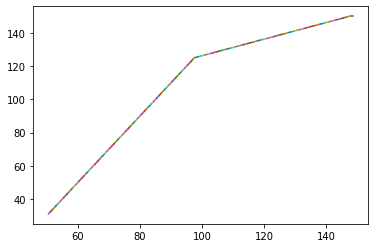

In [14]:
for i in range(1,len(backtracked_final)-1):
    x = backtracked_final[i][0]
    y = backtracked_final[i][1]
    x2 = backtracked_final[i+1][0]
    y2 = backtracked_final[i+1][1]
    plt.plot([x,x2],[y,y2])

print("Total Time Taken : ",time.time() - start_time, "seconds")

In [ ]:
# #Main function that solves the Djkstra algorithm and finds the obstacles
# #Arguments:
# # Maximum size of the x axis: Maximum_size_x,
# # Maximum size of the y axis: Maximum_size_y,  
# # start coordinate
# # goal coordinate
# #Next two arguments are exclusive to the rigid robot case : 
# # radius of the rigid robot
# # clearence needed to be given to the path between the robot and the obstacle
# def RigidRobotdijkstra(Maximum_size_x,Maximum_size_y,start,goal,radius,clearence):
#     #appending x to include the ending coordinates
#     Maximum_size_x+=1 
#     #appending y to include the ending coordinates
#     Maximum_size_y+=1
#     #getting a list of all coordinate points on the obstacle space in a list
#     all_points = []
#     for i in range(0,301): #300 width
#         for j in range(201): #200 width
#             all_points.append((i,j)) #appending to the list
#     print('Length ofall_points')
#     print(len(all_points))
#     #points that are in the path, including the obstacle
#     list_of_all_points=[]
#     #empty list to store points that are in the obstacle
#     map_points = [] #points that are in the shapes | obstacles
#     #for every such point
#     #every equation for '#formap' appends to a list that has points which only contains the 
#     #physical obstacles
#     #every equation for '#for path traversal' appends to a list that has points
#     #which contains the points after taking the radius and the clearence into
#     #consideration as well
#     for c in all_points:
#         x = c[0]
#         y = c[1]
        
#     #circle shaped obstacle
    
#         #for map
#         if((x-225)**2 + (y-150)**2 <= (25)**2):
#             map_points.append((x,y))
            
#         #for path traversal
#         if((x-225)**2 + (y-150)**2 <= (25+radius+clearence)**2):
#             list_of_all_points.append((x,y))
            
#     #ellipse shaped obstacle
    
#         #for map
#         if(((x-150)**2)/40**2 +((y-100)**2)/20**2 <= 1):
#             map_points.append((x,y))
            
#         #for path traversal
#         if(((x-150)**2)/(40+radius+clearence)**2 +((y-100)**2)/(20+radius+clearence)**2 <= 1):
#             list_of_all_points.append((x,y))
            
#     #complex polygon shaped obstacle
    
#         #for map
#         if y>=120 and y<=185 and x>=20 and x<=100:
#             if y-(13*x)<=-140:
#                 if y-x>=100 or y+(6/5)*x>=210:
#                     if y-(6/5)*x>=30:
#                         if y+(7/5)*x<=290:
#                             map_points.append((x,y))
                            
#         #for path traversal
#         if y>=120+radius+clearence and y<=185+radius+clearence and x>=20+radius+clearence and x<=100+radius+clearence:
#             if y-(13*x)<=-140+radius+clearence:
#                 if y-x>=100-(radius+clearence) or y+(6/5)*x>=210-(radius+clearence):
#                     if y-(6/5)*x>=30-(radius+clearence):
#                         if y+(7/5)*x<=290+(radius+clearence):
#                             list_of_all_points.append((x,y))
                            
#     #rectangle slanted shaped obstacle
    
#         #for map
#         if y-(8/5)*x>=-122 and y+(38/65)*x<=(1254/13) and y-(9/5)*x<=13 and y+(37/65)*x>=(1093/13):
#             map_points.append((x,y))
            
#         #for path traversal
#         if y-(8/5)*x>=-122-(radius+clearence) and y+(38/65)*x<=(1254/13)+(radius+clearence) and y-(9/5)*x<=13+(radius+clearence) and y+(37/65)*x>=(1093/13)-(radius+clearence):
#             list_of_all_points.append((x,y))
            
#     #rhombus shaped obstacle
    
#         #for map
#         if y-(3/5)*x<=-95 and y+(3/5)*x<=175 and y-(3/5)*x>=-125 and y+(3/5)*x>=145:
#             map_points.append((x,y))
            
#         #for path traversal
#         if y-(3/5)*x<=-95+(radius+clearence) and y+(3/5)*x<=175+(radius+clearence) and y-(3/5)*x>=-125-(radius+clearence) and y+(3/5)*x>=145-(radius+clearence):
#             list_of_all_points.append((x,y))
            
#     #checking if the GOAL entered is within these points
    
#     if goal in list_of_all_points:
#         print('THE GOAL ENTERED IS WITHIN THE OBSTACLE. PLEASE RESTART AND RE-RUN')
#         print('!!!!!!!!!!STOP NOW!!!!!!!!!!!!!')
#     #checking the length of all the points within the obstacles itself
#     print(' Length of map_points with the shape is : ')
#     print(len(map_points))

#     #checking the length of all the points that are UNTRAVERSABLE
#     print(' Length of list_of_all_points with the shape is : ')
#     print(len(list_of_all_points))
    
#     #generating the base graph of all the coordinates
#     base_graph = {}
#     for i in range(Maximum_size_x-1,-1,-1):
#         for j in range(Maximum_size_y-1,-1,-1):
#             graph = generateGraph((i,j),Maximum_size_x,Maximum_size_y)
#             base_graph[(i,j)]=graph[(i,j)]
    
#     #checking the length of this graph
#     print('Length of base_graph BEFORE removing')
#     print(len(base_graph))
    
    
#     #removing all the coordinates that are within the points in the obtsacle and all that
#     #are connected to it as well
#     for key,value in base_graph.items():
#         value_copy = value.copy()
#         for coordinates in value_copy:
#             if coordinates in list_of_all_points:
#                 value.remove(coordinates) 
#     base_graph_copy=base_graph.copy()
#     for key,value in base_graph_copy.items():
#         if key in list_of_all_points:
#             del base_graph[key]
    
#     #checking this length of all the points again
#     #but, now with updated coordinates.
#     #SHOULD be lesser than before, because total possible
#     #traversable coordinates have reduced
#     print('Length of base_graph AFTER removing')
#     print(len(base_graph))
#     #checking all the costs
#     costs_calculated = costCalculationatAllNodes(base_graph,start)
#     actual_graph = costs_calculated
#     #empty dictionary with all the distances
#     all_distance = {}
#     #empty dictionary for backtracking from child to parent upto the start
#     backtracking = {}
#     #list of all the visited nodes
#     visited = []
#     #variable to exit out of the while loop in the dijkstraAlgorithm function
#     #returning all the essential lists after calculating using
#     #dijkstraAlgorithm
#     all_distance,visited,backtracking= dijkstraAlgorithm(actual_graph,start) #can alter the start here
#     #creating a copy so that the dictionary can be modified
#     all_distance_copy = all_distance.copy()
#     for k,v in all_distance_copy.items():
#         if all_distance_copy[k] == math.inf:
#             del all_distance[k]
#     #returning all_distance, backtracking and list_of_all_points
#     return(all_distance,visited,backtracking,map_points)

In [ ]:
# #Taking inputs
# x_start= int(input("Enter the x coordinate of the start:  "))
# y_start= int(input("Enter the y coordinate of the start:  "))
# x_goal= int(input("Enter the x coordinate of the goal:  "))
# y_goal= int(input("Enter the y coordinate of the goal:  "))
# radius= int(input("Enter the radius of the robot:  "))
# clearence= int(input("Enter the clearance of the robot: "))

In [ ]:
# #have to be user defined inputs

# start = (x_start,y_start) #5,5
# goal =  (x_goal,y_goal)   #295,195
# Maximum_size_x = 301
# Maximum_size_y = 201
# all_distance,visited,backtrack,listofallpointsformap= RigidRobotdijkstra(Maximum_size_x,Maximum_size_y,start,goal,radius,clearence) #l is the list of points in the obstacle

# # :: :: :: :: NOTE :: :: :: :: 
# #a = all the distances of every node from every other node
# #v = list of all visited nodes
# #b = dictionary of all backtracked elements

In [ ]:
# #Backtracking 
# backtracked_final = BackTrack(backtrack,start,goal)
# print(backtracked_final)
# #printing the final time for completion
# print("Total Time Taken : ",time.time() - start_time, "seconds")

In [ ]:
# #defining a blank canvas
# new_canvas = np.zeros((201,301,3),np.uint8) 
# #for every point that belongs within the obstacle
# for c in listofallpointsformap: #change the name of the variable l
#     x = c[1]
#     y = c[0]
#     new_canvas[(x,y)]=[0,255,255] #assigning a yellow coloured pixel
# #flipping the image for correct orientation
# new_canvas = np.flipud(new_canvas)
# #making a copy for backtracking purpose
# new_canvas_copy_backtrack = new_canvas.copy()
# #making a copy for showing the visited nodes on the obstacle space
# #can be used for the animation
# new_canvas_copy_visited = new_canvas.copy()
# #showing the obstacle map
# cv2.imshow('new_canvas',new_canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# # pygame.init()

# # display_width = 300
# # display_height = 200

# # gameDisplay = pygame.display.set_mode((display_width,display_height),pygame.FULLSCREEN)
# # pygame.display.set_caption('Covered Nodes- Animation')

# # black = (0,0,0)
# # white = (0,255,255)
# # #new = np.array(new_canvas_copy_visited)
# # surf = pygame.surfarray.make_surface(new_canvas_copy_visited)

# # clock = pygame.time.Clock()
# # done = False
# # while not done:
# #     for event in pygame.event.get():   
# #         if event.type == pygame.QUIT:  
# #             done = True   
 
# #     gameDisplay.fill(black)
# #     for path in visited:
# #         if path not in new_canvas_copy_visited:
# #             #pygame.time.wait(1)
# #             #time.sleep(0.000005)
# #             x = path[0]
# #             y = abs(200-path[1])
# #             #gameDisplay.blit(surf, (x,y))
# #             #gameDisplay.fill(white)
# #             pygame.draw.rect(gameDisplay, white, [x,y,1,1])
# #             #pygame.time.wait(1)
# #             pygame.display.flip()
# #     for path in backtracked_final:
        
# #         pygame.time.wait(5)
# #         #time.sleep(0.00005)
# #         x = path[0]
# #         y = abs(200-path[1])
# #         #gameDisplay.blit(surf, (x,y))
# #         #gameDisplay.fill(white)
# #         pygame.draw.rect(gameDisplay, (0,0,255), [x,y,1,1])
# #         #pygame.time.wait(1)
# #         pygame.display.flip()
        
# #     #pygame.time.wait(14)
# #     done = True
# # pygame.quit()


# # In[ ]:


# #visited path
# for path in visited:
#     #print(path)
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[255,0,0] #setting every backtracked pixel to white
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('visited',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# # In[ ]:


# #backtracked path
# for path in backtracked_final:
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[0,255,0] #setting every backtracked pixel to green
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('new_backtracked',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()